In [ ]:
!pip install breizhcrops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.0 MB/s eta 0:00:00


## 1.Load, Extract, and Download Raw Data

In [ ]:
#@title Loading Dataset
import breizhcrops as bzh
import numpy as np
import torch

dataset = bzh.BreizhCrops("frh03", level="L2A")

# Extracting the entire dataset into NumPy arrays for processing
X_list = []
y_list = []

# Iterating through the entire dataset to extract all samples
for i in range(len(dataset)):
    X_patch, y_label, _ = dataset[i]

    X_list.append(X_patch.numpy())
    y_list.append(y_label.numpy())

# Stacking all patches to create raw training arrays
X_raw = np.stack(X_list)
y_raw = np.array(y_list) 

print(f"Raw X shape: {X_raw.shape} (Samples, Time Steps, Bands)")
print(f"Raw y shape: {y_raw.shape} (Labels)")
print(f"Total available patches: {X_raw.shape[0]:,}")

KeyboardInterrupt: 

Within limited GPU access and the long dataset download time, the datasets are saved. Due to an unresolvable compatibility error within Google Colab (ValueError: Mountpoint must not already contain files), this is achieved via local download (by running the code below) and manual upload to COMP0173_Applying_New_Context/data.

In [ ]:
#@title Saving Raw Dataset
import breizhcrops as bzh
import numpy as np
import torch
from typing import List, Tuple
import os

REGIONS_TO_EXTRACT: List[str] = ["frh04"]
DATA_LEVEL: str = "L2A"

NUM_RAW_BANDS: int = 10

def extract_and_save_region(region_code: str, level: str):
    """
    Loads raw data from the already-downloaded H5 file for a single region,
    extracts all samples into NumPy arrays, and saves them locally.
    """
    try:
        dataset = bzh.BreizhCrops(region_code, level=level)
    except Exception as e:
        print(f"FATAL ERROR: Could not read local H5 data for {region_code}. You may need to delete the local 'breizhcrops_dataset' folder and restart acquisition.")
        print(f"Error details: {e}")
        return

    X_list = []
    y_list = []

    for i in range(len(dataset)):
        X_patch, y_label, _ = dataset[i]
        X_list.append(X_patch.numpy()[:, :NUM_RAW_BANDS])
        y_list.append(y_label.numpy())

    X_raw = np.array(X_list, dtype=object)
    y_raw = np.array(y_list)

    X_filename = f"X_raw_{region_code}.npy"
    y_filename = f"y_raw_{region_code}.npy"

    print(f"\n  Total samples extracted: {len(X_raw):,}")

    np.save(X_filename, X_raw)
    np.save(y_filename, y_raw)

    print(f" Files for {region_code.upper()} saved locally: {X_filename} and {y_filename}")

    # fixing RAM issues
    del X_raw, y_raw, X_list, y_list
    print("  RAM cleared successfully before next region load.")


if __name__ == "__main__":

    try:
        from google.colab import files
    except ImportError:
        def files(): pass
        def files_download(filename):
            print(f"File '{filename}' would have been saved locally.")
        files.download = files_download


    # Extract and Save
    for region in REGIONS_TO_EXTRACT:
        extract_and_save_region(region, DATA_LEVEL)

    print("Extracted. Now downloading.")

    DOWNLOAD_FILES = []
    for region in REGIONS_TO_EXTRACT:
        DOWNLOAD_FILES.append(f"X_raw_{region}.npy")
        DOWNLOAD_FILES.append(f"y_raw_{region}.npy")

    for filename in DOWNLOAD_FILES:
        files.download(filename)



  Total samples extracted: 122,708
 Files for FRH04 saved locally: X_raw_frh04.npy and y_raw_frh04.npy
  RAM cleared successfully before next region load.
Extracted. Now downloading.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Mount and Check Drive

In [ ]:
import os
from google.colab import drive

MOUNT_POINT = '/content/drive'
drive.mount(MOUNT_POINT, force_remount=True)
print("\nMount successful.")

DATA_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data'

Attempting to mount Google Drive...
Mounted at /content/drive

Mount successful.


In [ ]:
#@title Inspecting Drive
import os
DATA_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data'

print(f"Listing files in: {DATA_PATH}\n")
try:
    for filename in os.listdir(DATA_PATH):
        print(filename)
except FileNotFoundError:
    print("Error: DATA_PATH not found or accessible.")

Listing files in: /content/drive/MyDrive/COMP0173_Applying_New_Context/data

y_raw_frh01.npy
y_raw_frh02.npy
X_raw_frh02.npy
X_raw_frh01.npy
y_raw_frh04.npy
X_raw_frh04.npy
X_raw_frh03.npy
y_raw_frh03.npy
Old
X_train_final.npy
y_val_final.npy
y_train_final.npy
X_val_final.npy
X_test_final.npy
y_test_final.npy
final_model_weights_epoch7.weights.h5
reproduced_model_weights_epoch7.weights.h5
ablation1_final_model_weights_epoch50_weighted.weights.h5
X_train_final_stratified_minority_retain.npy
y_train_final_stratified_minority_retain.npy
X_val_final_stratified_minority_retain.npy
y_val_final_stratified_minority_retain.npy
X_test_final_stratified_minority_retain.npy
y_test_final_stratified_minority_retain.npy
ablation2_final_model_weights_epoch50_focal_stratified_minority_retain.weights.h5
ablation2final_model_weights_epoch50_weighted.weights.h5
X_train_final_MTVI2_unscaled.npy
y_train_final_MTVI2_unscaled.npy
X_val_final_MTVI2_unscaled.npy
y_val_final_MTVI2_unscaled.npy
X_test_final_MTVI2_

# Data Inspection and Pre-Processing

Combined Training X shape: (319414, 45, 10)
Combined Training y shape: (319414,)
Validation y shape: 166367 samples
Test y shape: 122708 samples
Numerical Class Distributions

Training Set (frh01+frh02):
  Class 0 (Barley): 23787
  Class 1 (Wheat): 45406
  Class 2 (Rapeseed): 7945
  Class 3 (Corn): 80623
  Class 4 (Sunflower): 7
  Class 5 (Orchards): 1285
  Class 6 (Nuts): 28
  Class 7 (Permanent Meadows): 69177
  Class 8 (Temporary Meadows): 91156

Validation Set (frh03):
  Class 0 (Barley): 7154
  Class 1 (Wheat): 27202
  Class 2 (Rapeseed): 3557
  Class 3 (Corn): 42011
  Class 4 (Sunflower): 10
  Class 5 (Orchards): 1217
  Class 6 (Nuts): 10
  Class 7 (Permanent Meadows): 32524
  Class 8 (Temporary Meadows): 52682

Test Set (frh04):
  Class 0 (Barley): 5981
  Class 1 (Wheat): 17009
  Class 2 (Rapeseed): 3244
  Class 3 (Corn): 31361
  Class 4 (Sunflower): 2
  Class 5 (Orchards): 552
  Class 6 (Nuts): 11
  Class 7 (Permanent Meadows): 26134
  Class 8 (Temporary Meadows): 38414


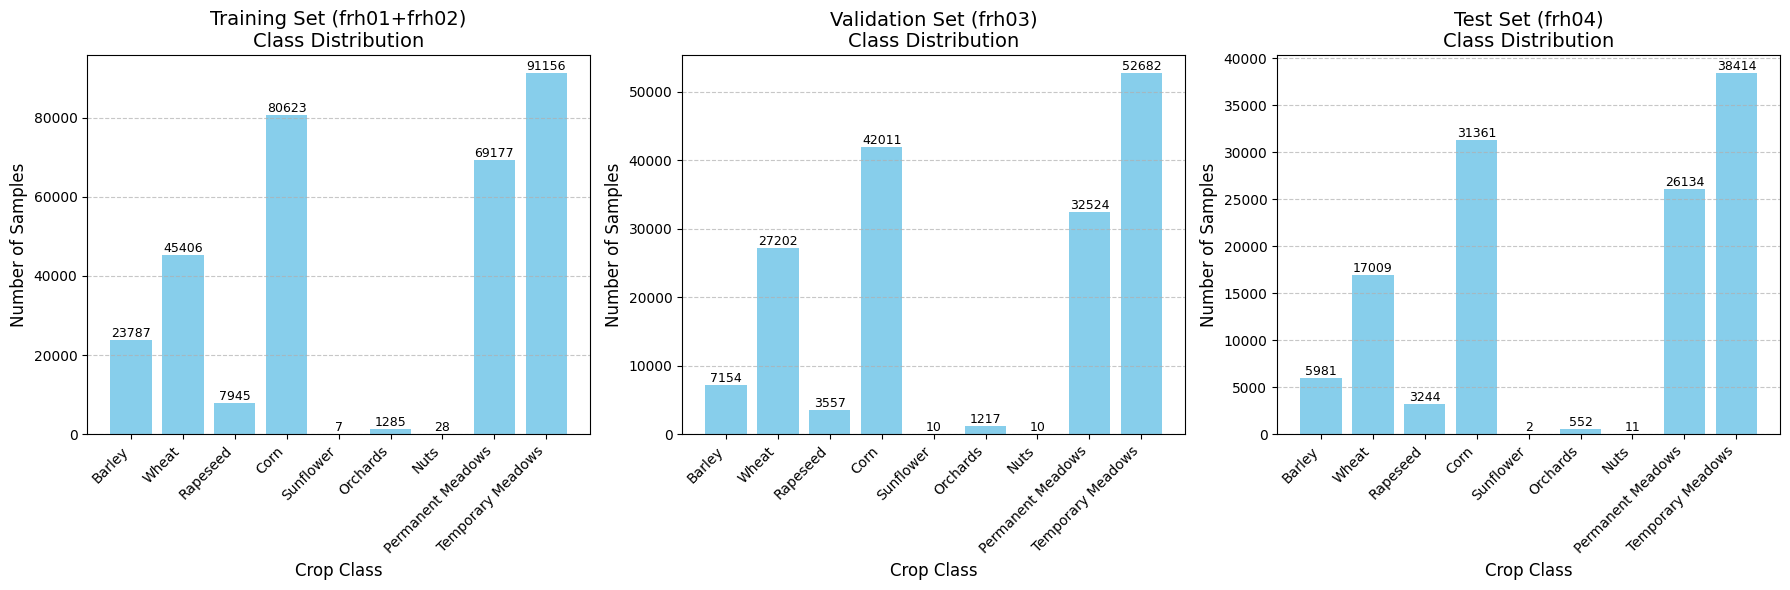

In [ ]:
#@title Print Distributions
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import sys

DATA_PATH = '/content/drive/MyDrive/COMP0173_Applying_New_Context/data'
CLASS_NAMES = {
    0: 'Barley', 1: 'Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Sunflower', 5: 'Orchards', 6: 'Nuts', 7: 'Permanent Meadows',
    8: 'Temporary Meadows'
}

X_TRAIN_FILES = ['X_raw_frh01.npy', 'X_raw_frh02.npy']
Y_TRAIN_FILES = ['y_raw_frh01.npy', 'y_raw_frh02.npy']
X_VAL_FILE = 'X_raw_frh03.npy'
Y_VAL_FILE = 'y_raw_frh03.npy'
X_TEST_FILE = 'X_raw_frh04.npy'
Y_TEST_FILE = 'y_raw_frh04.npy'

def load_and_combine_train_data(file_list, base_path, combine_func):
    """Loads and combines multiple files (for training set)."""
    data_arrays = []
    is_y_array = any('y_raw' in filename for filename in file_list)

    for filename in file_list:
        full_path = os.path.join(base_path, filename)
        try:
            arr = np.load(full_path, allow_pickle=True)
            if is_y_array:
                arr = arr.flatten()
            data_arrays.append(arr)
        except Exception as e:
            print(f"Error loading {filename}: {e}")
            return None

    if data_arrays:
        try:
            combined_data = combine_func(data_arrays)
            return combined_data
        except ValueError as e:
            print(f"Combining Error: {e}")
            return None
    return None

def load_single_file(filename, base_path, is_y_array=False):
    """Loads a single file (for val/test sets)."""
    full_path = os.path.join(base_path, filename)
    try:
        arr = np.load(full_path, allow_pickle=True)
        if is_y_array:
            arr = arr.flatten()
        return arr
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None

# stacking x arrays vertically
X_train_combined = load_and_combine_train_data(X_TRAIN_FILES, DATA_PATH, combine_func=np.vstack)

# concatenating y arrays horizontally
y_train_combined = load_and_combine_train_data(Y_TRAIN_FILES, DATA_PATH, combine_func=np.concatenate)

# Check 
if X_train_combined is None or y_train_combined is None:
    print("\nData loading failed. Cannot proceed.")
    sys.exit()

#Printing class distributions for inspection
def get_class_distribution(y_array):
    return Counter(y_array)

distributions = {}
distributions['Training Set (frh01+frh02)'] = get_class_distribution(y_train_combined)

X_val = load_single_file(X_VAL_FILE, DATA_PATH)
y_val = load_single_file(Y_VAL_FILE, DATA_PATH, is_y_array=True)

if y_val is not None:
    distributions['Validation Set (frh03)'] = get_class_distribution(y_val)
    # Immediately delete large arrays to free up RAM
    del X_val
    del y_val

X_test = load_single_file(X_TEST_FILE, DATA_PATH)
y_test = load_single_file(Y_TEST_FILE, DATA_PATH, is_y_array=True)

if y_test is not None:
    distributions['Test Set (frh04)'] = get_class_distribution(y_test)
    # Same RAM solution
    del X_test
    del y_test

print(f"Combined Training X shape: {X_train_combined.shape}")
print(f"Combined Training y shape: {y_train_combined.shape}")
print(f"Validation y shape: {distributions.get('Validation Set (frh03)', {}).total()} samples")
print(f"Test y shape: {distributions.get('Test Set (frh04)', {}).total()} samples")


print("Numerical Class Distributions")

for set_name, dist in distributions.items():
    print(f"\n{set_name}:")
    for class_id, count in sorted(dist.items()):
        print(f"  Class {class_id} ({CLASS_NAMES.get(class_id, 'Unknown')}): {count}")


#Plot

plt.figure(figsize=(18, 6))


all_classes = sorted(list(CLASS_NAMES.keys()))
class_labels = [CLASS_NAMES[c] for c in all_classes]

for i, (set_name, dist) in enumerate(distributions.items()):
    plt.subplot(1, 3, i + 1)
    counts = [dist.get(c, 0) for c in all_classes]

    plt.bar(class_labels, counts, color='skyblue')

    plt.title(f'{set_name}\nClass Distribution', fontsize=14)
    plt.xlabel('Crop Class', fontsize=12)
    plt.ylabel('Number of Samples', fontsize=12)

    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for j, count in enumerate(counts):
        if count > 0:
            plt.text(j, count, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Initial Preprocessing

In [ ]:
#@title Initial Preprocessing
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from typing import Dict, Tuple
import os

DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
TEST_REGION = 'frh04'
TRAIN_REGIONS = ['frh01', 'frh02']
VAL_REGION = 'frh03'
T_REGULARIZED = 48
N_TARGET_TRAIN = 22000
N_TARGET_VAL = 6000
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
# Savitzky-Golay Parameters
SG_WINDOW_LENGTH = 11
SG_POLYORDER = 2

def print_distribution_table(y: np.ndarray, title: str, class_map: Dict[int, str]):
    """Prints a formatted table showing class counts and percentages."""
    if len(y) == 0:
        print(f"\n--- {title} Distribution (N=0) ---")
        print("Dataset is empty.")
        return

    counts = pd.Series(y).value_counts().sort_index()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Code', 'Count']
    df['Crop Class'] = df['Code'].map(class_map)
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100

    print(f"\n--- {title} Distribution (N={total}) ---")
    df = df[['Crop Class', 'Count', 'Percentage']]
    df = df.sort_values(by='Count', ascending=False)
    print(df.to_string(index=False, float_format="%.2f"))

def oversample_orchards_ohit(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    OHIT Placeholder: Generates synthetic 'Orchards' samples to reach 2,200.
    (Simple duplication used as placeholder for complex OHIT method.)
    """
    orchards_code = 5
    orchards_mask = (y == orchards_code)
    X_orchards = X[orchards_mask]
    N_orchards_current = len(X_orchards)
    N_orchards_target = 2200

    if N_orchards_current >= N_orchards_target:
        return X, y

    N_synthetic_needed = N_orchards_target - N_orchards_current

    if N_synthetic_needed > 0 and N_orchards_current > 0:
        synthetic_indices = np.random.choice(N_orchards_current, size=N_synthetic_needed, replace=True)
        X_synthetic = X_orchards[synthetic_indices]
        y_synthetic = np.full(N_synthetic_needed, orchards_code, dtype=y.dtype)

        X_new = np.concatenate([X, X_synthetic], axis=0)
        y_new = np.concatenate([y, y_synthetic], axis=0)
        return X_new, y_new
    else:
        return X, y

def downsample_and_balance_train_set(X_train: np.ndarray, y_train: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies random downsampling to majority classes (FRH01+FRH02 pool)
    and then applies OHIT placeholder for Orchards.
    """
    TARGET_COUNTS = {
        0: 3200, 1: 3200, 2: 3200, 3: 3200, 4: 7, 5: 2200, 6: 28, 7: 3480, 8: 3480
    }

    X_balanced_list = []
    y_balanced_list = []
    unique_classes = np.unique(y_train)

    auto_include_classes = [4, 6]

    for cls in unique_classes:
        cls = int(cls)
        X_cls = X_train[y_train == cls]
        y_cls = y_train[y_train == cls]
        target_count = TARGET_COUNTS.get(cls, len(X_cls))

        if cls in auto_include_classes or cls == 5:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)
            continue

        if len(X_cls) > target_count:
            idx = np.random.choice(len(X_cls), size=target_count, replace=False)
            X_balanced_list.append(X_cls[idx])
            y_balanced_list.append(y_cls[idx])
        else:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)

    X_downsampled = np.concatenate(X_balanced_list, axis=0)
    y_downsampled = np.concatenate(y_balanced_list, axis=0)

    X_final, y_final = oversample_orchards_ohit(X_downsampled, y_downsampled)

    return X_final, y_final

def load_data_adhering_to_context(path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Loads data adhering to the strict regional split (FRH01/02, FRH03, FRH04)."""

    # Load test
    X_test_raw = np.load(f"{path}/X_raw_{TEST_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_test_raw = np.load(f"{path}/y_raw_{TEST_REGION}.npy", allow_pickle=True)

    # Load training
    X_train_list, y_train_list = [], []
    for region in TRAIN_REGIONS:
        X_train_list.append(np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True).astype(np.float32))
        y_train_list.append(np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True))

    X_train_pool_raw = np.concatenate(X_train_list, axis=0)
    y_train_pool_raw = np.concatenate(y_train_list, axis=0)

    # Load val and subsample using  stratification
    X_val_full_raw = np.load(f"{path}/X_raw_{VAL_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_val_full_raw = np.load(f"{path}/y_raw_{VAL_REGION}.npy", allow_pickle=True)

    auto_include_classes_val = [4, 6]
    val_minority_mask = pd.Series(y_val_full_raw).isin(auto_include_classes_val).values
    X_val_minority = X_val_full_raw[val_minority_mask]
    y_val_minority = y_val_full_raw[val_minority_mask]

    X_val_major = X_val_full_raw[~val_minority_mask]
    y_val_major = y_val_full_raw[~val_minority_mask]

    N_current_val_minority = len(y_val_minority)
    N_needed_from_major = N_TARGET_VAL - N_current_val_minority

    if N_needed_from_major <= 0:
        X_val_sampled = X_val_minority[:N_TARGET_VAL]
        y_val_sampled = y_val_minority[:N_TARGET_VAL]
    else:
        test_size_fraction = 1.0 - (N_needed_from_major / len(X_val_major))
        test_size_fraction = min(max(test_size_fraction, 0.0), 1.0 - 1e-8)

        X_val_kept, _, y_val_kept, _ = train_test_split(
            X_val_major, y_val_major,
            test_size=test_size_fraction,
            stratify=y_val_major,
            random_state=42
        )
        X_val_sampled = np.concatenate([X_val_minority, X_val_kept], axis=0)
        y_val_sampled = np.concatenate([y_val_minority, y_val_kept], axis=0)

        if len(y_val_sampled) != N_TARGET_VAL:
             idx = np.random.choice(len(y_val_sampled), size=N_TARGET_VAL, replace=False)
             X_val_sampled = X_val_sampled[idx]
             y_val_sampled = y_val_sampled[idx]

    # Assign final names
    X_train_raw = X_train_pool_raw
    y_train_raw = y_train_pool_raw

    return X_train_raw, y_train_raw, X_val_sampled, y_val_sampled, X_test_raw, y_test_raw

def mask_and_interpolate(X: np.ndarray, T_target: int) -> Tuple[np.ndarray, np.ndarray]:
    """Applies Linear Interpolation to raw/scaled bands and generates the imputation mask."""
    N, T_max, F_raw = X.shape
    X_interpolated = []
    X_mask = []

    for i in range(N):
        ts = X[i]
        mask_raw = (ts != 0).all(axis=1)
        valid_indices = np.where(mask_raw)[0]

        interpolated_bands = np.zeros((T_target, F_raw), dtype=np.float32)
        imputation_mask_target = np.zeros(T_target, dtype=np.float32)

        if len(valid_indices) < 2:
            X_interpolated.append(interpolated_bands)
            X_mask.append(imputation_mask_target)
            continue

        time_base_raw = valid_indices.astype(np.float32)
        time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

        for j in range(F_raw):
            vals = ts[valid_indices, j]
            if np.isnan(vals).all() or len(vals) < 2:
                continue

            f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
            interpolated_bands[:, j] = f_interp(time_base_new)

        X_interpolated.append(interpolated_bands)

        nearest_indices = np.argmin(np.abs(time_base_raw[:, None] - time_base_new), axis=0)
        imputation_mask_target = mask_raw[valid_indices[nearest_indices]].astype(np.float32)
        X_mask.append(imputation_mask_target)

    return np.stack(X_interpolated), np.stack(X_mask)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T_max, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T_max, F)

    X_val_scaled = X_val.copy()
    if X_val_scaled.size:
        X_val_scaled = scaler.transform(X_val_scaled.reshape(-1, F)).reshape(X_val.shape[0], T_max, F)

    X_test_scaled = X_test.copy()
    if X_test_scaled.size:
        X_test_scaled = scaler.transform(X_test_scaled.reshape(-1, F)).reshape(X_test.shape[0], T_max, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


def calculate_vis(X_bands: np.ndarray, bands_map: Dict[str, int]) -> np.ndarray:
    """Calculates 15 VIs from the scaled and interpolated bands."""
    B2, B3, B4, B5, B8, B8A, B11 = (
        bands_map['B2'], bands_map['B3'], bands_map['B4'], bands_map['B5'],
        bands_map['B8'], bands_map['B8A'], bands_map['B11']
    )
    B6 = bands_map['B6']
    B7 = bands_map['B7']
    EPSILON = 1e-6

    B_B2 = X_bands[:, :, B2]
    B_B3 = X_bands[:, :, B3]
    B_B4 = X_bands[:, :, B4]
    B_B5 = X_bands[:, :, B5]
    B_B6 = X_bands[:, :, B6]
    B_B7 = X_bands[:, :, B7]
    B_B8 = X_bands[:, :, B8]
    B_B8A = X_bands[:, :, B8A]
    B_B11 = X_bands[:, :, B11]

    # 1. NDVI2
    ndvi2 = (B_B8 - B_B4) / (B_B8 + B_B4 + 0.1)
    # 2. BI
    bi = np.sqrt((2 * B_B4**2) / (B_B3**2 + EPSILON))
    # 3. VARI
    vari = (B_B3 - B_B4) / (B_B3 + B_B4 - B_B2 + EPSILON)
    # 4. NDWI
    ndwi = (B_B8 - B_B8A) / (B_B8 + B_B8A + EPSILON)
    # 5. IRECI
    ireci = ((B_B7 - B_B4) * B_B6) / (B_B5 + EPSILON)
    # 6. MTVI2 -  prevent negative square root values
    mtvi2_num = 1.5 * (1.2 * (B_B8 - B_B3) - 2.5 * (B_B5 - B_B3))
    mtvi2_den_inner_term = (2 * B_B8 + 1)**2 - 6 * B_B5 + 5 * B_B3 + 0.5
    mtvi2_den_clipped = np.clip(mtvi2_den_inner_term, a_min=0.0, a_max=None)
    mtvi2_den = np.sqrt(mtvi2_den_clipped)
    mtvi2 = mtvi2_num / (mtvi2_den + EPSILON)
    # 7. RVI
    rvi = B_B8 / (B_B4 + EPSILON)
    # 8. GCVI
    gcvi = (B_B4 / (B_B3 + EPSILON)) - 1
    # 9. MNDWI
    mndwi = (B_B3 - B_B11) / (B_B3 + B_B11 + EPSILON)
    # 10. EVI
    evi_num = 2.5 * (B_B8 - B_B4)
    evi_den = B_B8 + 6 * B_B4 - 7.5 * B_B2 + 1
    evi = evi_num / (evi_den + EPSILON)
    # 11. SAVI
    savi = 1.5 * (B_B8 - B_B4) / (B_B8 + B_B4 + 0.5)
    # 12. BCI
    bci = 0.1360 * B_B3 + 0.2611 * B_B4 + 0.3895 * B_B8
    # 13. GNDVI
    gndvi = (B_B8 - B_B3) / (B_B8 + B_B3 + EPSILON)
    # 14. MSAVI
    msavi_term = (2 * B_B8 + 1)
    msavi_inside_sqrt = msavi_term**2 - 8 * (B_B8 - B_B4)
    msavi_inside_sqrt = np.clip(msavi_inside_sqrt, a_min=0.0, a_max=None)
    msavi = (msavi_term - np.sqrt(msavi_inside_sqrt)) / 2
    # 15. NDRE
    ndre = (B_B8 - B_B5) / (B_B8 + B_B5 + EPSILON)

    vis_stack = np.stack([
        ndvi2, bi, vari, ndwi, ireci, mtvi2, rvi, gcvi, mndwi, evi, savi, bci, gndvi, msavi, ndre
    ], axis=-1)

    return vis_stack

def apply_savitzky_golay_filter(X_features: np.ndarray, window_length: int, polyorder: int) -> np.ndarray:
    """Applies Savitzky-Golay filter for temporal smoothing on the features."""
    N, T, F = X_features.shape
    X_smoothed = np.zeros_like(X_features, dtype=np.float32)

    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2

    for f in range(F):
        X_smoothed[:, :, f] = savgol_filter(X_features[:, :, f],
                                            window_length=window_length,
                                            polyorder=polyorder,
                                            axis=1)
    return X_smoothed


#  Static Augmentation Functions (Jitter/Scaling)

def jitter(X, sigma=0.03):
    """Apply random noise (jittering) to the time series spectral values."""
    return X + np.random.normal(loc=0., scale=sigma, size=X.shape)

def scaling(X, sigma=0.1):
    """Apply a random scaling factor to the entire time series."""
    factor = np.random.normal(loc=1., scale=sigma, size=(X.shape[1],))
    factor = factor.reshape(1, X.shape[1])
    return X * factor

def apply_augmentation(X):
    """Applies jittering and scaling with a 50% probability each."""
    X_aug = X.copy()
    if np.random.rand() < 0.5:
        X_aug = jitter(X_aug)
    if np.random.rand() < 0.5:
        X_aug = scaling(X_aug)
    return X_aug

def perform_static_augmentation(X_train: np.ndarray, y_train_indices: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Statically augments Sunflower (4) and Nuts (6) samples to increase diversity
    in the training array.
    """
    # Targets for minority samples
    TARGET_COPIES = {4: 100, 6: 200}

    X_augmented_list = [X_train]
    y_augmented_list = [y_train_indices]

    for class_id, target_N in TARGET_COPIES.items():
        # Find existing samples for the minority class
        class_mask = (y_train_indices == class_id)
        X_cls = X_train[class_mask]
        y_cls = y_train_indices[class_mask]
        N_current = len(X_cls)

        if N_current == 0:
            continue

        # Calculate how many augmented samples to generate
        N_generate = target_N - N_current

        if N_generate > 0:
            # Randomly select indices with replacement to duplicate
            indices_to_duplicate = np.random.choice(N_current, size=N_generate, replace=True)

            # Create copies
            X_copies = X_cls[indices_to_duplicate].copy()
            y_copies = y_cls[indices_to_duplicate].copy()

            # Apply Jitter/Scaling once to each copy
            for i in range(N_generate):
                X_copies[i] = apply_augmentation(X_copies[i])

            X_augmented_list.append(X_copies)
            y_augmented_list.append(y_copies)
            print(f"Statically augmented Class {class_id} (N={N_current}) by {N_generate} copies.")

    # Concatenate all lists to form the new, augmented training set
    X_final = np.concatenate(X_augmented_list, axis=0)
    y_final = np.concatenate(y_augmented_list, axis=0)

    return X_final, y_final

if __name__ == '__main__':
    try:
        X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = load_data_adhering_to_context(
            DATA_PATH
        )

        if X_train_raw.size:
            X_train_balanced, y_train_balanced = downsample_and_balance_train_set(X_train_raw, y_train_raw)
        else:
            X_train_balanced, y_train_balanced = X_train_raw, y_train_raw

        X_val_balanced, y_val_balanced = X_val_raw, y_val_raw
        X_test_balanced, y_test_balanced = X_test_raw, y_test_raw

        # Print distributions pre-augmentation
        print_distribution_table(
            y_train_balanced,
            "TRAINING SET (Balanced, Pre-Augmentation)",
            CROP_MAP
        )

        print_distribution_table(
            y_val_balanced,
            "VALIDATION SET (Unbalanced, FRH03)",
            CROP_MAP
        )

        print_distribution_table(
            y_test_balanced,
            "TEST SET (Unbalanced, FRH04)",
            CROP_MAP
        )
        # -------------------------------------------------------------------------

        del X_train_raw, y_train_raw, X_val_raw, y_val_raw # Free memory

        # Robust Scaler
        if X_train_balanced.shape[0] == 0:
            raise RuntimeError("No training samples after subsampling. Cannot fit scaler.")

        X_train_scaled, X_val_scaled, X_test_scaled, global_scaler = apply_robust_scaling(
            X_train_balanced, X_val_balanced, X_test_balanced
        )
        del X_train_balanced, X_val_balanced, X_test_balanced # Free memory

        # Masking and Linear Interpolation (to T=48)

        X_train_interp, X_train_mask = mask_and_interpolate(X_train_scaled, T_REGULARIZED)
        X_val_interp, X_val_mask = mask_and_interpolate(X_val_scaled, T_REGULARIZED)
        X_test_interp, X_test_mask = mask_and_interpolate(X_test_scaled, T_REGULARIZED)

        del X_train_scaled, X_val_scaled, X_test_scaled # Free memory

        # VI calculation (on scaled bands)
        X_train_vis = calculate_vis(X_train_interp, BANDS)
        X_val_vis = calculate_vis(X_val_interp, BANDS)
        X_test_vis = calculate_vis(X_test_interp, BANDS)

        # Savitzky-Golay Filtering (on Bands and VIs)

        X_train_sg_bands = apply_savitzky_golay_filter(X_train_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_bands = apply_savitzky_golay_filter(X_val_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_bands = apply_savitzky_golay_filter(X_test_interp, SG_WINDOW_LENGTH, SG_POLYORDER)

        X_train_sg_vis = apply_savitzky_golay_filter(X_train_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_vis = apply_savitzky_golay_filter(X_val_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_vis = apply_savitzky_golay_filter(X_test_vis, SG_WINDOW_LENGTH, SG_POLYORDER)

        del X_train_interp, X_val_interp, X_test_interp, X_train_vis, X_val_vis, X_test_vis # Free memory

        # Feature stacking
        print("7. Final feature stacking...")
        X_train_new = np.concatenate([X_train_sg_bands, X_train_sg_vis, X_train_mask[:, :, None]], axis=-1)
        X_val_new = np.concatenate([X_val_sg_bands, X_val_sg_vis, X_val_mask[:, :, None]], axis=-1)
        X_test_new = np.concatenate([X_test_sg_bands, X_test_sg_vis, X_test_mask[:, :, None]], axis=-1)

        # Static augmentation
        print("7.1. Applying Static Augmentation to Sunflower and Nuts...")

        X_train_final, y_train_final_indices = perform_static_augmentation(
            X_train_new,
            y_train_balanced
        )

        X_train_new = X_train_final
        y_train_balanced = y_train_final_indices

        # print distributions after augmentation
        print_distribution_table(
            y_train_balanced,
            "TRAINING SET (Balanced, Post-Augmentation)",
            CROP_MAP
        )
        # One hot label encoding
        print("\n8. Label encoding...")
        global_lb = LabelBinarizer()

        # fit and transform on the augmented/balanced index set
        y_train_new = global_lb.fit_transform(y_train_balanced)

        # Transform val and test
        y_val_new = global_lb.transform(y_val_balanced) if len(y_val_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)
        y_test_new = global_lb.transform(y_test_balanced) if len(y_test_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)

        print("\n9. Final Preprocessing Output Shapes")
        print(f"X_train_new (T=48, F=26, Augmented): {X_train_new.shape}")
        print(f"y_train_new (OHE, Augmented): {y_train_new.shape}")
        print(f"X_val_new (T=48, F=26, Unbalanced): {X_val_new.shape}")
        print(f"y_val_new (OHE, Unbalanced): {y_val_new.shape}")
        print(f"X_test_new (T=48, F=26, Unbalanced): {X_test_new.shape}")
        print(f"y_test_new (OHE, Unbalanced): {y_test_new.shape}")

        print("\nSaving final processed arrays...")
        np.save(os.path.join(DATA_PATH, 'X_train_final.npy'), X_train_new)
        np.save(os.path.join(DATA_PATH, 'y_train_final.npy'), y_train_new)
        np.save(os.path.join(DATA_PATH, 'X_val_final.npy'), X_val_new)
        np.save(os.path.join(DATA_PATH, 'y_val_final.npy'), y_val_new)
        np.save(os.path.join(DATA_PATH, 'X_test_final.npy'), X_test_new)
        np.save(os.path.join(DATA_PATH, 'y_test_final.npy'), y_test_new)
        print("All arrays saved successfully.")


    except Exception as e:
        print(f"\nError:{type(e).__name__}: {e}")

1. Loading raw data based on regional split...

2. Applying Class Imbalance Mitigation (Downsampling and OHIT Placeholder)...

--- TRAINING SET (Balanced, Pre-Augmentation) Distribution (N=21995) ---
       Crop Class  Count  Percentage
permanent meadows   3480       15.82
temporary meadows   3480       15.82
           barley   3200       14.55
            wheat   3200       14.55
         rapeseed   3200       14.55
             corn   3200       14.55
         orchards   2200       10.00
             nuts     28        0.13
        sunflower      7        0.03

--- VALIDATION SET (Unbalanced, FRH03) Distribution (N=6000) ---
       Crop Class  Count  Percentage
temporary meadows   1894       31.57
             corn   1510       25.17
permanent meadows   1169       19.48
            wheat    978       16.30
           barley    257        4.28
         rapeseed    128        2.13
         orchards     44        0.73
        sunflower     10        0.17
             nuts     10       

#### Plotting Distributions

/tmp/ipython-input-1918704400.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(CLASS_LABELS, rotation=45, ha='right', fontsize=10)
/tmp/ipython-input-1918704400.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(CLASS_LABELS, rotation=45, ha='right', fontsize=10)
/tmp/ipython-input-1918704400.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(CLASS_LABELS, rotation=45, ha='right', fontsize=10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

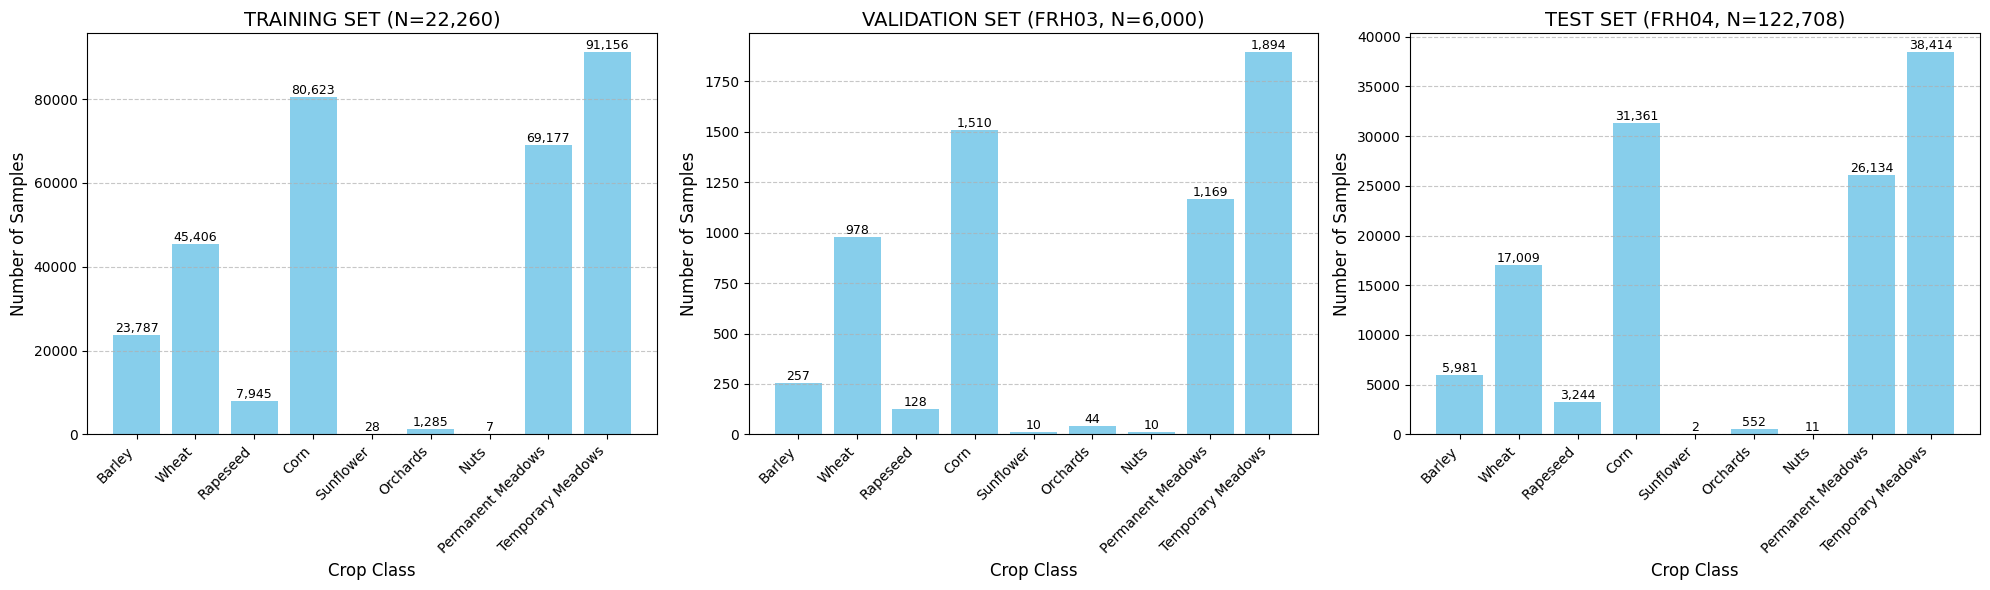

In [ ]:
#@title Plotting Distributions (Direct Download)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

CLASS_ORDER_RAW = [
    'barley', 'wheat', 'rapeseed', 'corn', 'sunflower',
    'orchards', 'nuts', 'permanent meadows', 'temporary meadows'
]
CLASS_LABELS = [
    "Barley", "Wheat", "Rapeseed", "Corn",
    "Sunflower", "Orchards", "Nuts",
    "Permanent Meadows", "Temporary Meadows"
]

train_data = {
    'Crop Class': ['permanent meadows', 'temporary meadows', 'barley', 'wheat', 'rapeseed', 'corn', 'orchards', 'nuts', 'sunflower'],
    'Count': [69177, 91156, 23787, 45406, 7945, 80623, 1285, 7, 28],
}
df_train_raw = pd.DataFrame(train_data)
N_train = 22260

val_data = {
    'Crop Class': ['temporary meadows', 'corn', 'permanent meadows', 'wheat', 'barley', 'rapeseed', 'orchards', 'sunflower', 'nuts'],
    'Count': [1894, 1510, 1169, 978, 257, 128, 44, 10, 10],
}
df_val_raw = pd.DataFrame(val_data)
N_val = 6000

test_data = {
    'Crop Class': ['temporary meadows', 'corn', 'permanent meadows', 'wheat', 'barley', 'rapeseed', 'orchards', 'nuts', 'sunflower'],
    'Count': [38414, 31361, 26134, 17009, 5981, 3244, 552, 11, 2],
}
df_test_raw = pd.DataFrame(test_data)
N_test = 122708

def prepare_df_for_plotting(df_raw, order):
    """Aligns the DataFrame to the desired class order, filling missing counts with 0."""
    df_ordered = df_raw.set_index('Crop Class').reindex(order, fill_value=0).reset_index()
    df_ordered.columns = ['Crop Class', 'Count']
    return df_ordered

df_train = prepare_df_for_plotting(df_train_raw, CLASS_ORDER_RAW)
df_val = prepare_df_for_plotting(df_val_raw, CLASS_ORDER_RAW)
df_test = prepare_df_for_plotting(df_test_raw, CLASS_ORDER_RAW)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)

datasets = [df_train, df_val, df_test]
titles = [
    f'TRAINING SET (N={N_train:,})',
    f'VALIDATION SET (FRH03, N={N_val:,})',
    f'TEST SET (FRH04, N={N_test:,})'
]

for i, df in enumerate(datasets):
    ax = axes[i]
    counts = df['Count'].values

    bars = ax.bar(CLASS_LABELS, counts, color='skyblue')

    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel('Crop Class', fontsize=12)
    ax.set_ylabel('Number of Samples', fontsize=12)

    ax.set_xticklabels(CLASS_LABELS, rotation=45, ha='right', fontsize=10)

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding counts on top of bars
    for j, count in enumerate(counts):
        if count > 0:
            label = f'{count:,}'
            ax.text(j, count, label, ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# Downloading
filename = 'distribution_plots_high_res.png'
plt.savefig(filename, dpi=300)
files.download(filename)

In [ ]:
#@title Downloading Pre-Processed Sets
import numpy as np
from google.colab import files

# Save all final processed feature arrays (X_..._new)
np.save('X_train_new.npy', X_train_new)
np.save('X_val_new.npy', X_val_new)
np.save('X_test_new.npy', X_test_new)

# Save non-OHE labels (Balanced/Unbalanced class codes)
np.save('y_train_balanced.npy', y_train_balanced)
np.save('y_val_balanced.npy', y_val_balanced)
np.save('y_test_balanced.npy', y_test_balanced)

# 3. Save final OHE labels (For training/evaluation)
np.save('y_train_new.npy', y_train_new)
np.save('y_val_new.npy', y_val_new)
np.save('y_test_new_ohe.npy', y_test_new) 


files.download('X_train_new.npy')
files.download('X_val_new.npy')
files.download('X_test_new.npy')

files.download('y_train_balanced.npy')
files.download('y_val_balanced.npy')
files.download('y_test_balanced.npy')

files.download('y_train_new.npy')
files.download('y_val_new.npy')
files.download('y_test_new_ohe.npy')

Starting file downloads...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Initial Model Architecture

In [ ]:
#@title Initial Model
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

T_REGULARIZED = 48   # Sequence Length (Time Steps)
F_AUGMENTED = 26     # Number of Features (10 S2 + 15 VIs + 1 Mask)
NUM_CLASSES = 9      # Number of Crop Classes
INITIAL_CHANNELS = 32 # Starting width, doubled from original due to complex input 
U_NET_DEPTH = 4      # Number of downsampling blocks
DROPOUT_RATE = 0.4   # 40% Dropout rate adopted
L2_REG = 1e-4        # L2 regularization strength
INIT_LR = 0.0001     # Initial Learning Rate - standard practice in crop literature
ADAMW_WEIGHT_DECAY = 1e-5 # AdamW Weight Decay (Within the 10^-8 to 10^-4 search range)

# Macro dice loss function
@tf.function
def macro_dice_loss(y_true, y_pred):
    """
    Computes the Macro-Dice Loss (1 - Macro-Dice Score).
    This treats all classes equally and is robust for imbalanced evaluation sets.
    """
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)

    # Calculate Dice Score per class
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)

    # Avoid division by zero
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)

    # Calculate the macro (arithmetic mean) Dice Score across all classes
    macro_dice_score = tf.reduce_mean(dice_score_per_class)

    # Return loss, which is (1 - Score)
    return 1. - macro_dice_score

# Model blocks

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    # Dropout rate 40%
    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

# Model wrapper for metrics

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


# A U-Net assemply

def build_1d_aunet():
    """Builds the 1D Attention U-Net model using T=50, F=26 inputs."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    # Encoder
    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    # Bottleneck
    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    # Decoder
    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            # Upsampling (Conv1DTranspose)
            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output

            # Temporal Attention Gate
            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            # Concatenation
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            # Convolutional Block
            x = conv_block_1d(x, current_filters, name=name)

    # Segmentation Output
    output_tensor = layers.Conv1D(
        NUM_CLASSES,
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

def compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY):
    """
    Compiles the model using the AdamW optimizer and Macro-Dice Loss.
    """

    # Use AdamW optimiser
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )

    # Define Macro Metrics for tracking
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    # Wrap metrics that expect 2D input
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'), # Overall Accuracy
        FlattenTimeWrapper(macro_f1, name='macro_f1'),      # Core Metric
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
    ]

    model.compile(
        optimizer=optimizer,
        loss=macro_dice_loss,
        metrics=wrapped_metrics
    )
    return model

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    labels = list(class_names.values())

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,        
        fmt=".2f",         
        cmap="Blues",      
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline
    metrics on the Test Set, and prints the Confusion Matrix.
    """

    y_pred_proba = model.predict(X_test)

    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)

    avg_accuracy = np.mean(recall_pc)

    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)

    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )

    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    # Per-Class breakdown
    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1

#### Sanity Check - Running on CPU

In [ ]:
#@title Sanity Check
import numpy as np
def run_cpu_sanity_check(X_train_full, y_train_full, X_val_full, y_val_full, T_REGULARIZED, NUM_CLASSES):
    """
    Quick functional test for the 1D Attention U-Net.
    Works with one-hot encoded labels, properly tiles across time dimension.
    """
    N_SANITY_TRAIN = 750
    N_SANITY_VAL = 250
    MINORITY_CLASSES = [4, 6]

    print("\n--- Quick Sanity Check (CPU-Optimized, Macro-Dice Only) ---")

    # Slicing
    train_indices_to_keep = set(range(N_SANITY_TRAIN))
    for class_id in MINORITY_CLASSES:
        minority_indices = np.where(np.argmax(y_train_full, axis=-1) == class_id)[0]
        if len(minority_indices) > 0:
            train_indices_to_keep.add(minority_indices[0])

    final_train_indices = sorted(list(train_indices_to_keep))

    X_train_mini = X_train_full[final_train_indices]
    y_train_mini = y_train_full[final_train_indices]
    X_val_mini = X_val_full[:N_SANITY_VAL]
    y_val_mini = y_val_full[:N_SANITY_VAL]

    # Preparing labels (already OHE)
    print("y_train_mini shape BEFORE tiling:", y_train_mini.shape)
    print("y_val_mini shape BEFORE tiling:", y_val_mini.shape)

    y_train_tiled = np.tile(np.expand_dims(y_train_mini, axis=1), (1, T_REGULARIZED, 1))
    y_val_tiled   = np.tile(np.expand_dims(y_val_mini, axis=1), (1, T_REGULARIZED, 1))

    assert X_train_mini.shape[0] == y_train_tiled.shape[0], \
        f"Batch size mismatch: X_train={X_train_mini.shape[0]}, y_train={y_train_tiled.shape[0]}"
    assert X_val_mini.shape[0] == y_val_tiled.shape[0], \
        f"Batch size mismatch: X_val={X_val_mini.shape[0]}, y_val={y_val_tiled.shape[0]}"

    print(f"Data sliced: Train={X_train_mini.shape}, Val={X_val_mini.shape}")
    print(f"Labels Tiled: Train={y_train_tiled.shape}, Val={y_val_tiled.shape}") 

    # Call build and compile
    model = build_1d_aunet()
    compiled_model = compile_model(model)

    # Train for 5 epochs as a check to avoid unnecessary GPU usage

    history = compiled_model.fit(
        X_train_mini, y_train_tiled,
        validation_data=(X_val_mini, y_val_tiled),
        epochs=5,
        batch_size=32,
        verbose=1
    )

    final_loss = history.history['loss'][-1]
    initial_loss = history.history['loss'][0]

    if final_loss < initial_loss:
        print("\n✅ SANITY CHECK PASSED: Loss dropped from {:.4f} to {:.4f}.".format(initial_loss, final_loss))
    else:
        print("\n❌ SANITY CHECK FAILED: Loss did not drop or initial loss was too high. Initial Loss: {:.4f}".format(initial_loss))

    return model


# Execution block
X_TRAIN_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/X_train_new.npy"
Y_TRAIN_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/y_train_new.npy"
X_VAL_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/X_val_new.npy"
Y_VAL_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/y_val_new.npy"

if __name__ == '__main__':
    try:
        # Loading arrays

        X_train_new = np.load(X_TRAIN_PATH, allow_pickle=True)
        y_train_new = np.load(Y_TRAIN_PATH, allow_pickle=True)
        X_val_new = np.load(X_VAL_PATH, allow_pickle=True)
        y_val_new = np.load(Y_VAL_PATH, allow_pickle=True)

        T_REGULARIZED = 48
        NUM_CLASSES = 9
        print("FORCED T_REGULARIZED =", T_REGULARIZED)
        print("NUM_CLASSES =", NUM_CLASSES)

        # Running check
        model_tested = run_cpu_sanity_check(
            X_train_new,
            y_train_new,
            X_val_new,
            y_val_new,
            T_REGULARIZED,
            NUM_CLASSES
        )

        print("\nSanity Check complete. The model architecture and training initialization are verified.")

    except FileNotFoundError as e:
        print(f"\nFATAL ERROR: Could not find the required data file. Check path and file names: {e}")
    except AssertionError as e:
        print(f"\nFATAL ERROR: Batch size mismatch detected. {e}")
    except Exception as e:
        print(f"\nAn unexpected error occurred during execution: {e}")


1. Loading processed data arrays for Sanity Check...

FATAL ERROR: Could not find the required data file. Check path and file names: [Errno 2] No such file or directory: '/content/drive/MyDrive/COMP0173_Applying_New_Context/data/X_train_new.npy'


# Running Initial Model with Bayesian Optimisation to obtain optimised hyperparameters

In [ ]:
pip install scikit-optimize #needed for Bayesian Optimisation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
#@title Training Initial Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from skopt import gp_minimize, space
import gc
import os
from typing import Dict, Tuple

T_REGULARIZED = 48
NUM_CLASSES = 9

FIXED_PARALLEL_CALLS = 4

# Functions for building dataset

def tf_tile_labels(X, y):
    """Tiles the label (N, C) to match the sequence shape (N, T, C)."""
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    """Build a cached training base dataset once (with shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    """Builds the cached validation dataset (without shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    """Create a fast batched dataset from the cached base dataset."""
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset


# Bayesian Optimisation (15 runs, 50 epochs)

def objective_function(hparams, base_train_dataset, base_val_dataset, num_epochs=50): 
    """
    Trains and evaluates the model using cached datasets for both training and validation.
    """
    batch_size, lr, weight_decay = hparams

    train_dataset = build_tf_dataset_from_base(base_train_dataset, batch_size)
    val_dataset = build_tf_dataset_from_base(base_val_dataset, batch_size, is_validation=True)

    # Call build and compile
    model = build_1d_aunet()
    compiled_model = compile_model(model, lr=lr, weight_decay=weight_decay)

    # Defining reduction in LR and Early Stopping, with patience of 5 and 15 respectively
    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=0, min_lr=1e-7),
        EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
    ]

    # Training run
    print(f"\nTrial Start: BS={batch_size}, LR={lr:.6f}, WD={weight_decay:.8f}")

    try:
        history = compiled_model.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=num_epochs,
            callbacks=callbacks,
            verbose=1,
        )

        # Saving best val macro F1
        best_macro_f1 = max(history.history.get('val_macro_f1', [-1.0]))

    except Exception as e:
        print(f"--- Trial Failed: {e} ---")
        best_macro_f1 = -1.0

    print(f"Trial End. Best Validation Macro F1: {best_macro_f1:.4f}")

    del model, compiled_model, train_dataset, val_dataset
    gc.collect()

    return -best_macro_f1


# Executing function

if __name__ == '__main__':

    data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"

    file_names = {
        'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
        'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
        'X_test_final': 'X_test_final.npy', 'y_test_final': 'y_test_final.npy'
    }

    try:
        X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True)
        y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True)
        X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True)
        y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True)

        print("Data arrays loaded successfully.")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find data file. Check path and file names: {e}")
        exit()

    base_train_dataset = build_base_dataset(X_train_final, y_train_final)
    base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

    # Fixing RAM issue
    del X_train_final, y_train_final, X_val_final, y_val_final
    gc.collect()
    print("Redundant NumPy arrays deleted for RAM management.")


    # Defining search base based on literature
    search_space = [
        space.Categorical([32, 64, 128], name='batch_size'),
        space.Real(1e-5, 1e-3, 'log-uniform', name='learning_rate'),
        space.Real(1e-8, 1e-4, 'log-uniform', name='weight_decay')
    ]

    N_BAYESIAN_CALLS = 15

    print(f"\nRunning Bayesian Optimization for {N_BAYESIAN_CALLS} Trials (Testing with 1 Epoch)")

    # Execute Bayesian Search
    search_results = gp_minimize(
        lambda h: objective_function(h, base_train_dataset, base_val_dataset, num_epochs=50),
        search_space,
        n_calls=N_BAYESIAN_CALLS,
        random_state=42,
        verbose=True,
        n_jobs=1
    )

    # Extraction of Best Hyperparameters
    best_hparams = search_results.x
    best_macro_f1 = -search_results.fun

    final_bs, final_lr, final_wd = best_hparams


    print("Results of Hyperparameter Search:")
    print(f"Optimal Batch Size: {final_bs}")
    print(f"Optimal Learning Rate: {final_lr:.6f}")
    print(f"Optimal Weight Decay: {final_wd:.8f}")
    print(f"Best Validation Macro F1: {best_macro_f1:.4f}")


    # Final model training with optimal hyperparameters
    print("\nFinal Model Training (50 Epochs)")

    tf.keras.backend.clear_session()
    FULL_EPOCHS = 50 

    final_callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7),
        EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
    ]

    final_model = build_1d_aunet()
    final_compiled_model = compile_model(final_model, lr=final_lr, weight_decay=final_wd)

    final_train_dataset = build_tf_dataset_from_base(base_train_dataset, final_bs)
    final_val_dataset = build_tf_dataset_from_base(base_val_dataset, final_bs, is_validation=True)

    final_compiled_model.fit(
        final_train_dataset,
        validation_data=final_val_dataset,
        epochs=FULL_EPOCHS,
        callbacks=final_callbacks,
        verbose=1,
    )

    # Reloading test data for final evaluation (was not cached)
    X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
    y_test_final_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)

    # Evaluation on test set
    print("\nFinal Model Evaluation on Test Set (FRH04)")
    test_macro_f1 = evaluate_model_metrics(
        final_compiled_model,
        X_test_final_reloaded,
        y_test_final_reloaded,
        CROP_MAP
    )

    print(f"\nTest Set Macro F1: {test_macro_f1:.4f}")

Data arrays loaded successfully.
Redundant NumPy arrays deleted for RAM management.

Running Bayesian Optimization for 15 Trials (Testing with 1 Epoch)
Iteration No: 1 started. Evaluating function at random point.

Trial Start: BS=128, LR=0.000023, WD=0.00001315
Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - loss: 1.2265 - macro_f1: 0.0985 - macro_precision: 0.2082 - macro_recall: 0.0251 - overall_accuracy: 4.1692e-07 - val_loss: 1.2259 - val_macro_f1: 0.1026 - val_macro_precision: 0.7036 - val_macro_recall: 0.0027 - val_overall_accuracy: 0.0000e+00 - learning_rate: 2.3274e-05
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.2096 - macro_f1: 0.1194 - macro_precision: 0.2681 - macro_recall: 0.0431 - overall_accuracy: 1.7868e-06 - val_loss: 1.2094 - val_macro_f1: 0.0938 - val_macro_precision: 0.6987 - val_macro_recall: 0.0060 - val_overall_accuracy: 0.0000e+00 - learning_rate: 2.3274e-05
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.1921 - macro_f1

NameError: name 'CROP_MAP' is not defined

#### Obtaining optimised model weights

In [ ]:
#@title Obtaining Optimal Model Weights
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from google.colab import files
import os
import gc
import random 
from typing import Dict, Tuple

GLOBAL_SEED = 42 #Random seed for reproducibility

os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

T_REGULARIZED = 48
NUM_CLASSES = 9
FIXED_PARALLEL_CALLS = 4
CROP_MAP = {
    0: 'Background', 1: 'Winter Wheat', 2: 'Rapeseed', 3: 'Corn',
    4: 'Soybeans', 5: 'Sugar Beet', 6: 'Sunflower', 7: 'Grass', 8: 'Forest'
}

def tf_tile_labels(X, y):
    """Tiles the label (N, C) to match the sequence shape (N, T, C)."""
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    """Build a cached training base dataset once (with shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    """Builds the cached validation dataset (without shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    """Create a fast batched dataset from the cached base dataset."""
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# New optimised hyperparameters
TARGET_BS = 64
TARGET_LR = 0.000046
TARGET_WD = 0.00000004
TARGET_EPOCHS = 7 #Saving weight after optimal seventh epoch
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
WEIGHTS_SAVE_PATH = os.path.join(data_dir, "reproduced_model_weights_epoch7.weights.h5")
LOCAL_SAVE_PATH = "reproduced_model_weights_epoch7_local.weights.h5"

print(f"Starting Targeted Training Rerun with GLOBAL_SEED={GLOBAL_SEED}.")
print("Target HParams: BS=64, LR=4.6e-5, WD=4e-8 for 7 Epochs.")

file_names = {
    'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
    'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
    'X_test_final': 'X_test_final.npy', 'y_test_final': 'y_test_final.npy'
}

try:
    X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True)
    y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True)
    X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True)
    y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True)

    print("Data arrays loaded.")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find data file: {e}")
    exit()

base_train_dataset = build_base_dataset(X_train_final, y_train_final)
base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

del X_train_final, y_train_final, X_val_final, y_val_final
gc.collect()

tf.keras.backend.clear_session()
final_model = build_1d_aunet()
final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

final_train_dataset = build_tf_dataset_from_base(base_train_dataset, TARGET_BS)
final_val_dataset = build_tf_dataset_from_base(base_val_dataset, TARGET_BS, is_validation=True)


final_callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7),
] #early stopping not required as only 7 epochs

print(f"\nTraining for {TARGET_EPOCHS} epochs...")
history = final_compiled_model.fit(
    final_train_dataset,
    validation_data=final_val_dataset,
    epochs=TARGET_EPOCHS,
    callbacks=final_callbacks,
    verbose=1,
)

epoch_7_macro_f1 = history.history.get('val_macro_f1', [None])[-1]
print(f"\nValidation Macro F1 after epoch 7 (Reproduction Run): {epoch_7_macro_f1:.4f}")
print(f"Target Macro F1: 0.2615")

# Save model weights to both google drive and locally
final_compiled_model.save_weights(WEIGHTS_SAVE_PATH)
print(f"Model weights saved to Drive: {WEIGHTS_SAVE_PATH}")

# 8. Save Model Weights Locally and Trigger Download
final_compiled_model.save_weights(LOCAL_SAVE_PATH)

try:
    files.download(LOCAL_SAVE_PATH)
    print(f"Local download initiated for: {LOCAL_SAVE_PATH}")
except Exception as e:
    print(f"Could not automatically initiate file download. Please manually download the file '{LOCAL_SAVE_PATH}'.")

Starting Targeted Training Rerun with GLOBAL_SEED=42.
Target HParams: BS=64, LR=4.6e-5, WD=4e-8 for 7 Epochs.
Data arrays loaded.

Training for 7 epochs...
Epoch 1/7
347/347 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - loss: 1.2203 - macro_f1: 0.1089 - macro_precision: 0.1924 - macro_recall: 0.0267 - overall_accuracy: 1.9199e-06 - val_loss: 1.2073 - val_macro_f1: 0.0728 - val_macro_precision: 0.2644 - val_macro_recall: 0.0992 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 2/7
347/347 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1.1673 - macro_f1: 0.1537 - macro_precision: 0.2653 - macro_recall: 0.1149 - overall_accuracy: 2.3665e-05 - val_loss: 1.1107 - val_macro_f1: 0.1826 - val_macro_precision: 0.4400 - val_macro_recall: 0.3305 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 3/7
347/347 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1.1100 - macro_f1: 0.2030 - macro_precision: 0.3196 - macro_recall: 0.1942 - overall_accuracy: 9.0992e-05 - val_loss: 1.0721 - 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Local download initiated for: reproduced_model_weights_epoch7_local.weights.h5


# Testing Initial Model

Starting Final Evaluation: Loading weights and running metrics on Test Set.
Test data loaded. X_test shape: (122708, 48, 26)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 200 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Successfully loaded model weights from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/reproduced_model_weights_epoch7.weights.h5
Making predictions on the Test Set...
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step

Per-Class Metrics (Required for Detailed Comparison)
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.2076  0.5378    0.2996
        1             wheat   816432     0.4293  0.3543    0.3882
        2          rapeseed   155712     0.0743  0.2313    0.1124
        3              corn  1505328     0.8488  0.6321    0.7246
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0000  0.0000    0.0000
        6              nuts      528     0.0000  0.0000    0.0000
        7 permanent meadows  1254432     0.3469  0.3963    0.3700
        8 temporary meadows  1843872     0.4817  0.3746    0.4214

Overall Metrics
Ma

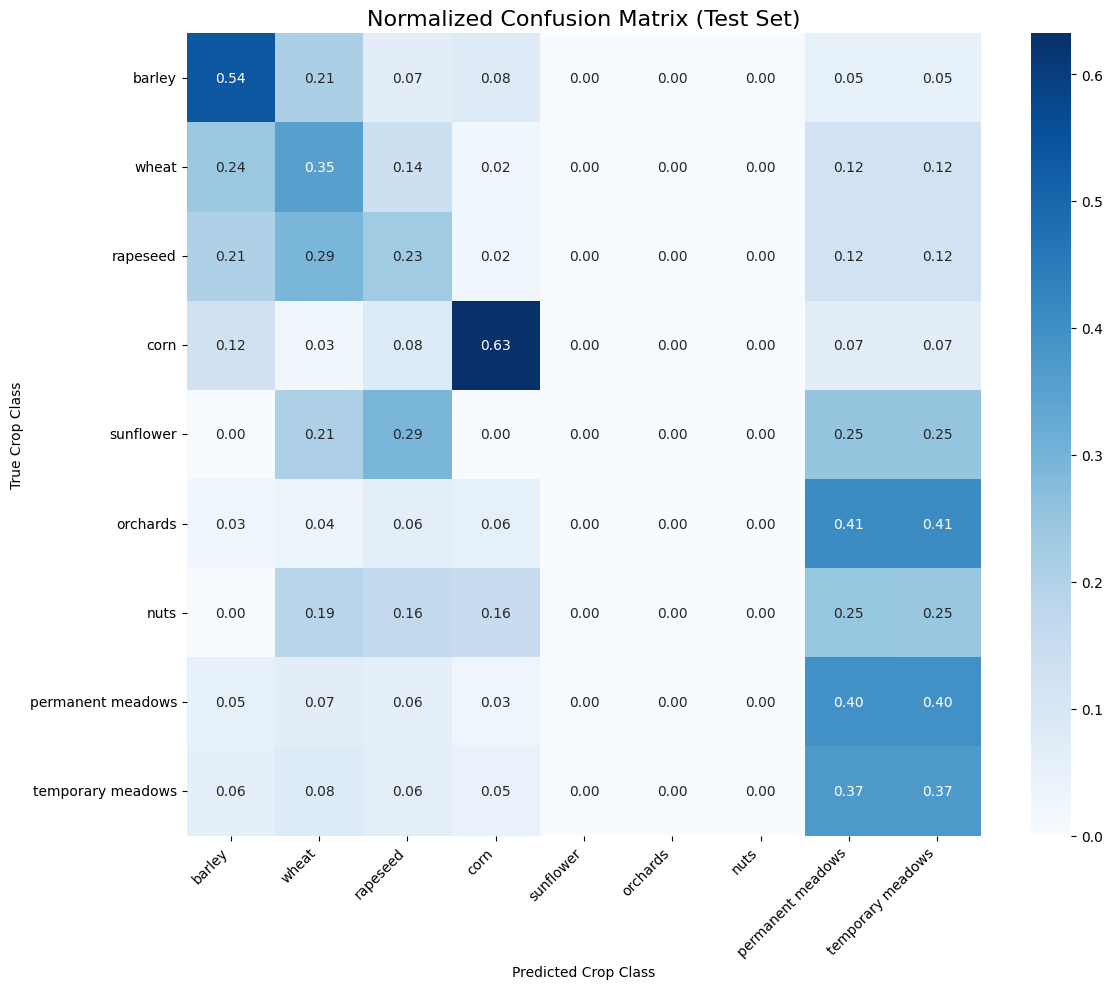


CONFUSION MATRIX VISUALIZATION AND ANALYSIS


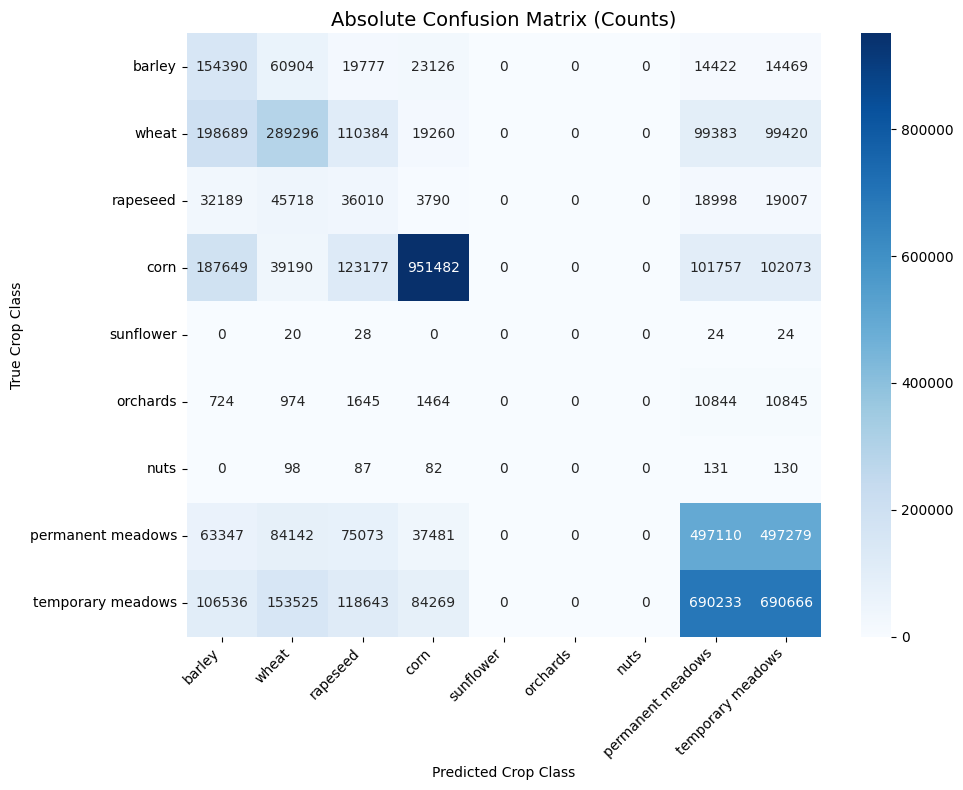

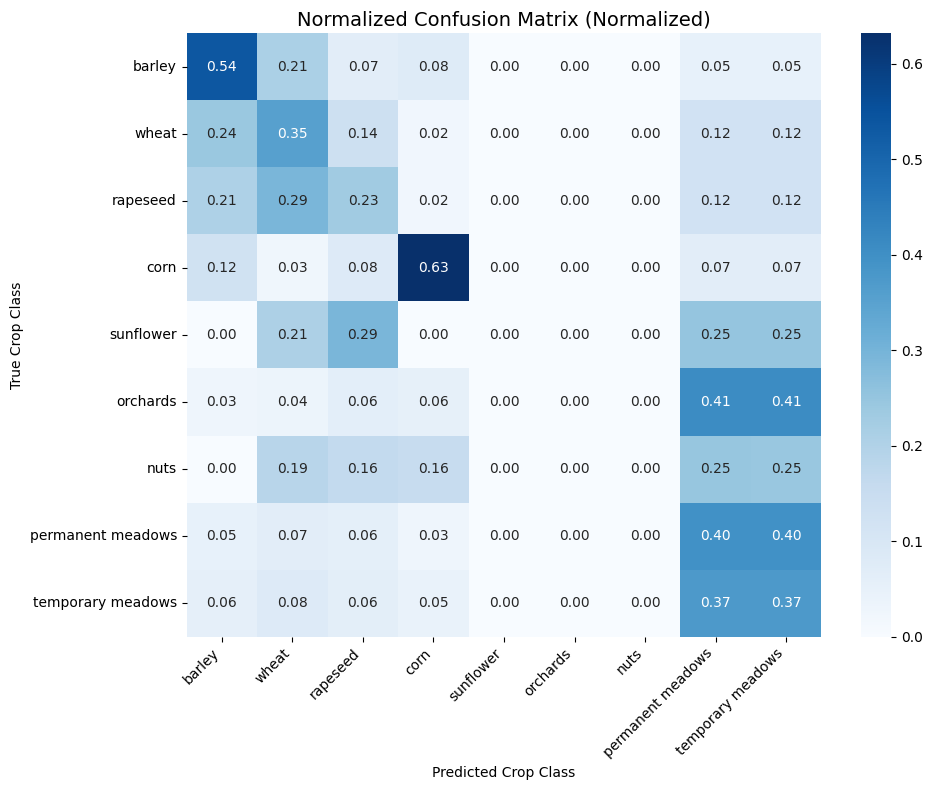


--- Detailed Confusion Analysis ---

**High Performance Class: barley** (Recall: 53.8%)
 - Top misclassification is: wheat (21.2%), corn (6.9%), rapeseed (8.1%).

**Moderate Class: wheat** (Recall: 35.4%)
 - Top misclassification is: barley (24.3%), rapeseed (13.5%), temporary meadows (2.4%).

**Low Performance Class: rapeseed** (Recall: 23.1%)
 - Top misclassification is: wheat (20.7%), barley (29.4%), temporary meadows (2.4%).

**High Performance Class: corn** (Recall: 63.2%)
 - Top misclassification is: barley (12.5%), rapeseed (2.6%), temporary meadows (8.2%).

**Low Performance Class: sunflower** (Recall: 0.0%)
 - Top misclassification is: temporary meadows (20.8%), permanent meadows (29.2%).

**Low Performance Class: orchards** (Recall: 0.0%)
 - Top misclassification is: temporary meadows (2.7%), permanent meadows (3.7%), rapeseed (6.2%).

**Low Performance Class: nuts** (Recall: 0.0%)
 - Top misclassification is: temporary meadows (18.6%), wheat (16.5%).

**Moderate Class: perm

In [ ]:
#@title Testing Initial Model
import numpy as np
import tensorflow as tf
import os
import gc
import random
import pandas as pd
from typing import Dict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model 


GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

# Optimal hyperparams
TARGET_LR = 0.000046
TARGET_WD = 0.00000004

# Load data and weights
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
WEIGHTS_LOAD_PATH = os.path.join(data_dir, "reproduced_model_weights_epoch7.weights.h5")

CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
NUM_CLASSES = 9 

file_names = {
    'X_test_final': 'X_test_final.npy',
    'y_test_final': 'y_test_final.npy' 
}


def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""

    cm = confusion_matrix(y_true, y_pred, normalize='true' if normalize else None)

    labels = list(class_names.values())

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f" if normalize else "d",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} ({ "Normalized" if normalize else "Counts"})', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_confusion_matrix(cm_normalized: np.ndarray, class_names: Dict[int, str]):
    """Performs a detailed textual analysis of the normalized confusion matrix."""
    labels = list(class_names.values())

    print("\n--- Detailed Confusion Analysis ---")

    for i in range(NUM_CLASSES):
        true_class_name = labels[i]

        # Misclassification row
        misclassification_row = np.delete(cm_normalized[i, :], i)

        # Get indices and values of top misclassified classes
        top_k_indices = np.argsort(misclassification_row)[::-1]

        # Map back to original column indices
        original_column_indices = [idx if idx < i else idx + 1 for idx in top_k_indices]

        # Get the top 3 misclassifications > 1%
        top_errors = [(labels[j], misclassification_row[k] * 100)
                      for k, j in enumerate(original_column_indices) if k < 3 and misclassification_row[k] > 0.01]

        # Get the correct prediction rate (Recall)
        correct_prediction = cm_normalized[i, i] * 100

        # Printing analysis
        status = ""
        if correct_prediction > 50: status = "High Performance Class"
        elif correct_prediction > 25: status = "Moderate Class"
        elif np.sum(cm_normalized[i, :]) < 0.1: status = "Poor/Rare Class (Low Support)"
        else: status = "Low Performance Class"

        print(f"\n**{status}: {true_class_name}** (Recall: {correct_prediction:.1f}%)")

        if len(top_errors) > 0:
            top_errors_str = ", ".join([f"{name} ({rate:.1f}%)" for name, rate in top_errors])
            print(f" - Top misclassification is: {top_errors_str}.")
        else:
            print(" - Errors are low and/or widely dispersed.")



# Executing

if __name__ == '__main__':

    print("Starting Final Evaluation: Loading weights and running metrics on Test Set.")

    # Loading test data
    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)
        print(f"Test data loaded. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file. Please check path and mount Drive: {e}")
        exit()

    tf.keras.backend.clear_session()
    final_model = build_1d_aunet()
    final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

    # Load saved weights
    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Check path: {e}")
        exit()

    # Performing predictions
    print("Making predictions on the Test Set...")
    y_pred_proba = final_compiled_model.predict(X_test_final_reloaded, verbose=1)

    # Flatten time dimension to get indices (T=48)
    T = X_test_final_reloaded.shape[1]
    y_true_tiled = np.tile(y_test_ohe_reloaded, (T, 1, 1)).transpose(1, 0, 2)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    _ = evaluate_model_metrics(
        final_compiled_model,
        X_test_final_reloaded,
        y_test_ohe_reloaded,
        CROP_MAP
    )

    # Generate confusion matrix
    print("CONFUSION MATRIX VISUALIZATION AND ANALYSIS")

    # Non-Normalized Confusion Matrix Plot 
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=False, title='Absolute Confusion Matrix')

    # Normalized Confusion Matrix Plot 
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix')

    # Call textual confusion analysis
    cm_normalized = confusion_matrix(y_true_indices, y_pred_indices, normalize='true')
    analyze_confusion_matrix(cm_normalized, CROP_MAP)

    # Cleaning
    del X_test_final_reloaded, y_test_ohe_reloaded, y_pred_proba
    gc.collect()

# Ablation Studies

## 1. Introducing Inverse Frequency Weighting

### 1a. Model Architecture

In [ ]:
#@title Ablation 1: Inverse Frequency Weighting Model
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os 

T_REGULARIZED = 48
F_AUGMENTED = 26
NUM_CLASSES = 9
INITIAL_CHANNELS = 32
U_NET_DEPTH = 4
DROPOUT_RATE = 0.4
L2_REG = 1e-4
INIT_LR = 0.0001
ADAMW_WEIGHT_DECAY = 1e-5

# Placeholder for class weights
CLASS_WEIGHTS_TENSOR = tf.constant(np.ones(NUM_CLASSES, dtype=np.float32))

@tf.function
def weighted_macro_dice_loss(y_true, y_pred):
    """
    Computes the Weighted Macro-Dice Loss (1 - Weighted Macro-Dice Score).
    Applies inverse frequency weights stored in CLASS_WEIGHTS_TENSOR.
    """
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    smooth = 1e-5

    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)

    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    dice_losses = 1.0 - dice_score_per_class

    weighted_dice_losses = dice_losses * CLASS_WEIGHTS_TENSOR

    mean_weighted_loss = tf.reduce_mean(weighted_dice_losses)

    return mean_weighted_loss

@tf.function
def macro_dice_loss(y_true, y_pred):
    """Unweighted Macro-Dice Loss, used here only as an evaluation metric."""
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    return 1. - macro_dice_score

#Unchanged

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

# Unchanged

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


# Unchanged model assembly

def build_1d_aunet():
    """Builds the 1D Attention U-Net model."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output

            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            x = conv_block_1d(x, current_filters, name=name)

    output_tensor = layers.Conv1D(
        NUM_CLASSES,
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model


def compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY):
    """
    Compiles the model using the AdamW optimizer and WEIGHTED_Macro-Dice Loss.
    """
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )

    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'),
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
        macro_dice_loss 
    ]

    model.compile(
        optimizer=optimizer,
        loss=weighted_macro_dice_loss, 
        metrics=wrapped_metrics
    )
    return model


def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = list(class_names.values())
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True, fmt=".2f", cmap="Blues",
        xticklabels=labels, yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline metrics on the Test Set."""
    y_pred_proba = model.predict(X_test)
    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)
    avg_accuracy = np.mean(recall_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    print("\n--- Generating Confusion Matrix Plot ---")
    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1

### 1b. Training

In [ ]:
#@title Training Inverse Frequency Weighting Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping 
from google.colab import files
import os
import gc
import random
from typing import Dict, Tuple

FIXED_PARALLEL_CALLS = 4
T_REGULARIZED = 48
NUM_CLASSES = 9

GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(lambda X, y: (X, tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))), num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(lambda X, y: (X, tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))), num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset


TARGET_BS = 64
TARGET_LR = 0.000046
TARGET_WD = 0.00000004
TARGET_EPOCHS = 50
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
WEIGHTS_SAVE_PATH = os.path.join(data_dir, "final_model_weights_epoch50_weighted.weights.h5")
LOCAL_SAVE_PATH = "final_model_weights_epoch50_local_weighted.weights.h5"

print(f"Starting Targeted Weighted Training Rerun (BS=64, LR=4.6e-5, WD=4e-8) for up to {TARGET_EPOCHS} Epochs.")

file_names = {
    'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
    'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
}

try:
    X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True)
    y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True)
    X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True)
    y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True)

    print("Data arrays loaded.")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find data file: {e}")
    exit()

# Calculating inverse frequency class weights
y_train_counts = np.sum(y_train_final, axis=0)
total_samples = np.sum(y_train_counts)

# Calculating raw inverse frequency weights
raw_weights = total_samples / (y_train_counts + 1e-5)

# Normalising the weights so they average to 1
normalized_weights = raw_weights / np.mean(raw_weights)

# Redfining global tensor
global CLASS_WEIGHTS_TENSOR
CLASS_WEIGHTS_TENSOR = tf.constant(normalized_weights, dtype=tf.float32)
print("\nInverse Frequency Class Weights Calculated and Set (Normalized):")
print(CLASS_WEIGHTS_TENSOR.numpy().round(4))
print("-" * 50)
# ------------------------------------------------------------------

# Building cached datasets
base_train_dataset = build_base_dataset(X_train_final, y_train_final)
base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

# RAM Optimization
del X_train_final, y_train_final, X_val_final, y_val_final
gc.collect()

tf.keras.backend.clear_session()
final_model = build_1d_aunet()
final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

final_train_dataset = build_tf_dataset_from_base(base_train_dataset, TARGET_BS)
final_val_dataset = build_tf_dataset_from_base(base_val_dataset, TARGET_BS, is_validation=True)

final_callbacks = [
    EarlyStopping(monitor='val_macro_dice_loss', patience=15, verbose=1, restore_best_weights=True, mode='min'),
    ReduceLROnPlateau(monitor='val_macro_dice_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7, mode='min'),
]

final_compiled_model.fit(
    final_train_dataset,
    validation_data=final_val_dataset,
    epochs=TARGET_EPOCHS,
    callbacks=final_callbacks,
    verbose=1,
)

# Saving model weights
final_compiled_model.save_weights(WEIGHTS_SAVE_PATH)
print(f"Model weights saved to Drive: {WEIGHTS_SAVE_PATH}")

final_compiled_model.save_weights(LOCAL_SAVE_PATH)

try:
    files.download(LOCAL_SAVE_PATH)
    print(f"Local download initiated for: {LOCAL_SAVE_PATH}")
except Exception as e:
    print(f"Could not automatically initiate file download. Please manually download the file '{LOCAL_SAVE_PATH}'.")

Starting Targeted Weighted Training Rerun (BS=64, LR=4.6e-5, WD=4e-8) for up to 50 Epochs.
Data arrays loaded.

Inverse Frequency Class Weights Calculated and Set (Normalized):
[0.1628 0.1628 0.1628 0.1628 5.2086 0.2368 2.6043 0.1497 0.1497]
--------------------------------------------------
Epoch 1/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - loss: 1.2836 - macro_dice_loss: 0.9126 - macro_f1: 0.1007 - macro_precision: 0.1694 - macro_recall: 0.0186 - overall_accuracy: 4.5849e-07 - val_loss: 1.2623 - val_macro_dice_loss: 0.9161 - val_macro_f1: 0.0787 - val_macro_precision: 0.4158 - val_macro_recall: 0.0041 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 2/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 1.2519 - macro_dice_loss: 0.9021 - macro_f1: 0.1114 - macro_precision: 0.2083 - macro_recall: 0.0328 - overall_accuracy: 9.0287e-07 - val_loss: 1.2472 - val_macro_dice_loss: 0.9104 - val_macro_f1: 0.0774 - val_macro_precision: 0.4059 - val_macro_recall: 0.0095

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Local download initiated for: final_model_weights_epoch50_local_weighted.weights.h5


### 1c. Testing

CLASS_WEIGHTS_TENSOR redefined for compilation (using weighted run values).
Starting Weighted Model Evaluation: Loading weights from the 50-epoch run.
Test data loaded. X_test shape: (122708, 48, 26)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 200 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Successfully loaded model weights from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/ablation1_final_model_weights_epoch50_weighted.weights.h5
Making predictions on the Test Set...
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 222s 57ms/step
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 211s 55ms/step

Per-Class Metrics (Required for Detailed Comparison)
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.1922  0.4435    0.2682
        1             wheat   816432     0.3333  0.3428    0.3380
        2          rapeseed   155712     0.0842  0.2410    0.1248
        3              corn  1505328     0.8032  0.3558    0.4931
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0022  0.0001    0.0001
        6              nuts      528     0.0000  0.0000    0.0000
        7 permanent meadows  1254432     0.3357  0.3943    0.3626
        8 temporary meadows  1843872     0.4678  0.3760    0.4169


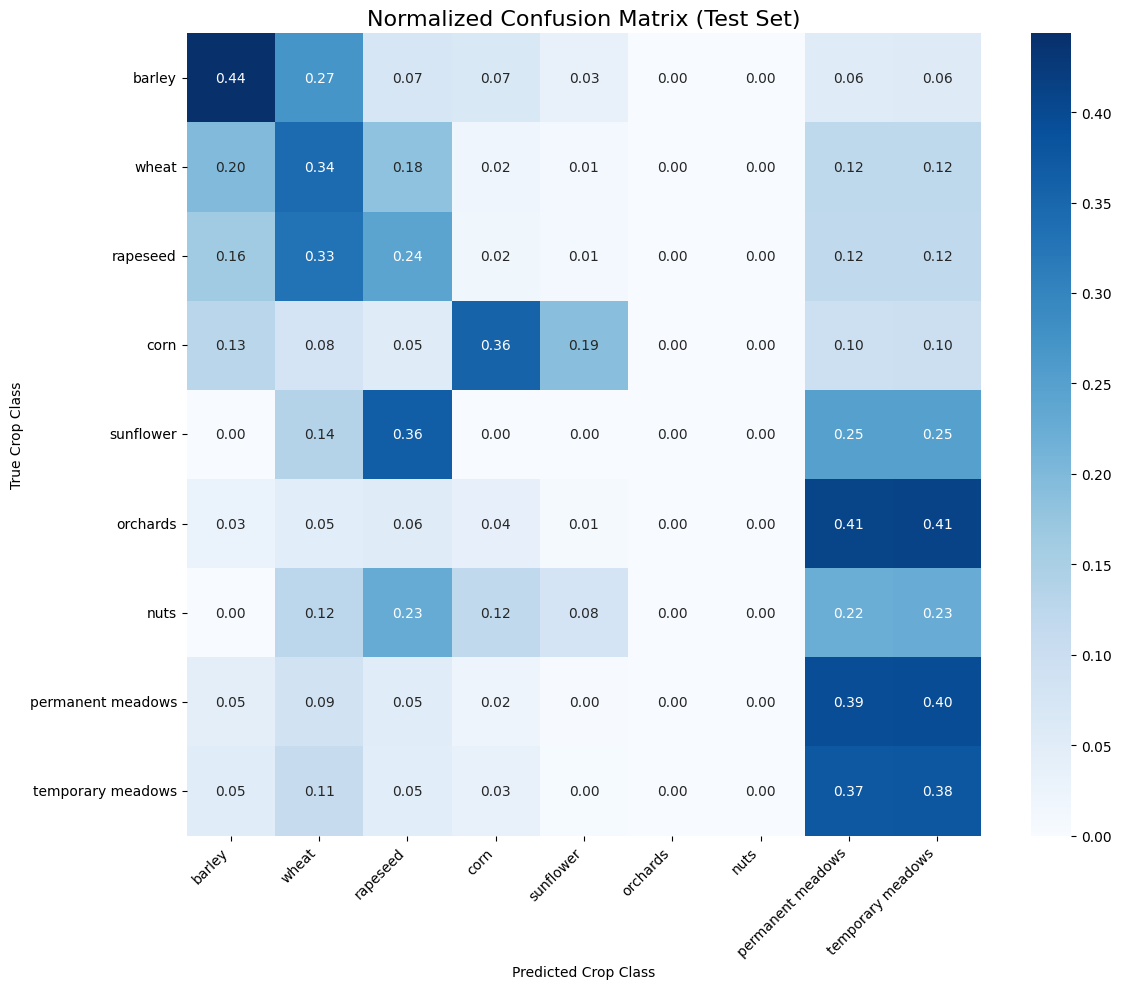


CONFUSION MATRIX VISUALIZATION


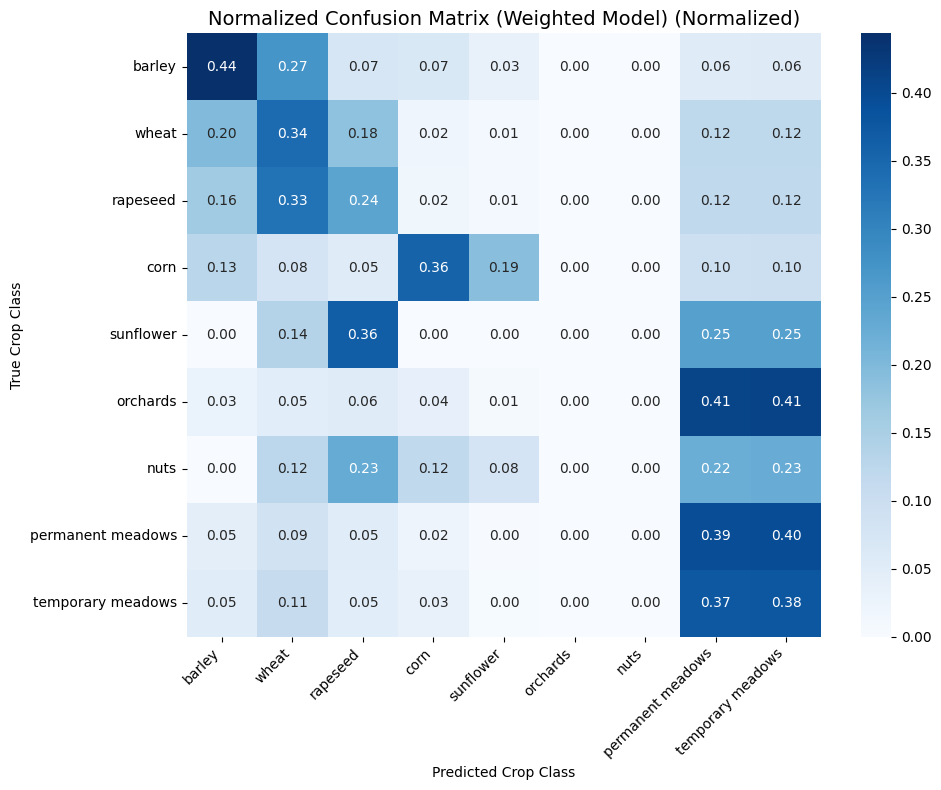

In [ ]:
#@title Testing Ablation 1
import numpy as np
import tensorflow as tf
import os
import gc
import random
import pandas as pd
from typing import Dict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

NUM_CLASSES = 9

GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

TARGET_LR = 0.000046
TARGET_WD = 0.00000004

data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
# Loading newly trained weighted model
WEIGHTS_LOAD_PATH = os.path.join(data_dir, "ablation1_final_model_weights_epoch50_weighted.weights.h5")

CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}

file_names = {
    'X_test_final': 'X_test_final.npy',
    'y_test_final': 'y_test_final.npy' 
}

CALCULATED_CLASS_WEIGHTS_NP = np.array([
    0.1628, 0.1628, 0.1628, 0.1628, 5.2086, 0.2368, 2.6043, 0.1497, 0.1497
], dtype=np.float32)

global CLASS_WEIGHTS_TENSOR
CLASS_WEIGHTS_TENSOR = tf.constant(CALCULATED_CLASS_WEIGHTS_NP, dtype=tf.float32)
print("CLASS_WEIGHTS_TENSOR redefined for compilation (using weighted run values).")


def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""
    cm = confusion_matrix(y_true, y_pred, normalize='true' if normalize else None)
    labels = list(class_names.values())
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
        xticklabels=labels, yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} ({ "Normalized" if normalize else "Counts"})', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':

    print("Starting Weighted Model Evaluation: Loading weights from the 50-epoch run.")

    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)
        print(f"Test data loaded. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file. Please check path and mount Drive: {e}")
        exit()

    tf.keras.backend.clear_session()
    final_model = build_1d_aunet()
    final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Check path: {e}")
        exit()

    print("Making predictions on the Test Set...")
    y_pred_proba = final_compiled_model.predict(X_test_final_reloaded, verbose=1)

    T = X_test_final_reloaded.shape[1]
    y_true_tiled = np.tile(y_test_ohe_reloaded, (T, 1, 1)).transpose(1, 0, 2)
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    _ = evaluate_model_metrics(
        final_compiled_model,
        X_test_final_reloaded,
        y_test_ohe_reloaded,
        CROP_MAP
    )

    print("CONFUSION MATRIX VISUALIZATION")

    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix (Weighted Model)')

    # Cleanup
    del X_test_final_reloaded, y_test_ohe_reloaded, y_pred_proba
    gc.collect()

# Ablation 2: Running training using Random Stratified Sampling on Training Set, removing over- and undersampling

### 2a. Preprocessing stratified training set

In [ ]:
#@title Preprocessing Stratified Ablation 2
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from typing import Dict, Tuple
import os
import random 

DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
TEST_REGION = 'frh04'
TRAIN_REGIONS = ['frh01', 'frh02']
VAL_REGION = 'frh03'
T_REGULARIZED = 48
N_TARGET_TRAIN = 22000 #target training set size
N_TARGET_VAL = 6000
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
SG_WINDOW_LENGTH = 11
SG_POLYORDER = 2


def print_distribution_table(y: np.ndarray, title: str, class_map: Dict[int, str]):
    """Prints a formatted table showing class counts and percentages."""
    if len(y) == 0:
        print(f"\n--- {title} Distribution (N=0) ---")
        print("Dataset is empty.")
        return

    counts = pd.Series(y).value_counts().sort_index()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Code', 'Count']
    df['Crop Class'] = df['Code'].map(class_map)
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100

    print(f"\n--- {title} Distribution (N={total}) ---")
    df = df[['Crop Class', 'Count', 'Percentage']]
    df = df.sort_values(by='Count', ascending=False)
    print(df.to_string(index=False, float_format="%.2f"))

# Removed oversample_orchards_ohit
# Removed downsample_and_balance_train_set

def stratified_subsample_train_set(X_train_pool: np.ndarray, y_train_pool: np.ndarray, target_n: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies stratified random subsampling, ensuring all Sunflower (4) and Nuts (6)
    samples are included, and subsampling the rest of the pool down to the target size.
    """

    # Retaining minority classes
    minority_retain_codes = [4, 6]
    minority_mask = pd.Series(y_train_pool).isin(minority_retain_codes).values

    X_minority_kept = X_train_pool[minority_mask]
    y_minority_kept = y_train_pool[minority_mask]

    X_major_pool = X_train_pool[~minority_mask]
    y_major_pool = y_train_pool[~minority_mask]

    N_minority = len(y_minority_kept)
    N_major_pool = len(y_major_pool)
    N_needed_from_major = target_n - N_minority

#Avoiding errors for low sample sizes
    if N_needed_from_major <= 0:
        print(f"Warning: Target N={target_n} is too small. Retaining all minority samples (N={N_minority}).")
        return X_minority_kept, y_minority_kept

    if N_needed_from_major >= N_major_pool:
        print("Warning: Retaining all majority samples.")
        X_kept = X_train_pool
        y_kept = y_train_pool
    else:
        keep_fraction = N_needed_from_major / N_major_pool
        test_size_fraction = 1.0 - keep_fraction

        X_major_kept, _, y_major_kept, _ = train_test_split(
            X_major_pool, y_major_pool,
            test_size=test_size_fraction,
            stratify=y_major_pool,
            random_state=42 
        )

        X_kept = np.concatenate([X_minority_kept, X_major_kept], axis=0)
        y_kept = np.concatenate([y_minority_kept, y_major_kept], axis=0)

    print(f"Stratified subsampling applied: {len(X_train_pool)} reduced to {len(y_kept)} (Target: {target_n}).")
    return X_kept, y_kept


def load_data_adhering_to_context(path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Loads data adhering to the strict regional split (FRH01/02, FRH03, FRH04)."""

    X_test_raw = np.load(f"{path}/X_raw_{TEST_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_test_raw = np.load(f"{path}/y_raw_{TEST_REGION}.npy", allow_pickle=True)

    X_train_list, y_train_list = [], []
    for region in TRAIN_REGIONS:
        X_train_list.append(np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True).astype(np.float32))
        y_train_list.append(np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True))

    X_train_pool_raw = np.concatenate(X_train_list, axis=0)
    y_train_pool_raw = np.concatenate(y_train_list, axis=0)

    X_val_full_raw = np.load(f"{path}/X_raw_{VAL_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_val_full_raw = np.load(f"{path}/y_raw_{VAL_REGION}.npy", allow_pickle=True)

    auto_include_classes_val = [4, 6]
    val_minority_mask = pd.Series(y_val_full_raw).isin(auto_include_classes_val).values
    X_val_minority = X_val_full_raw[val_minority_mask]
    y_val_minority = y_val_full_raw[val_minority_mask]

    X_val_major = X_val_full_raw[~val_minority_mask]
    y_val_major = y_val_full_raw[~val_minority_mask]

    N_current_val_minority = len(y_val_minority)
    N_needed_from_major = N_TARGET_VAL - N_current_val_minority

    if N_needed_from_major <= 0:
        X_val_sampled = X_val_minority[:N_TARGET_VAL]
        y_val_sampled = y_val_minority[:N_TARGET_VAL]
    else:
        test_size_fraction = 1.0 - (N_needed_from_major / len(X_val_major))
        test_size_fraction = min(max(test_size_fraction, 0.0), 1.0 - 1e-8)

        X_val_kept, _, y_val_kept, _ = train_test_split(
            X_val_major, y_val_major,
            test_size=test_size_fraction,
            stratify=y_val_major,
            random_state=42
        )
        X_val_sampled = np.concatenate([X_val_minority, X_val_kept], axis=0)
        y_val_sampled = np.concatenate([y_val_minority, y_val_kept], axis=0)

        if len(y_val_sampled) != N_TARGET_VAL:
             idx = np.random.choice(len(y_val_sampled), size=N_TARGET_VAL, replace=False)
             X_val_sampled = X_val_sampled[idx]
             y_val_sampled = y_val_sampled[idx]

    X_train_raw = X_train_pool_raw
    y_train_raw = y_train_pool_raw

    return X_train_raw, y_train_raw, X_val_sampled, y_val_sampled, X_test_raw, y_test_raw

def mask_and_interpolate(X: np.ndarray, T_target: int) -> Tuple[np.ndarray, np.ndarray]:
    """Applies Linear Interpolation to raw/scaled bands and generates the imputation mask."""
    N, T_max, F_raw = X.shape
    X_interpolated = []
    X_mask = []

    for i in range(N):
        ts = X[i]
        mask_raw = (ts != 0).all(axis=1)
        valid_indices = np.where(mask_raw)[0]

        interpolated_bands = np.zeros((T_target, F_raw), dtype=np.float32)
        imputation_mask_target = np.zeros(T_target, dtype=np.float32)

        if len(valid_indices) < 2:
            X_interpolated.append(interpolated_bands)
            X_mask.append(imputation_mask_target)
            continue

        time_base_raw = valid_indices.astype(np.float32)
        time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

        for j in range(F_raw):
            vals = ts[valid_indices, j]
            if np.isnan(vals).all() or len(vals) < 2:
                continue

            f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
            interpolated_bands[:, j] = f_interp(time_base_new)

        X_interpolated.append(interpolated_bands)

        nearest_indices = np.argmin(np.abs(time_base_raw[:, None] - time_base_new), axis=0)
        imputation_mask_target = mask_raw[valid_indices[nearest_indices]].astype(np.float32)
        X_mask.append(imputation_mask_target)

    return np.stack(X_interpolated), np.stack(X_mask)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T_max, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T_max, F)

    X_val_scaled = X_val.copy()
    if X_val_scaled.size:
        X_val_scaled = scaler.transform(X_val_scaled.reshape(-1, F)).reshape(X_val.shape[0], T_max, F)

    X_test_scaled = X_test.copy()
    if X_test_scaled.size:
        X_test_scaled = scaler.transform(X_test_scaled.reshape(-1, F)).reshape(X_test.shape[0], T_max, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


def calculate_vis(X_bands: np.ndarray, bands_map: Dict[str, int]) -> np.ndarray:
    """Calculates 15 VIs from the scaled and interpolated bands."""
    B2, B3, B4, B5, B8, B8A, B11 = (
        bands_map['B2'], bands_map['B3'], bands_map['B4'], bands_map['B5'],
        bands_map['B8'], bands_map['B8A'], bands_map['B11']
    )
    B6 = bands_map['B6']
    B7 = bands_map['B7']
    EPSILON = 1e-6

    B_B2 = X_bands[:, :, B2]
    B_B3 = X_bands[:, :, B3]
    B_B4 = X_bands[:, :, B4]
    B_B5 = X_bands[:, :, B5]
    B_B6 = X_bands[:, :, B6]
    B_B7 = X_bands[:, :, B7]
    B_B8 = X_bands[:, :, B8]
    B_B8A = X_bands[:, :, B8A]
    B_B11 = X_bands[:, :, B11]

    # 1. NDVI2
    ndvi2 = (B_B8 - B_B4) / (B_B8 + B_B4 + 0.1)
    # 2. BI
    bi = np.sqrt((2 * B_B4**2) / (B_B3**2 + EPSILON))
    # 3. VARI
    vari = (B_B3 - B_B4) / (B_B3 + B_B4 - B_B2 + EPSILON)
    # 4. NDWI
    ndwi = (B_B8 - B_B8A) / (B_B8 + B_B8A + EPSILON)
    # 5. IRECI
    ireci = ((B_B7 - B_B4) * B_B6) / (B_B5 + EPSILON)
    # 6. MTVI2
    mtvi2_num = 1.5 * (1.2 * (B_B8 - B_B3) - 2.5 * (B_B5 - B_B3))
    mtvi2_den_inner_term = (2 * B_B8 + 1)**2 - 6 * B_B5 + 5 * B_B3 + 0.5
    mtvi2_den_clipped = np.clip(mtvi2_den_inner_term, a_min=0.0, a_max=None)
    mtvi2_den = np.sqrt(mtvi2_den_clipped)
    mtvi2 = mtvi2_num / (mtvi2_den + EPSILON)
    # 7. RVI
    rvi = B_B8 / (B_B4 + EPSILON)
    # 8. GCVI
    gcvi = (B_B4 / (B_B3 + EPSILON)) - 1
    # 9. MNDWI
    mndwi = (B_B3 - B_B11) / (B_B3 + B_B11 + EPSILON)
    # 10. EVI
    evi_num = 2.5 * (B_B8 - B_B4)
    evi_den = B_B8 + 6 * B_B4 - 7.5 * B_B2 + 1
    evi = evi_num / (evi_den + EPSILON)
    # 11. SAVI
    savi = 1.5 * (B_B8 - B_B4) / (B_B8 + B_B4 + 0.5)
    # 12. BCI
    bci = 0.1360 * B_B3 + 0.2611 * B_B4 + 0.3895 * B_B8
    # 13. GNDVI
    gndvi = (B_B8 - B_B3) / (B_B8 + B_B3 + EPSILON)
    # 14. MSAVI
    msavi_term = (2 * B_B8 + 1)
    msavi_inside_sqrt = msavi_term**2 - 8 * (B_B8 - B_B4)
    msavi_inside_sqrt = np.clip(msavi_inside_sqrt, a_min=0.0, a_max=None)
    msavi = (msavi_term - np.sqrt(msavi_inside_sqrt)) / 2
    # 15. NDRE
    ndre = (B_B8 - B_B5) / (B_B8 + B_B5 + EPSILON)

    vis_stack = np.stack([
        ndvi2, bi, vari, ndwi, ireci, mtvi2, rvi, gcvi, mndwi, evi, savi, bci, gndvi, msavi, ndre
    ], axis=-1)

    return vis_stack

def apply_savitzky_golay_filter(X_features: np.ndarray, window_length: int, polyorder: int) -> np.ndarray:
    """Applies Savitzky-Golay filter for temporal smoothing on the features."""
    N, T, F = X_features.shape
    X_smoothed = np.zeros_like(X_features, dtype=np.float32)

    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2

    for f in range(F):
        X_smoothed[:, :, f] = savgol_filter(X_features[:, :, f],
                                            window_length=window_length,
                                            polyorder=polyorder,
                                            axis=1)
    return X_smoothed


# Static augmentation functions removed

if __name__ == '__main__':
    try:
        print("1. Loading raw data based on regional split...")
        X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = load_data_adhering_to_context(
            DATA_PATH
        )

        print(f"\n2. Applying Hybrid Subsampling: Retaining all minorities, Stratified sampling majority to N={N_TARGET_TRAIN}...")

        # Applying subsampling logic
        if X_train_raw.size:
            X_train_subsampled, y_train_subsampled = stratified_subsample_train_set(X_train_raw, y_train_raw, N_TARGET_TRAIN)
        else:
            X_train_subsampled, y_train_subsampled = X_train_raw, y_train_raw

        X_train_balanced, y_train_balanced = X_train_subsampled, y_train_subsampled

        # Val and test sets unchanged
        X_val_balanced, y_val_balanced = X_val_raw, y_val_raw
        X_test_balanced, y_test_balanced = X_test_raw, y_test_raw

        #Printing post subsampling
        print_distribution_table(
            y_train_balanced,
            "TRAINING SET (Stratified + Minority Retention)",
            CROP_MAP
        )

        print_distribution_table(
            y_val_balanced,
            "VALIDATION SET (Subsampled, FRH03)",
            CROP_MAP
        )

        print_distribution_table(
            y_test_balanced,
            "TEST SET (Unchanged, FRH04)",
            CROP_MAP
        )
        # -------------------------------------------------------------------------

        del X_train_raw, y_train_raw, X_val_raw, y_val_raw # Freeing up RAM

        print("\n3. Applying RobustScaler to RAW bands...")
        if X_train_balanced.shape[0] == 0:
            raise RuntimeError("No training samples after subsampling. Cannot fit scaler.")

        X_train_scaled, X_val_scaled, X_test_scaled, global_scaler = apply_robust_scaling(
            X_train_balanced, X_val_balanced, X_test_balanced
        )
        del X_train_balanced, y_train_balanced 

        print(f"4. Applying Linear Interpolation to T={T_REGULARIZED} and generating mask...")

        X_train_interp, X_train_mask = mask_and_interpolate(X_train_scaled, T_REGULARIZED)
        X_val_interp, X_val_mask = mask_and_interpolate(X_val_scaled, T_REGULARIZED)
        X_test_interp, X_test_mask = mask_and_interpolate(X_test_scaled, T_REGULARIZED)

        del X_train_scaled, X_val_scaled, X_test_scaled 

        print("5. Calculating 15 Vegetation Indices...")
        X_train_vis = calculate_vis(X_train_interp, BANDS)
        X_val_vis = calculate_vis(X_val_interp, BANDS)
        X_test_vis = calculate_vis(X_test_interp, BANDS)

        print("6. Applying Savitzky-Golay filtering...")

        X_train_sg_bands = apply_savitzky_golay_filter(X_train_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_bands = apply_savitzky_golay_filter(X_val_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_bands = apply_savitzky_golay_filter(X_test_interp, SG_WINDOW_LENGTH, SG_POLYORDER)

        X_train_sg_vis = apply_savitzky_golay_filter(X_train_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_vis = apply_savitzky_golay_filter(X_val_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_vis = apply_savitzky_golay_filter(X_test_vis, SG_WINDOW_LENGTH, SG_POLYORDER)

        del X_train_interp, X_val_interp, X_test_interp, X_train_vis, X_val_vis, X_test_vis 

        print("7. Final feature stacking...")
        X_train_new = np.concatenate([X_train_sg_bands, X_train_sg_vis, X_train_mask[:, :, None]], axis=-1)
        X_val_new = np.concatenate([X_val_sg_bands, X_val_sg_vis, X_val_mask[:, :, None]], axis=-1)
        X_test_new = np.concatenate([X_test_sg_bands, X_test_sg_vis, X_test_mask[:, :, None]], axis=-1)

        print("7.1. No Static Augmentation applied.")
        X_train_final = X_train_new
        y_train_final_indices = y_train_subsampled 

        X_train_new = X_train_final
        y_train_balanced = y_train_final_indices

        print_distribution_table(
            y_train_balanced,
            "TRAINING SET (Stratified + Minority Retention, FINAL)",
            CROP_MAP
        )

        print("\n8. Label encoding...")
        global_lb = LabelBinarizer()

        y_train_new = global_lb.fit_transform(y_train_balanced)

        y_val_new = global_lb.transform(y_val_balanced) if len(y_val_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)
        y_test_new = global_lb.transform(y_test_balanced) if len(y_test_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)

        print("\n9. Final Preprocessing Output Shapes")
        print(f"X_train_new (T=48, F=26, Stratified Hybrid): {X_train_new.shape}")
        print(f"y_train_new (OHE, Stratified Hybrid): {y_train_new.shape}")
        print(f"X_val_new (T=48, F=26, Subsampled): {X_val_new.shape}")
        print(f"y_val_new (OHE, Subsampled): {y_val_new.shape}")
        print(f"X_test_new (T=48, F=26, Unchanged): {X_test_new.shape}")
        print(f"y_test_new (OHE, Unchanged): {y_test_new.shape}")

        print("\nSaving final processed arrays...")
        np.save(os.path.join(DATA_PATH, 'X_train_final_stratified_minority_retain.npy'), X_train_new)
        np.save(os.path.join(DATA_PATH, 'y_train_final_stratified_minority_retain.npy'), y_train_new)
        np.save(os.path.join(DATA_PATH, 'X_val_final_stratified_minority_retain.npy'), X_val_new)
        np.save(os.path.join(DATA_PATH, 'y_val_final_stratified_minority_retain.npy'), y_val_new)
        np.save(os.path.join(DATA_PATH, 'X_test_final_stratified_minority_retain.npy'), X_test_new)
        np.save(os.path.join(DATA_PATH, 'y_test_final_stratified_minority_retain.npy'), y_test_new)
        print("All arrays saved successfully.")


    except Exception as e:
        print(f"\nError:{type(e).__name__}: {e}")

1. Loading raw data based on regional split...

2. Applying Hybrid Subsampling: Retaining all minorities, Stratified sampling majority to N=22000...
Stratified subsampling applied: 319414 reduced to 22000 (Target: 22000).

--- TRAINING SET (Stratified + Minority Retention) Distribution (N=22000) ---
       Crop Class  Count  Percentage
temporary meadows   6269       28.50
             corn   5545       25.20
permanent meadows   4758       21.63
            wheat   3123       14.20
           barley   1636        7.44
         rapeseed    546        2.48
         orchards     88        0.40
             nuts     28        0.13
        sunflower      7        0.03

--- VALIDATION SET (Subsampled, FRH03) Distribution (N=6000) ---
       Crop Class  Count  Percentage
temporary meadows   1894       31.57
             corn   1510       25.17
permanent meadows   1169       19.48
            wheat    978       16.30
           barley    257        4.28
         rapeseed    128        2.13
    

### 2b. Defining Model

In [ ]:
#@title Model Ablation 2
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

T_REGULARIZED = 48
F_AUGMENTED = 26
NUM_CLASSES = 9
INITIAL_CHANNELS = 32
U_NET_DEPTH = 4
DROPOUT_RATE = 0.4
L2_REG = 1e-4

TARGET_LR = 0.000046 
TARGET_WD = 0.00000004 

# Defining categorical cross entropy loss
def categorical_crossentropy_loss(y_true, y_pred):
    """Uses the built-in Keras CCE loss."""
    # Weights will be applied via the sample_weight argument in model.fit()
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred)

@tf.function
def macro_dice_loss(y_true, y_pred):
    """
    Unweighted Macro-Dice Loss, retained as a metric for tracking and validation monitoring.
    """
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)

    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)

    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)

    return 1. - macro_dice_score

# Unchanged model blocks

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

# Unchanged model wrapper for metrics

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


# Unchanged attention U-net assembly

def build_1d_aunet():
    """Builds the 1D Attention U-Net model."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output

            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            x = conv_block_1d(x, current_filters, name=name)

    output_tensor = layers.Conv1D(
        NUM_CLASSES,
        kernel_size=1, padding='same',
        activation='softmax',
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

# Compilation function using weighted CCE loss

import tensorflow as tf
from tensorflow.keras import metrics 

def compile_model(model, lr=TARGET_LR, weight_decay=TARGET_WD):
    """
    FIXED: Compiles the model using the AdamW optimizer, ensuring AdamW is accessible
    via the full TensorFlow path.
    """
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )

    macro_f1 = metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = metrics.Precision(name='macro_precision') 
    macro_recall = metrics.Recall(name='macro_recall')         

    wrapped_metrics = [
        metrics.Accuracy(name='overall_accuracy'),
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
        macro_dice_loss 
    ]

    model.compile(
        optimizer=optimizer,
        loss=categorical_crossentropy_loss,
        metrics=wrapped_metrics
    )
    return model

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""

    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = list(class_names.values())

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline
    metrics on the Test Set, and prints the Confusion Matrix.
    """

    y_pred_proba = model.predict(X_test)

    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)

    avg_accuracy = np.mean(recall_pc)

    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)

    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )

    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")

    print("\n--- Generating Confusion Matrix Plot ---")
    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1

### 2c. Training Model

In [ ]:
#@title Training Ablation 2
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from google.colab import files
import os
import gc
import random
from typing import Dict, Tuple
from collections import Counter 

FIXED_PARALLEL_CALLS = 4
T_REGULARIZED = 48
NUM_CLASSES = 9

GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(lambda X, y: (X, tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))), num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(lambda X, y: (X, tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))), num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset


TARGET_BS = 64
TARGET_LR = 0.000046
TARGET_WD = 0.00000004
TARGET_EPOCHS = 50
data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
WEIGHTS_SAVE_PATH = os.path.join(data_dir, "final_model_weights_epoch50_weighted.weights.h5")
LOCAL_SAVE_PATH = "final_model_weights_epoch50_local_weighted.weights.h5"

print(f"Starting Targeted Weighted Training Rerun (BS=64, LR=4.6e-5, WD=4e-8) for up to {TARGET_EPOCHS} Epochs.")

file_names = {
    'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
    'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
}

try:
    X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True)
    y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True)
    X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True)
    y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True)

    print("Data arrays loaded.")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find data file: {e}")
    exit()

# Calculating inverse frequency class weights
y_train_int_labels = np.argmax(y_train_final, axis=1)
counts_dict = Counter(y_train_int_labels)
total_samples = len(y_train_int_labels)
class_weight_dict = {}

for i in range(NUM_CLASSES):
    count = counts_dict.get(i, 0)
    weight = total_samples / (NUM_CLASSES * count) if count > 0 else total_samples / NUM_CLASSES
    class_weight_dict[i] = float(weight)

print("\nInverse Frequency Class Weights Calculated and Set (Dictionary format for Keras):")
print(class_weight_dict)

base_train_dataset = build_base_dataset(X_train_final, y_train_final)
base_val_dataset = build_val_base_dataset(X_val_final, y_val_final)

del X_train_final, y_train_final, X_val_final, y_val_final
gc.collect()

tf.keras.backend.clear_session()
final_model = build_1d_aunet()

final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

final_train_dataset = build_tf_dataset_from_base(base_train_dataset, TARGET_BS)
final_val_dataset = build_tf_dataset_from_base(base_val_dataset, TARGET_BS, is_validation=True)

final_callbacks = [
    EarlyStopping(monitor='val_macro_dice_loss', patience=15, verbose=1, restore_best_weights=True, mode='min'),
    ReduceLROnPlateau(monitor='val_macro_dice_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7, mode='min'),
]

final_compiled_model.fit(
    final_train_dataset,
    validation_data=final_val_dataset,
    epochs=TARGET_EPOCHS,
    callbacks=final_callbacks,
    class_weight=class_weight_dict, # Weighted CCE loss applied
    verbose=1,
)

# Saving new weights
final_compiled_model.save_weights(WEIGHTS_SAVE_PATH)
print(f"Model weights saved to Drive: {WEIGHTS_SAVE_PATH}")

final_compiled_model.save_weights(LOCAL_SAVE_PATH)

try:
    files.download(LOCAL_SAVE_PATH)
    print(f"Local download initiated for: {LOCAL_SAVE_PATH}")
except Exception as e:
    print(f"Could not automatically initiate file download. Please manually download the file '{LOCAL_SAVE_PATH}'.")

Starting Targeted Weighted Training Rerun (BS=64, LR=4.6e-5, WD=4e-8) for up to 50 Epochs.
Data arrays loaded.

Inverse Frequency Class Weights Calculated and Set (Dictionary format for Keras):
{0: 0.7729166666666667, 1: 0.7729166666666667, 2: 0.7729166666666667, 3: 0.7729166666666667, 4: 24.733333333333334, 5: 1.1242424242424243, 6: 12.366666666666667, 7: 0.710727969348659, 8: 0.710727969348659}
--------------------------------------------------
Epoch 1/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - loss: 2.3985 - macro_dice_loss: 0.9145 - macro_f1: 0.1011 - macro_precision: 0.1600 - macro_recall: 0.0124 - overall_accuracy: 0.0000e+00 - val_loss: 2.4677 - val_macro_dice_loss: 0.9184 - val_macro_f1: 0.0629 - val_macro_precision: 0.0448 - val_macro_recall: 2.1001e-05 - val_overall_accuracy: 0.0000e+00 - learning_rate: 4.6000e-05
Epoch 2/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 2.2456 - macro_dice_loss: 0.9125 - macro_f1: 0.1010 - macro_precision: 0.1867 - macro_recall: 0.00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Local download initiated for: final_model_weights_epoch50_local_weighted.weights.h5


### 2d. Testing Model

Starting WCCE Model Evaluation: Loading best weights.
Test data loaded and cast to float32. X_test shape: (122708, 48, 26)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 200 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Successfully loaded model weights from: /content/drive/MyDrive/COMP0173_Applying_New_Context/data/ablation2final_model_weights_epoch50_weighted.weights.h5
Making predictions on the Test Set...
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step

WCCE MODEL EVALUATION RESULTS

Per-Class Metrics:
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.1692  0.6817    0.2711
        1             wheat   816432     0.5635  0.1114    0.1860
        2          rapeseed   155712     0.0640  0.3001    0.1055
        3              corn  1505328     0.8261  0.2782    0.4162
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0000  0.0000    0.0000
        6              nuts      528     0.0002  0.1269    0.0004
        7 permanent meadows  1254432     0.4367  0.0001    0.0002
        8 temporary meadows  1843872     0.4837  0.6696    0.5617

Overall Metrics:
Macro F1-Score: 0.1712
Overall Acc

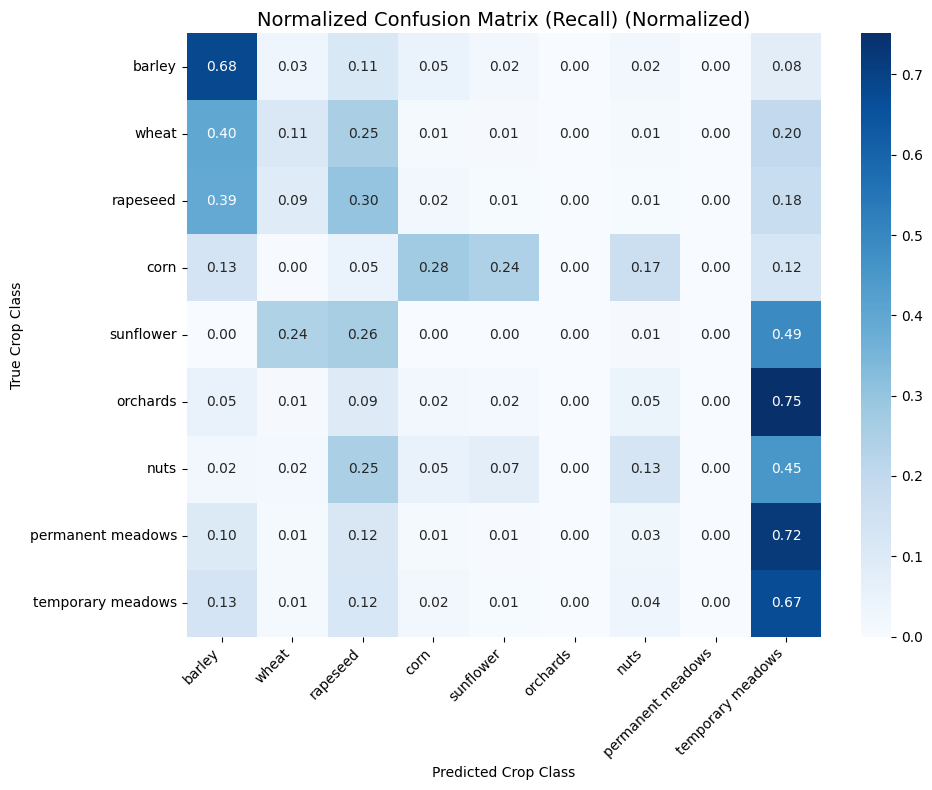


--- Detailed Confusion Analysis ---

**High Performance Class: barley** (Recall: 68.2%)
 - Top misclassification is: rapeseed (3.3%), temporary meadows (11.2%), corn (4.7%).

**Low Performance Class: wheat** (Recall: 11.1%)
 - Top misclassification is: barley (40.1%), rapeseed (25.3%), temporary meadows (1.4%).

**Moderate Class: rapeseed** (Recall: 30.0%)
 - Top misclassification is: barley (39.3%), temporary meadows (9.0%), wheat (2.3%).

**Moderate Class: corn** (Recall: 27.8%)
 - Top misclassification is: sunflower (13.4%), barley (5.1%).

**Low Performance Class: sunflower** (Recall: 0.0%)
 - Top misclassification is: rapeseed (24.0%), wheat (26.0%).

**Low Performance Class: orchards** (Recall: 0.0%)
 - Top misclassification is: temporary meadows (5.5%), rapeseed (1.0%), barley (9.4%).

**Low Performance Class: nuts** (Recall: 12.7%)
 - Top misclassification is: temporary meadows (2.5%), rapeseed (1.5%), sunflower (25.0%).

**Low Performance Class: permanent meadows** (Recall: 0

In [ ]:
#@title Testing Ablation 2
import numpy as np
import tensorflow as tf
import os
import gc
import random
import pandas as pd
from typing import Dict
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

NUM_CLASSES = 9
T_REGULARIZED = 48

GLOBAL_SEED = 42
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

TARGET_LR = 0.000046
TARGET_WD = 0.00000004

data_dir = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data/"
FILE_SUFFIX = "_stratified_minority_retain"

WEIGHTS_LOAD_PATH = os.path.join(data_dir, f"ablation2final_model_weights_epoch50_weighted.weights.h5")

CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}

file_names = {
    'X_test_final': f'X_test_final{FILE_SUFFIX}.npy',
    'y_test_final': f'y_test_final{FILE_SUFFIX}.npy' 
}


def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""

    if not normalize:
        return

    cm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = list(class_names.values())
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt=".2f", cmap="Blues", 
        xticklabels=labels, yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} (Normalized)', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_confusion_matrix(cm_normalized: np.ndarray, class_names: Dict[int, str]):
    """Performs a detailed textual analysis of the normalized confusion matrix."""
    labels = list(class_names.values())[:NUM_CLASSES]

    print("\n--- Detailed Confusion Analysis ---")

    for i in range(NUM_CLASSES):
        true_class_name = labels[i]
        cm_row = cm_normalized[i, :]
        correct_prediction = cm_row[i] * 100

        misclassification_row = np.delete(cm_row, i)
        top_k_indices = np.argsort(misclassification_row)[::-1]

        original_column_indices = [idx if idx < i else idx + 1 for idx in top_k_indices]

        top_errors = [(labels[j], misclassification_row[k] * 100)
                      for k, j in enumerate(original_column_indices) if k < 3 and misclassification_row[k] > 0.01]

        status = ""
        if correct_prediction > 50: status = "High Performance Class"
        elif correct_prediction > 25: status = "Moderate Class"
        elif np.sum(cm_normalized[i, :]) < 0.1: status = "Poor/Rare Class (Low Support)"
        else: status = "Low Performance Class"

        print(f"\n**{status}: {true_class_name}** (Recall: {correct_prediction:.1f}%)")

        if len(top_errors) > 0:
            top_errors_str = ", ".join([f"{name} ({rate:.1f}%)" for name, rate in top_errors])
            print(f" - Top misclassification is: {top_errors_str}.")
        else:
            print(" - Errors are low and/or widely dispersed.")

    print("--- Finished Confusion Matrix Analysis ---")


if __name__ == '__main__':

    print("Starting WCCE Model Evaluation: Loading best weights.")

    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True)
        X_test_final_reloaded = X_test_final_reloaded.astype(np.float32)
        y_test_ohe_reloaded = y_test_ohe_reloaded.astype(np.float32)
        print(f"Test data loaded and cast to float32. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file: {e}")
        raise RuntimeError("Cannot proceed without test data.")

    tf.keras.backend.clear_session()
    final_model = build_1d_aunet()
    final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

    # Loading saved weights
    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Check path: {e}")
        raise RuntimeError("Failed to load model weights.")

    print("Making predictions on the Test Set...")
    y_pred_proba = final_compiled_model.predict(X_test_final_reloaded, verbose=1)

    T = X_test_final_reloaded.shape[1]
    y_true_tiled = np.tile(np.expand_dims(y_test_ohe_reloaded, axis=1), (1, T, 1))
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)
    avg_accuracy = np.mean(recall_pc)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [CROP_MAP.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nWCCE MODEL EVALUATION RESULTS")
    print("\nPer-Class Metrics:")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics:")
    print(f"Macro F1-Score: {macro_f1:.4f}")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")


    print("\nCONFUSION MATRIX VISUALIZATION AND ANALYSIS")

    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix (Recall)')

    cm_normalized = confusion_matrix(y_true_indices, y_pred_indices, normalize='true')
    analyze_confusion_matrix(cm_normalized, CROP_MAP)
 
    del X_test_final_reloaded, y_test_ohe_reloaded, y_pred_proba
    gc.collect()

# Ablation 3: Feature Selection

### 3a. Mutual Information Scores Calculation

In [ ]:
#@title Feature Mutual Information Calculation Ablation 3
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from typing import Dict, Tuple
import os
import random

DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
TEST_REGION = 'frh04'
TRAIN_REGIONS = ['frh01', 'frh02']
VAL_REGION = 'frh03'
T_REGULARIZED = 48
N_TARGET_TRAIN = 22000
N_TARGET_VAL = 6000
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
SG_WINDOW_LENGTH = 11
SG_POLYORDER = 2


def print_distribution_table(y: np.ndarray, title: str, class_map: Dict[int, str]):
    """Prints a formatted table showing class counts and percentages."""
    if len(y) == 0:
        print(f"\n--- {title} Distribution (N=0) ---")
        print("Dataset is empty.")
        return

    counts = pd.Series(y).value_counts().sort_index()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Code', 'Count']
    df['Crop Class'] = df['Code'].map(class_map)
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100

    print(f"\n--- {title} Distribution (N={total}) ---")
    df = df[['Crop Class', 'Count', 'Percentage']]
    df = df.sort_values(by='Count', ascending=False)
    print(df.to_string(index=False, float_format="%.2f"))

def oversample_orchards_ohit(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    OHIT Placeholder: Generates synthetic 'Orchards' samples to reach 2,200.
    """
    orchards_code = 5
    orchards_mask = (y == orchards_code)
    X_orchards = X[orchards_mask]
    N_orchards_current = len(X_orchards)
    N_orchards_target = 2200

    if N_orchards_current >= N_orchards_target:
        return X, y

    N_synthetic_needed = N_orchards_target - N_orchards_current

    if N_synthetic_needed > 0 and N_orchards_current > 0:
        synthetic_indices = np.random.choice(N_orchards_current, size=N_synthetic_needed, replace=True)
        X_synthetic = X_orchards[synthetic_indices]
        y_synthetic = np.full(N_synthetic_needed, orchards_code, dtype=y.dtype)

        X_new = np.concatenate([X, X_synthetic], axis=0)
        y_new = np.concatenate([y, y_synthetic], axis=0)
        return X_new, y_new
    else:
        return X, y

def downsample_and_balance_train_set(X_train: np.ndarray, y_train: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies random downsampling to majority classes (FRH01+FRH02 pool)
    and then applies OHIT placeholder for Orchards.
    """
    TARGET_COUNTS = {
        0: 3200, 1: 3200, 2: 3200, 3: 3200, 4: 7, 5: 2200, 6: 28, 7: 3480, 8: 3480
    }

    X_balanced_list = []
    y_balanced_list = []
    unique_classes = np.unique(y_train)

    auto_include_classes = [4, 6]

    for cls in unique_classes:
        cls = int(cls)
        X_cls = X_train[y_train == cls]
        y_cls = y_train[y_train == cls]
        target_count = TARGET_COUNTS.get(cls, len(X_cls))

        if cls in auto_include_classes or cls == 5:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)
            continue

        if len(X_cls) > target_count:
            idx = np.random.choice(len(X_cls), size=target_count, replace=False)
            X_balanced_list.append(X_cls[idx])
            y_balanced_list.append(y_cls[idx])
        else:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)

    X_downsampled = np.concatenate(X_balanced_list, axis=0)
    y_downsampled = np.concatenate(y_balanced_list, axis=0)

    X_final, y_final = oversample_orchards_ohit(X_downsampled, y_downsampled)

    return X_final, y_final

def load_data_adhering_to_context(path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Loads data adhering to the strict regional split (FRH01/02, FRH03, FRH04)."""

    X_test_raw = np.load(f"{path}/X_raw_{TEST_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_test_raw = np.load(f"{path}/y_raw_{TEST_REGION}.npy", allow_pickle=True)

    X_train_list, y_train_list = [], []
    for region in TRAIN_REGIONS:
        X_train_list.append(np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True).astype(np.float32))
        y_train_list.append(np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True))

    X_train_pool_raw = np.concatenate(X_train_list, axis=0)
    y_train_pool_raw = np.concatenate(y_train_list, axis=0)

    X_val_full_raw = np.load(f"{path}/X_raw_{VAL_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_val_full_raw = np.load(f"{path}/y_raw_{VAL_REGION}.npy", allow_pickle=True)

    auto_include_classes_val = [4, 6]
    val_minority_mask = pd.Series(y_val_full_raw).isin(auto_include_classes_val).values
    X_val_minority = X_val_full_raw[val_minority_mask]
    y_val_minority = y_val_full_raw[val_minority_mask]

    X_val_major = X_val_full_raw[~val_minority_mask]
    y_val_major = y_val_full_raw[~val_minority_mask]

    N_current_val_minority = len(y_val_minority)
    N_needed_from_major = N_TARGET_VAL - N_current_val_minority

    if N_needed_from_major <= 0:
        X_val_sampled = X_val_minority[:N_TARGET_VAL]
        y_val_sampled = y_val_minority[:N_TARGET_VAL]
    else:
        test_size_fraction = 1.0 - (N_needed_from_major / len(X_val_major))
        test_size_fraction = min(max(test_size_fraction, 0.0), 1.0 - 1e-8)

        X_val_kept, _, y_val_kept, _ = train_test_split(
            X_val_major, y_val_major,
            test_size=test_size_fraction,
            stratify=y_val_major,
            random_state=42
        )
        X_val_sampled = np.concatenate([X_val_minority, X_val_kept], axis=0)
        y_val_sampled = np.concatenate([y_val_minority, y_val_kept], axis=0)

        if len(y_val_sampled) != N_TARGET_VAL:
             idx = np.random.choice(len(y_val_sampled), size=N_TARGET_VAL, replace=False)
             X_val_sampled = X_val_sampled[idx]
             y_val_sampled = y_val_sampled[idx]

    X_train_raw = X_train_pool_raw
    y_train_raw = y_train_pool_raw

    return X_train_raw, y_train_raw, X_val_sampled, y_val_sampled, X_test_raw, y_test_raw

def mask_and_interpolate(X: np.ndarray, T_target: int) -> Tuple[np.ndarray, np.ndarray]:
    """Applies Linear Interpolation to raw/scaled bands and generates the imputation mask."""
    N, T_max, F_raw = X.shape
    X_interpolated = []
    X_mask = []

    for i in range(N):
        ts = X[i]
        mask_raw = (ts != 0).all(axis=1)
        valid_indices = np.where(mask_raw)[0]

        interpolated_bands = np.zeros((T_target, F_raw), dtype=np.float32)
        imputation_mask_target = np.zeros(T_target, dtype=np.float32)

        if len(valid_indices) < 2:
            X_interpolated.append(interpolated_bands)
            X_mask.append(imputation_mask_target)
            continue

        time_base_raw = valid_indices.astype(np.float32)
        time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

        for j in range(F_raw):
            vals = ts[valid_indices, j]
            if np.isnan(vals).all() or len(vals) < 2:
                continue

            f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
            interpolated_bands[:, j] = f_interp(time_base_new)

        X_interpolated.append(interpolated_bands)

        nearest_indices = np.argmin(np.abs(time_base_raw[:, None] - time_base_new), axis=0)
        imputation_mask_target = mask_raw[valid_indices[nearest_indices]].astype(np.float32)
        X_mask.append(imputation_mask_target)

    return np.stack(X_interpolated), np.stack(X_mask)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T_max, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T_max, F)

    X_val_scaled = X_val.copy()
    if X_val_scaled.size:
        X_val_scaled = scaler.transform(X_val_scaled.reshape(-1, F)).reshape(X_val.shape[0], T_max, F)

    X_test_scaled = X_test.copy()
    if X_test_scaled.size:
        X_test_scaled = scaler.transform(X_test_scaled.reshape(-1, F)).reshape(X_test.shape[0], T_max, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


def calculate_vis(X_bands: np.ndarray, bands_map: Dict[str, int]) -> np.ndarray:
    """Calculates 15 VIs from the scaled and interpolated bands."""
    B2, B3, B4, B5, B8, B8A, B11 = (
        bands_map['B2'], bands_map['B3'], bands_map['B4'], bands_map['B5'],
        bands_map['B8'], bands_map['B8A'], bands_map['B11']
    )
    B6 = bands_map['B6']
    B7 = bands_map['B7']
    EPSILON = 1e-6

    B_B2 = X_bands[:, :, B2]
    B_B3 = X_bands[:, :, B3]
    B_B4 = X_bands[:, :, B4]
    B_B5 = X_bands[:, :, B5]
    B_B6 = X_bands[:, :, B6]
    B_B7 = X_bands[:, :, B7]
    B_B8 = X_bands[:, :, B8]
    B_B8A = X_bands[:, :, B8A]
    B_B11 = X_bands[:, :, B11]

    # 1. NDVI2
    ndvi2 = (B_B8 - B_B4) / (B_B8 + B_B4 + 0.1)
    # 2. BI
    bi = np.sqrt((2 * B_B4**2) / (B_B3**2 + EPSILON))
    # 3. VARI
    vari = (B_B3 - B_B4) / (B_B3 + B_B4 - B_B2 + EPSILON)
    # 4. NDWI
    ndwi = (B_B8 - B_B8A) / (B_B8 + B_B8A + EPSILON)
    # 5. IRECI
    ireci = ((B_B7 - B_B4) * B_B6) / (B_B5 + EPSILON)
    # 6. MTVI2 - FIXED: Integrated clipping to prevent negative square root values
    mtvi2_num = 1.5 * (1.2 * (B_B8 - B_B3) - 2.5 * (B_B5 - B_B3))
    mtvi2_den_inner_term = (2 * B_B8 + 1)**2 - 6 * B_B5 + 5 * B_B3 + 0.5
    mtvi2_den_clipped = np.clip(mtvi2_den_inner_term, a_min=0.0, a_max=None)
    mtvi2_den = np.sqrt(mtvi2_den_clipped)
    mtvi2 = mtvi2_num / (mtvi2_den + EPSILON)
    # 7. RVI
    rvi = B_B8 / (B_B4 + EPSILON)
    # 8. GCVI
    gcvi = (B_B4 / (B_B3 + EPSILON)) - 1
    # 9. MNDWI
    mndwi = (B_B3 - B_B11) / (B_B3 + B_B11 + EPSILON)
    # 10. EVI
    evi_num = 2.5 * (B_B8 - B_B4)
    evi_den = B_B8 + 6 * B_B4 - 7.5 * B_B2 + 1
    evi = evi_num / (evi_den + EPSILON)
    # 11. SAVI
    savi = 1.5 * (B_B8 - B_B4) / (B_B8 + B_B4 + 0.5)
    # 12. BCI
    bci = 0.1360 * B_B3 + 0.2611 * B_B4 + 0.3895 * B_B8
    # 13. GNDVI
    gndvi = (B_B8 - B_B3) / (B_B8 + B_B3 + EPSILON)
    # 14. MSAVI
    msavi_term = (2 * B_B8 + 1)
    msavi_inside_sqrt = msavi_term**2 - 8 * (B_B8 - B_B4)
    msavi_inside_sqrt = np.clip(msavi_inside_sqrt, a_min=0.0, a_max=None)
    msavi = (msavi_term - np.sqrt(msavi_inside_sqrt)) / 2
    # 15. NDRE
    ndre = (B_B8 - B_B5) / (B_B8 + B_B5 + EPSILON)

    vis_stack = np.stack([
        ndvi2, bi, vari, ndwi, ireci, mtvi2, rvi, gcvi, mndwi, evi, savi, bci, gndvi, msavi, ndre
    ], axis=-1)

    return vis_stack

def apply_savitzky_golay_filter(X_features: np.ndarray, window_length: int, polyorder: int) -> np.ndarray:
    """Applies Savitzky-Golay filter for temporal smoothing on the features."""
    N, T, F = X_features.shape
    X_smoothed = np.zeros_like(X_features, dtype=np.float32)

    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2

    for f in range(F):
        X_smoothed[:, :, f] = savgol_filter(X_features[:, :, f],
                                            window_length=window_length,
                                            polyorder=polyorder,
                                            axis=1)
    return X_smoothed

def jitter(X, sigma=0.03):
    return X + np.random.normal(loc=0., scale=sigma, size=X.shape)

def scaling(X, sigma=0.1):
    factor = np.random.normal(loc=1., scale=sigma, size=(X.shape[1],))
    factor = factor.reshape(1, X.shape[1])
    return X * factor

def apply_augmentation(X):
    X_aug = X.copy()
    if np.random.rand() < 0.5:
        X_aug = jitter(X_aug)
    if np.random.rand() < 0.5:
        X_aug = scaling(X_aug)
    return X_aug

def perform_static_augmentation(X_train: np.ndarray, y_train_indices: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Statically augments Sunflower (4) and Nuts (6) samples.
    """
    TARGET_COPIES = {4: 100, 6: 200}

    X_augmented_list = [X_train]
    y_augmented_list = [y_train_indices]

    for class_id, target_N in TARGET_COPIES.items():
        class_mask = (y_train_indices == class_id)
        X_cls = X_train[class_mask]
        y_cls = y_train_indices[class_mask]
        N_current = len(X_cls)

        if N_current == 0:
            continue

        N_generate = target_N - N_current

        if N_generate > 0:
            indices_to_duplicate = np.random.choice(N_current, size=N_generate, replace=True)
            X_copies = X_cls[indices_to_duplicate].copy()
            y_copies = y_cls[indices_to_duplicate].copy()

            for i in range(N_generate):
                X_copies[i] = apply_augmentation(X_copies[i])

            X_augmented_list.append(X_copies)
            y_augmented_list.append(y_copies)

    X_final = np.concatenate(X_augmented_list, axis=0)
    y_final = np.concatenate(y_augmented_list, axis=0)

    return X_final, y_final


if __name__ == '__main__':
    try:
        print("--- Preprocessing and MI Calculation Start ---")

        X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = load_data_adhering_to_context(
            DATA_PATH
        )

        if X_train_raw.size:
            X_train_balanced, y_train_balanced = downsample_and_balance_train_set(X_train_raw, y_train_raw)
        else:
            X_train_balanced, y_train_balanced = X_train_raw, y_train_raw

        del X_train_raw, y_train_raw, y_val_raw

        if X_train_balanced.shape[0] == 0:
            raise RuntimeError("No training samples after subsampling. Cannot fit scaler.")

        X_train_scaled, X_val_scaled, X_test_scaled, global_scaler = apply_robust_scaling(
            X_train_balanced, X_val_raw, X_test_raw
        )

        del X_train_balanced, X_val_raw, X_test_raw

        X_train_interp, X_train_mask = mask_and_interpolate(X_train_scaled, T_REGULARIZED)

        del X_train_scaled 

        X_train_vis = calculate_vis(X_train_interp, BANDS)

        X_train_sg_bands = apply_savitzky_golay_filter(X_train_interp, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_train_sg_vis = apply_savitzky_golay_filter(X_train_vis, SG_WINDOW_LENGTH, SG_POLYORDER)

        del X_train_interp, X_train_vis 

        # Calculating Mutual Information

        print("\n--- Mutual Information (MI) Ranking of Vegetation Indices ---")

        N_train = X_train_sg_vis.shape[0]
        T = T_REGULARIZED
        F_vis = 15

        # Defining VI names based on calculation order (matching calculate_vis)
        VI_NAMES = [
            'NDVI2', 'BI', 'VARI', 'NDWI', 'IRECI', 'MTVI2', 'RVI', 'GCVI',
            'MNDWI', 'EVI', 'SAVI', 'BCI', 'GNDVI', 'MSAVI', 'NDRE'
        ]

        # Flattening X and y
        X_vis_flat = X_train_sg_vis.reshape(N_train * T, F_vis)
        y_flat = np.repeat(y_train_balanced, T)

        # Calculating MI scores
        mi_scores = mutual_info_classif(
            X_vis_flat,
            y_flat,
            random_state=42,
            n_neighbors=5
        )

        ranking_df = pd.DataFrame({
            'VI Name': VI_NAMES,
            'MI Score': mi_scores
        }).sort_values(by='MI Score', ascending=False)

        print("Mutual Information Ranking (T-Flattened):")
        print(ranking_df.to_string(index=False, float_format="%.4f"))

        print("\n--- Continuing with remaining steps ---")

        X_train_new = np.concatenate([X_train_sg_bands, X_train_sg_vis, X_train_mask[:, :, None]], axis=-1)

        X_train_final, y_train_final_indices = perform_static_augmentation(
            X_train_new,
            y_train_balanced
        )

        X_train_new = X_train_final
        y_train_balanced = y_train_final_indices

        global_lb = LabelBinarizer()
        y_train_new = global_lb.fit_transform(y_train_balanced)

    except Exception as e:
        print(f"\nError: {type(e).__name__}: {e}")
        print("Check DATA_PATH and raw .npy files.")

--- Preprocessing and MI Calculation Start ---

--- Mutual Information (MI) Ranking of Vegetation Indices ---
Mutual Information Ranking (T-Flattened):
VI Name  MI Score
  MTVI2    0.1300
  MSAVI    0.0842
   SAVI    0.0663
  IRECI    0.0636
   GCVI    0.0617
   VARI    0.0596
    RVI    0.0569
    EVI    0.0528
     BI    0.0516
   NDRE    0.0402
   NDWI    0.0372
  NDVI2    0.0368
  MNDWI    0.0365
  GNDVI    0.0356
    BCI    0.0312

--- Continuing with remaining steps ---


### 3b. Sequential Forward Selection
Note that this was run in AWS rather than google colab due to GPU constraints in colab.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import pandas as pd
from typing import Dict, Tuple, List
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import os
import gc
import random 

GLOBAL_SEED = 42 
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

DATA_DIRECTORY = "Data"  
T_REGULARIZED = 48  
NUM_CLASSES = 9
INITIAL_CHANNELS = 32
U_NET_DEPTH = 4    
DROPOUT_RATE = 0.4  
L2_REG = 1e-4      
INIT_LR = 0.0001    
ADAMW_WEIGHT_DECAY = 1e-5
FIXED_PARALLEL_CALLS = 4 

BAND_INDICES = list(range(10)) 
VI_INDICES = list(range(10, 25)) 
MASK_INDEX = 25 

VI_MAP = {
    'NDVI2': 0, 'BI': 1, 'VARI': 2, 'NDWI': 3, 'IRECI': 4, 'MTVI2': 5, 
    'RVI': 6, 'GCVI': 7, 'MNDWI': 8, 'EVI': 9, 'SAVI': 10, 'BCI': 11, 
    'GNDVI': 12, 'MSAVI': 13, 'NDRE': 14
}

MI_RANKED_TOP5_FEATURES = [
    (VI_MAP['MTVI2'] + 10, 'MTVI2'),    
    (VI_MAP['MSAVI'] + 10, 'MSAVI'),    
    (VI_MAP['SAVI'] + 10, 'SAVI'),      
    (VI_MAP['IRECI'] + 10, 'IRECI'),    
    (VI_MAP['GCVI'] + 10, 'GCVI')       
]

BASE_INDICES = BAND_INDICES + [MASK_INDEX]
BASE_FEATURE_COUNT = len(BASE_INDICES)


@tf.function
def macro_dice_loss(y_true, y_pred):
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    return 1. - macro_dice_score

def conv_block_1d(input_tensor, filters, name):
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)
    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x

def TemporalAttentionGate(input_features, gating_signal, name):
    filters = input_features.shape[-1]
    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)
    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)
    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)
    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)
    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name: name = metric_fn.name
        super().__init__(name=name, **kwargs)
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)
    def result(self): return self.metric_fn.result()
    def reset_state(self): self.metric_fn.reset_state()
    def get_config(self):
        config = super().get_config()
        config.update({"metric_fn": tf.keras.metrics.serialize(self.metric_fn)})
        return config
    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)

def build_1d_aunet(num_input_features):
    """Builds the 1D Attention U-Net model with dynamically sized input."""
    inputs = layers.Input(shape=(T_REGULARIZED, num_input_features), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'
        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            up_conv_output = layers.Conv1DTranspose(
                current_filters, kernel_size=2, strides=2, padding='same', name=f'{name}_upconv'
            )(x)
            attended_features = TemporalAttentionGate(
                input_features=encoder_output, gating_signal=up_conv_output, name=f'{name}_attn'
            )
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])
            x = conv_block_1d(x, current_filters, name=name)

    output_tensor = layers.Conv1D(
        NUM_CLASSES, kernel_size=1, padding='same', activation='softmax', name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

def compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY):
    optimizer = tf.keras.optimizers.AdamW(learning_rate=lr, weight_decay=weight_decay)
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'),
        FlattenTimeWrapper(macro_f1, name='macro_f1'),
        FlattenTimeWrapper(tf.keras.metrics.Precision(name='macro_precision'), name='macro_precision'),
        FlattenTimeWrapper(tf.keras.metrics.Recall(name='macro_recall'), name='macro_recall'),
    ]

    model.compile(
        optimizer=optimizer,
        loss=macro_dice_loss, 
        metrics=wrapped_metrics
    )
    return model


def tf_tile_labels(X, y):
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int):
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE) 
    return dataset

#SFS 

def run_sfs_trial(X_train: np.ndarray, y_train: np.ndarray, X_val: np.ndarray, y_val: np.ndarray, 
                  feature_indices: List[int], feature_names: List[str], max_epochs: int) -> float:
    
    current_f_count = len(feature_indices)
    
    # Slicing X
    X_train_slice = X_train[:, :, feature_indices]
    X_val_slice = X_val[:, :, feature_indices]
    
    base_train_dataset = build_base_dataset(X_train_slice, y_train)
    base_val_dataset = build_base_dataset(X_val_slice, y_val)
    train_dataset = build_tf_dataset_from_base(base_train_dataset, batch_size=64)
    val_dataset = build_tf_dataset_from_base(base_val_dataset, batch_size=64)
  
    tf.keras.backend.clear_session()
    model = build_1d_aunet(num_input_features=current_f_count)
    compiled_model = compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY)

    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, verbose=0, min_lr=1e-7), 
        EarlyStopping(monitor='val_macro_f1', patience=10, verbose=1, mode='max', restore_best_weights=True)
    ]

    print(f"\n--- SFS Trial: {', '.join(feature_names)} (F={current_f_count}) ---")
    
    history = compiled_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=max_epochs, 
        callbacks=callbacks,
        verbose=1, 
    )
    
    best_macro_f1 = max(history.history.get('val_macro_f1', [-1.0]))
    
    print(f"Trial Finished. Best Validation Macro F1: {best_macro_f1:.4f}")
    
    del model, compiled_model, base_train_dataset, base_val_dataset, train_dataset, val_dataset
    gc.collect()

    return best_macro_f1 

if __name__ == '__main__':
    
    file_names = {
        'X_train_final': 'X_train_final.npy', 'y_train_final': 'y_train_final.npy',
        'X_val_final': 'X_val_final.npy', 'y_val_final': 'y_val_final.npy',
    }
    
    try:
        print(f"Attempting to load data from individual files within the '{DATA_DIRECTORY}' directory...")
        
        X_train_full = np.load(os.path.join(DATA_DIRECTORY, file_names['X_train_final']), allow_pickle=True)
        y_train = np.load(os.path.join(DATA_DIRECTORY, file_names['y_train_final']), allow_pickle=True)
        X_val_full = np.load(os.path.join(DATA_DIRECTORY, file_names['X_val_final']), allow_pickle=True)
        y_val = np.load(os.path.join(DATA_DIRECTORY, file_names['y_val_final']), allow_pickle=True)
        
        X_train_full = X_train_full.astype(np.float32)
        X_val_full = X_val_full.astype(np.float32)
        y_train = y_train.astype(np.float32)
        y_val = y_val.astype(np.float32)
        
        """
        from sklearn.preprocessing import LabelBinarizer 
        if len(y_train.shape) == 1 or y_train.shape[-1] != NUM_CLASSES: 
             print("Converting labels to One-Hot Encoding (OHE)...")
             lb = LabelBinarizer()
             y_train = lb.fit_transform(y_train)
             y_val = lb.transform(y_val)
        """
            
        print(f"Final processed data arrays loaded successfully from directory '{DATA_DIRECTORY}'.")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find a data file. Check that the '{DATA_DIRECTORY}' directory exists and contains all required files (X_train_final.npy, etc.): {e}")
        raise FileNotFoundError(f"Missing data file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred during data loading: {e}")
        raise e
    
    gc.collect() 
    
    # executing SFS
    
    MAX_SFS_EPOCHS = 30
    
    # Current feature set starts with 10 bands and 1 mask
    current_indices = list(BASE_INDICES)
    current_names = ['Band'] * len(BAND_INDICES) + ['Mask']
    
    results = []
    best_f1 = -1.0
    
    print(f"\nStarting SFS on Top 5 MI VIs (Max Epochs: {MAX_SFS_EPOCHS})")

    for idx, (vi_index, vi_name) in enumerate(MI_RANKED_TOP5_FEATURES):
        
        # Adding the next best VI index
        current_indices.append(vi_index)
        current_names.append(vi_name)
        
        # Calculating Macro F1
        f1_score = run_sfs_trial(
            X_train=X_train_full, 
            y_train=y_train, 
            X_val=X_val_full, 
            y_val=y_val,
            feature_indices=current_indices,
            feature_names=current_names,
            max_epochs=MAX_SFS_EPOCHS
        )
        
        results.append({
            'Iteration': idx + 1,
            'VI Added': vi_name,
            'F_count': len(current_indices),
            'Val_Macro_F1': f1_score
        })
        
        # Check for stopping condition - greedy
        if f1_score > best_f1:
            best_f1 = f1_score
            print(f"-> Improvement recorded. Keeping {vi_name}.")
        else:
            print(f"-> Performance did NOT improve over best set ({best_f1:.4f}).")

    results_df = pd.DataFrame(results)
    print("Results of Feature Selection")
    print(results_df.to_string(index=False, float_format="%.4f"))

    best_subset_row = results_df.loc[results_df['Val_Macro_F1'].idxmax()]
    print(f"\nOptimal Subset F1: {best_subset_row['Val_Macro_F1']:.4f} (at Iteration {int(best_subset_row['Iteration'])})")

Attempting to load data from individual files within the 'Data' directory...
Final processed data arrays loaded successfully from directory 'Data'.

Starting SFS on Top 5 MI VIs (Max Epochs: 30)

--- SFS Trial: Band, Band, Band, Band, Band, Band, Band, Band, Band, Band, Mask, MTVI2 (F=12) ---
Epoch 1/30


2025-12-08 18:15:40.098000: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1765217753.379216   15825 service.cc:145] XLA service 0x7f137817fd40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765217753.379252   15825 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-12-08 18:15:53.713466: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1765217754.147101   15825 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


347/347 [==============================] - 55s 37ms/step - loss: 1.1546 - overall_accuracy: 1.9804e-05 - macro_f1: 0.1767 - macro_precision: 0.2897 - macro_recall: 0.1055 - val_loss: 1.1102 - val_overall_accuracy: 3.1113e-06 - val_macro_f1: 0.1717 - val_macro_precision: 0.4012 - val_macro_recall: 0.3532 - lr: 1.0000e-04
Epoch 2/30
347/347 [==============================] - 8s 24ms/step - loss: 1.0398 - overall_accuracy: 2.2765e-04 - macro_f1: 0.2572 - macro_precision: 0.3578 - macro_recall: 0.2893 - val_loss: 1.0270 - val_overall_accuracy: 3.3835e-05 - val_macro_f1: 0.2389 - val_macro_precision: 0.4278 - val_macro_recall: 0.4080 - lr: 1.0000e-04
Epoch 3/30
347/347 [==============================] - 8s 24ms/step - loss: 0.9984 - overall_accuracy: 3.0572e-04 - macro_f1: 0.2709 - macro_precision: 0.3702 - macro_recall: 0.3313 - val_loss: 0.9916 - val_overall_accuracy: 2.3335e-05 - val_macro_f1: 0.2534 - val_macro_precision: 0.4387 - val_macro_recall: 0.4291 - lr: 1.0000e-04
Epoch 4/30
347

# Ablation 4: Unscaling Vegetation Indices

### 4a. Preprocessing

In [ ]:
#@title Unscaling Single VI Ablation 4
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from typing import Dict, Tuple
import os
import random

DATA_PATH = "/content/drive/MyDrive/COMP0173_Applying_New_Context/data"
TEST_REGION = 'frh04'
TRAIN_REGIONS = ['frh01', 'frh02']
VAL_REGION = 'frh03'
T_REGULARIZED = 48
N_TARGET_TRAIN = 22000
N_TARGET_VAL = 6000
BANDS = {
    'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4,
    'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9
}
CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}
SG_WINDOW_LENGTH = 11
SG_POLYORDER = 2


def print_distribution_table(y: np.ndarray, title: str, class_map: Dict[int, str]):
    """Kept for reference, but calls are removed from main execution."""
    if len(y) == 0:
        print(f"\n--- {title} Distribution (N=0) ---")
        print("Dataset is empty.")
        return

    counts = pd.Series(y).value_counts().sort_index()
    df = pd.DataFrame(counts).reset_index()
    df.columns = ['Code', 'Count']
    df['Crop Class'] = df['Code'].map(class_map)
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100

    print(f"\n--- {title} Distribution (N={total}) ---")
    df = df[['Crop Class', 'Count', 'Percentage']]
    df = df.sort_values(by='Count', ascending=False)
    print(df.to_string(index=False, float_format="%.2f"))

def oversample_orchards_ohit(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    OHIT Placeholder: Generates synthetic 'Orchards' samples to reach 2,200.
    (Simple duplication used as placeholder for complex OHIT method.)
    """
    orchards_code = 5
    orchards_mask = (y == orchards_code)
    X_orchards = X[orchards_mask]
    N_orchards_current = len(X_orchards)
    N_orchards_target = 2200

    if N_orchards_current >= N_orchards_target:
        return X, y

    N_synthetic_needed = N_orchards_target - N_orchards_current

    if N_synthetic_needed > 0 and N_orchards_current > 0:
        synthetic_indices = np.random.choice(N_orchards_current, size=N_synthetic_needed, replace=True)
        X_synthetic = X_orchards[synthetic_indices]
        y_synthetic = np.full(N_synthetic_needed, orchards_code, dtype=y.dtype)

        X_new = np.concatenate([X, X_synthetic], axis=0)
        y_new = np.concatenate([y, y_synthetic], axis=0)
        return X_new, y_new
    else:
        return X, y

def downsample_and_balance_train_set(X_train: np.ndarray, y_train: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies random downsampling to majority classes (FRH01+FRH02 pool)
    and then applies OHIT placeholder for Orchards.
    """
    TARGET_COUNTS = {
        0: 3200, 1: 3200, 2: 3200, 3: 3200, 4: 7, 5: 2200, 6: 28, 7: 3480, 8: 3480
    }

    X_balanced_list = []
    y_balanced_list = []
    unique_classes = np.unique(y_train)

    auto_include_classes = [4, 6]

    for cls in unique_classes:
        cls = int(cls)
        X_cls = X_train[y_train == cls]
        y_cls = y_train[y_train == cls]
        target_count = TARGET_COUNTS.get(cls, len(X_cls))

        if cls in auto_include_classes or cls == 5:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)
            continue

        if len(X_cls) > target_count:
            idx = np.random.choice(len(X_cls), size=target_count, replace=False)
            X_balanced_list.append(X_cls[idx])
            y_balanced_list.append(y_cls[idx])
        else:
            X_balanced_list.append(X_cls)
            y_balanced_list.append(y_cls)

    X_downsampled = np.concatenate(X_balanced_list, axis=0)
    y_downsampled = np.concatenate(y_balanced_list, axis=0)

    X_final, y_final = oversample_orchards_ohit(X_downsampled, y_downsampled)

    return X_final, y_final

def load_data_adhering_to_context(path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Loads data adhering to the strict regional split (FRH01/02, FRH03, FRH04)."""

    X_test_raw = np.load(f"{path}/X_raw_{TEST_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_test_raw = np.load(f"{path}/y_raw_{TEST_REGION}.npy", allow_pickle=True)

    X_train_list, y_train_list = [], []
    for region in TRAIN_REGIONS:
        X_train_list.append(np.load(f"{path}/X_raw_{region}.npy", allow_pickle=True).astype(np.float32))
        y_train_list.append(np.load(f"{path}/y_raw_{region}.npy", allow_pickle=True))

    X_train_pool_raw = np.concatenate(X_train_list, axis=0)
    y_train_pool_raw = np.concatenate(y_train_list, axis=0)

    X_val_full_raw = np.load(f"{path}/X_raw_{VAL_REGION}.npy", allow_pickle=True).astype(np.float32)
    y_val_full_raw = np.load(f"{path}/y_raw_{VAL_REGION}.npy", allow_pickle=True)

    auto_include_classes_val = [4, 6]
    val_minority_mask = pd.Series(y_val_full_raw).isin(auto_include_classes_val).values
    X_val_minority = X_val_full_raw[val_minority_mask]
    y_val_minority = y_val_full_raw[val_minority_mask]

    X_val_major = X_val_full_raw[~val_minority_mask]
    y_val_major = y_val_full_raw[~val_minority_mask]

    N_current_val_minority = len(y_val_minority)
    N_needed_from_major = N_TARGET_VAL - N_current_val_minority

    if N_needed_from_major <= 0:
        X_val_sampled = X_val_minority[:N_TARGET_VAL]
        y_val_sampled = y_val_minority[:N_TARGET_VAL]
    else:
        test_size_fraction = 1.0 - (N_needed_from_major / len(X_val_major))
        test_size_fraction = min(max(test_size_fraction, 0.0), 1.0 - 1e-8)

        X_val_kept, _, y_val_kept, _ = train_test_split(
            X_val_major, y_val_major,
            test_size=test_size_fraction,
            stratify=y_val_major,
            random_state=42
        )
        X_val_sampled = np.concatenate([X_val_minority, X_val_kept], axis=0)
        y_val_sampled = np.concatenate([y_val_minority, y_val_kept], axis=0)

        if len(y_val_sampled) != N_TARGET_VAL:
             idx = np.random.choice(len(y_val_sampled), size=N_TARGET_VAL, replace=False)
             X_val_sampled = X_val_sampled[idx]
             y_val_sampled = y_val_sampled[idx]

    X_train_raw = X_train_pool_raw
    y_train_raw = y_train_pool_raw

    return X_train_raw, y_train_raw, X_val_sampled, y_val_sampled, X_test_raw, y_test_raw

def mask_and_interpolate(X: np.ndarray, T_target: int) -> Tuple[np.ndarray, np.ndarray]:
    """Applies Linear Interpolation to raw/scaled bands and generates the imputation mask."""
    N, T_max, F_raw = X.shape
    X_interpolated = []
    X_mask = []

    for i in range(N):
        ts = X[i]
        mask_raw = (ts != 0).all(axis=1)
        valid_indices = np.where(mask_raw)[0]

        interpolated_bands = np.zeros((T_target, F_raw), dtype=np.float32)
        imputation_mask_target = np.zeros(T_target, dtype=np.float32)

        if len(valid_indices) < 2:
            X_interpolated.append(interpolated_bands)
            X_mask.append(imputation_mask_target)
            continue

        time_base_raw = valid_indices.astype(np.float32)
        time_base_new = np.linspace(time_base_raw.min(), time_base_raw.max(), T_target).astype(np.float32)

        for j in range(F_raw):
            vals = ts[valid_indices, j]
            if np.isnan(vals).all() or len(vals) < 2:
                continue

            f_interp = interp1d(time_base_raw, vals, kind='linear', fill_value='extrapolate', bounds_error=False)
            interpolated_bands[:, j] = f_interp(time_base_new)

        X_interpolated.append(interpolated_bands)

        nearest_indices = np.argmin(np.abs(time_base_raw[:, None] - time_base_new), axis=0)
        imputation_mask_target = mask_raw[valid_indices[nearest_indices]].astype(np.float32)
        X_mask.append(imputation_mask_target)

    return np.stack(X_interpolated), np.stack(X_mask)


def apply_robust_scaling(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, RobustScaler]:
    """Applies RobustScaler fitted only on the training set (Per-Band, Global Temporal)."""
    N_train, T_max, F = X_train.shape
    X_train_flat = X_train.reshape(-1, F)

    scaler = RobustScaler()
    scaler.fit(X_train_flat)

    X_train_scaled = scaler.transform(X_train_flat).reshape(N_train, T_max, F)

    X_val_scaled = X_val.copy()
    if X_val_scaled.size:
        X_val_scaled = scaler.transform(X_val_scaled.reshape(-1, F)).reshape(X_val.shape[0], T_max, F)

    X_test_scaled = X_test.copy()
    if X_test_scaled.size:
        X_test_scaled = scaler.transform(X_test_scaled.reshape(-1, F)).reshape(X_test.shape[0], T_max, F)

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler


def calculate_vis(X_bands: np.ndarray, bands_map: Dict[str, int]) -> np.ndarray:
    """
    MODIFIED: Calculates ONLY MTVI2 (1 feature).
    This runs on the raw interpolated bands to ensure MTVI2 is UNSCALED.
    """

    B3, B5, B8 = (
        bands_map['B3'], bands_map['B5'], bands_map['B8']
    )
    EPSILON = 1e-6

    B_B3 = X_bands[:, :, B3]
    B_B5 = X_bands[:, :, B5]
    B_B8 = X_bands[:, :, B8]

    mtvi2_num = 1.5 * (1.2 * (B_B8 - B_B3) - 2.5 * (B_B5 - B_B3))
    mtvi2_den_inner_term = (2 * B_B8 + 1)**2 - 6 * B_B5 + 5 * B_B3 + 0.5
    mtvi2_den_clipped = np.clip(mtvi2_den_inner_term, a_min=0.0, a_max=None)
    mtvi2_den = np.sqrt(mtvi2_den_clipped)
    mtvi2 = mtvi2_num / (mtvi2_den + EPSILON)

    # Return only MTVI2
    vis_stack = np.expand_dims(mtvi2, axis=-1)

    return vis_stack

def apply_savitzky_golay_filter(X_features: np.ndarray, window_length: int, polyorder: int) -> np.ndarray:
    """Applies Savitzky-Golay filter for temporal smoothing on the features."""
    N, T, F = X_features.shape
    X_smoothed = np.zeros_like(X_features, dtype=np.float32)

    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2

    for f in range(F):
        X_smoothed[:, :, f] = savgol_filter(X_features[:, :, f],
                                            window_length=window_length,
                                            polyorder=polyorder,
                                            axis=1)
    return X_smoothed


def jitter(X, sigma=0.03):
    """Apply random noise (jittering) to the time series spectral values."""
    return X + np.random.normal(loc=0., scale=sigma, size=X.shape)

def scaling(X, sigma=0.1):
    """Apply a random scaling factor to the entire time series."""
    factor = np.random.normal(loc=1., scale=sigma, size=(X.shape[1],))
    factor = factor.reshape(1, X.shape[1])
    return X * factor

def apply_augmentation(X):
    """Applies jittering and scaling with a 50% probability each."""
    X_aug = X.copy()
    if np.random.rand() < 0.5:
        X_aug = jitter(X_aug)
    if np.random.rand() < 0.5:
        X_aug = scaling(X_aug)
    return X_aug

def perform_static_augmentation(X_train: np.ndarray, y_train_indices: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Statically augments Sunflower (4) and Nuts (6) samples to increase diversity
    in the training array.
    """
    TARGET_COPIES = {4: 100, 6: 200}

    X_augmented_list = [X_train]
    y_augmented_list = [y_train_indices]

    for class_id, target_N in TARGET_COPIES.items():
        class_mask = (y_train_indices == class_id)
        X_cls = X_train[class_mask]
        y_cls = y_train_indices[class_mask]
        N_current = len(X_cls)

        if N_current == 0:
            continue

        N_generate = target_N - N_current

        if N_generate > 0:
            indices_to_duplicate = np.random.choice(N_current, size=N_generate, replace=True)

            X_copies = X_cls[indices_to_duplicate].copy()
            y_copies = y_cls[indices_to_duplicate].copy()

            for i in range(N_generate):
                X_copies[i] = apply_augmentation(X_copies[i])

            X_augmented_list.append(X_copies)
            y_augmented_list.append(y_copies)
            print(f"Statically augmented Class {class_id} (N={N_current}) by {N_generate} copies.")

    X_final = np.concatenate(X_augmented_list, axis=0)
    y_final = np.concatenate(y_augmented_list, axis=0)

    return X_final, y_final


if __name__ == '__main__':
    try:
        X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = load_data_adhering_to_context(
            DATA_PATH
        )

        if X_train_raw.size:
            X_train_balanced, y_train_balanced = downsample_and_balance_train_set(X_train_raw, y_train_raw)
        else:
            X_train_balanced, y_train_balanced = X_train_raw, y_train_raw

        X_val_balanced, y_val_balanced = X_val_raw, y_val_raw
        X_test_balanced, y_test_balanced = X_test_raw, y_test_raw

        X_train_interp_raw, X_train_mask = mask_and_interpolate(X_train_balanced, T_REGULARIZED)
        X_val_interp_raw, X_val_mask = mask_and_interpolate(X_val_balanced, T_REGULARIZED)
        X_test_interp_raw, X_test_mask = mask_and_interpolate(X_test_balanced, T_REGULARIZED)

        X_train_vis = calculate_vis(X_train_interp_raw, BANDS)
        X_val_vis = calculate_vis(X_val_interp_raw, BANDS)
        X_test_vis = calculate_vis(X_test_interp_raw, BANDS)


        # Applying robust scaling to interpolated bands only (10 bands)
        if X_train_interp_raw.shape[0] == 0:
            raise RuntimeError("No training samples after subsampling. Cannot fit scaler.")

        X_train_scaled_bands, X_val_scaled_bands, X_test_scaled_bands, global_scaler = apply_robust_scaling(
            X_train_interp_raw, X_val_interp_raw, X_test_interp_raw
        )

        X_train_sg_bands = apply_savitzky_golay_filter(X_train_scaled_bands, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_bands = apply_savitzky_golay_filter(X_val_scaled_bands, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_bands = apply_savitzky_golay_filter(X_test_scaled_bands, SG_WINDOW_LENGTH, SG_POLYORDER)

        X_train_sg_vis = apply_savitzky_golay_filter(X_train_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_val_sg_vis = apply_savitzky_golay_filter(X_val_vis, SG_WINDOW_LENGTH, SG_POLYORDER)
        X_test_sg_vis = apply_savitzky_golay_filter(X_test_vis, SG_WINDOW_LENGTH, SG_POLYORDER)

        X_train_new = np.concatenate([X_train_sg_bands, X_train_sg_vis, X_train_mask[:, :, None]], axis=-1)
        X_val_new = np.concatenate([X_val_sg_bands, X_val_sg_vis, X_val_mask[:, :, None]], axis=-1)
        X_test_new = np.concatenate([X_test_sg_bands, X_test_sg_vis, X_test_mask[:, :, None]], axis=-1)

        X_train_final, y_train_final_indices = perform_static_augmentation(
            X_train_new,
            y_train_balanced
        )

        X_train_new = X_train_final
        y_train_balanced = y_train_final_indices

        global_lb = LabelBinarizer()

        y_train_new = global_lb.fit_transform(y_train_balanced)

        y_val_new = global_lb.transform(y_val_balanced) if len(y_val_balanced) > 0 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)
        y_test_new = global_lb.transform(y_test_balanced) if len(y_test_balanced) > np.argmax(y_train_new, axis=1).max()+1 else np.empty((0, y_train_new.shape[1]), dtype=y_train_new.dtype)

        print("\n9. Final Preprocessing Output Shapes")
        print(f"X_train_new (T=48, F=12, Augmented): {X_train_new.shape}")
        print(f"y_train_new (OHE, Augmented): {y_train_new.shape}")
        print(f"X_val_new (T=48, F=12, Unbalanced): {X_val_new.shape}")
        print(f"y_val_new (OHE, Unbalanced): {y_val_new.shape}")
        print(f"X_test_new (T=48, F=12, Unbalanced): {X_test_new.shape}")
        print(f"y_test_new (OHE, Unbalanced): {y_test_new.shape}")

        np.save(os.path.join(DATA_PATH, 'X_train_final_MTVI2_unscaled.npy'), X_train_new)
        np.save(os.path.join(DATA_PATH, 'y_train_final_MTVI2_unscaled.npy'), y_train_new)
        np.save(os.path.join(DATA_PATH, 'X_val_final_MTVI2_unscaled.npy'), X_val_new)
        np.save(os.path.join(DATA_PATH, 'y_val_final_MTVI2_unscaled.npy'), y_val_new)
        np.save(os.path.join(DATA_PATH, 'X_test_final_MTVI2_unscaled.npy'), X_test_new)
        np.save(os.path.join(DATA_PATH, 'y_test_final_MTVI2_unscaled.npy'), y_test_new)


    except Exception as e:
        print(f"\nError:{type(e).__name__}: {e}")

KeyboardInterrupt: 

### 4b. Building Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

T_REGULARIZED = 48   
F_AUGMENTED = 12    
NUM_CLASSES = 9      
INITIAL_CHANNELS = 32 
U_NET_DEPTH = 4      
DROPOUT_RATE = 0.4   
L2_REG = 1e-4        
INIT_LR = 4.6e-5     
ADAMW_WEIGHT_DECAY = 4.0e-8 


@tf.function
def macro_dice_loss(y_true, y_pred):
    """
    Computes the Macro-Dice Loss (1 - Macro-Dice Score).
    This treats all classes equally and is robust for imbalanced evaluation sets.
    """
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
 
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    
    return 1. - macro_dice_score

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features


@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


def build_1d_aunet():
    """Builds the 1D Attention U-Net model using T=50, F=26 inputs."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output

            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            x = conv_block_1d(x, current_filters, name=name)

    output_tensor = layers.Conv1D(
        NUM_CLASSES, 
        kernel_size=1, padding='same',
        activation='softmax', 
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model


def compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY):
    """
    Compiles the model using the AdamW optimizer and Macro-Dice Loss.
    """
    
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )
    
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'), # Overall Accuracy
        FlattenTimeWrapper(macro_f1, name='macro_f1'),      # Core Metric
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
    ]

    model.compile(
        optimizer=optimizer,
        loss=macro_dice_loss, 
        metrics=wrapped_metrics
    )
    return model


def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    labels = list(class_names.values())
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm, 
        annot=True,        
        fmt=".2f",         
        cmap="Blues",      
        xticklabels=labels, 
        yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() 


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline 
    metrics on the Test Set, and prints the Confusion Matrix.
    """

    y_pred_proba = model.predict(X_test)

    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)
    
    avg_accuracy = np.mean(recall_pc)
    
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )
    
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)


    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")
    
    print("\n--- Generating Confusion Matrix Plot ---")
    
    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1

2025-12-08 21:12:20.488126: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-08 21:12:30.201964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-08 21:12:35.094071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-08 21:12:35.123214: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-08 21:12:42.306254: I tensorflow/core/platform/cpu_feature_gua

### 4c. Model Training

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint 
import os
import gc
import random 
from typing import Dict, Tuple 

GLOBAL_SEED = 42 

os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

T_REGULARIZED = 48      
F_AUGMENTED = 12        # 10 Bands + 1 MTVI2 + 1 Mask
NUM_CLASSES = 9
FIXED_PARALLEL_CALLS = 4
 
CROP_MAP = { 
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
} 

def tf_tile_labels(X, y):
    """Tiles the label (N, C) to match the sequence shape (N, T, C)."""
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    """Build a cached training base dataset once (with shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    """Builds the cached validation dataset (without shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    """Create a fast batched dataset from the cached base dataset."""
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE) 
    return dataset


TARGET_BS = 64
TARGET_LR = 4.6e-5        
TARGET_WD = 4.0e-8        
TARGET_EPOCHS = 50        

data_dir = "Data" 

WEIGHTS_SAVE_PATH = os.path.join(data_dir, "reproduced_model_weights_epoch50_MTVI2_unscaled.weights.h5") 
LOCAL_SAVE_PATH = "reproduced_model_weights_epoch50_MTVI2_unscaled_local.weights.h5" 

print(f"Starting Targeted Training Rerun with GLOBAL_SEED={GLOBAL_SEED}.")
print(f"Target HParams: BS={TARGET_BS}, LR={TARGET_LR:.2e}, WD={TARGET_WD:.2e} for {TARGET_EPOCHS} Epochs.")

file_names = {
    'X_train_final': 'X_train_final_MTVI2_unscaled.npy', 'y_train_final': 'y_train_final_MTVI2_unscaled.npy',
    'X_val_final': 'X_val_final_MTVI2_unscaled.npy', 'y_val_final': 'y_val_final_MTVI2_unscaled.npy',
    'X_test_final': 'X_test_final_MTVI2_unscaled.npy', 'y_test_final': 'y_test_final_MTVI2_unscaled.npy' 
}

try:
    
    X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True).astype(np.float32)
    y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True).astype(np.float32)
    X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True).astype(np.float32)
    y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True).astype(np.float32)

    print(f"Data arrays loaded. X_train shape: {X_train_final.shape}")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find data file. Ensure files with the '_MTVI2_unscaled' suffix exist in the '{data_dir}' folder: {e}")
    exit()

base_train_dataset = build_base_dataset(X_train_final, y_train_final)
base_val_dataset = build_val_base_dataset(X_val_final, y_val_final) 

del X_train_final, y_train_final, X_val_final, y_val_final
gc.collect() 

tf.keras.backend.clear_session()
final_model = build_1d_aunet() 
final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

final_train_dataset = build_tf_dataset_from_base(base_train_dataset, TARGET_BS)
final_val_dataset = build_tf_dataset_from_base(base_val_dataset, TARGET_BS, is_validation=True)

final_callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7), 
    ModelCheckpoint(
        filepath=os.path.join(data_dir, 'best_weights_MTVI2_unscaled.weights.h5'), 
        monitor='val_macro_f1', 
        save_best_only=True, 
        mode='max',
        verbose=1
    )
]

print(f"\nTraining for {TARGET_EPOCHS} epochs...")
history = final_compiled_model.fit(
    final_train_dataset,
    validation_data=final_val_dataset, 
    epochs=TARGET_EPOCHS,
    callbacks=final_callbacks,
    verbose=1,
)

final_macro_f1 = history.history.get('val_macro_f1', [None])[-1]
if final_macro_f1 is not None:
    print(f"\nValidation Macro F1 after final epoch ({TARGET_EPOCHS}): {final_macro_f1:.4f}")
else:
    print("\nCould not find 'val_macro_f1' in history. Check metric configuration.")

final_compiled_model.save_weights(WEIGHTS_SAVE_PATH)
print(f"Model weights for the final epoch saved to: {WEIGHTS_SAVE_PATH}")

final_compiled_model.save_weights(LOCAL_SAVE_PATH)
print(f"Model weights for the final epoch saved locally as: {LOCAL_SAVE_PATH}")

Starting Targeted Training Rerun with GLOBAL_SEED=42.
Target HParams: BS=64, LR=4.60e-05, WD=4.00e-08 for 50 Epochs.
Data arrays loaded. X_train shape: (22260, 48, 12)

Training for 50 epochs...
Epoch 1/50


2025-12-08 19:29:10.386257: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1765222166.708140   13479 service.cc:145] XLA service 0x7fbca5f41190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765222166.708175   13479 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-12-08 19:29:26.863745: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1765222167.256155   13479 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


345/347 [============================>.] - ETA: 0s - loss: 1.2074 - overall_accuracy: 6.4999e-06 - macro_f1: 0.1229 - macro_precision: 0.1846 - macro_recall: 0.0285
Epoch 1: val_macro_f1 improved from -inf to 0.08717, saving model to Data/best_weights_MTVI2_unscaled.weights.h5


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


347/347 [==============================] - 56s 37ms/step - loss: 1.2071 - overall_accuracy: 6.8794e-06 - macro_f1: 0.1232 - macro_precision: 0.1856 - macro_recall: 0.0287 - val_loss: 1.2119 - val_overall_accuracy: 0.0000e+00 - val_macro_f1: 0.0872 - val_macro_precision: 0.3547 - val_macro_recall: 0.0054 - lr: 4.6000e-05
Epoch 2/50
346/347 [============================>.] - ETA: 0s - loss: 1.1209 - overall_accuracy: 3.0064e-04 - macro_f1: 0.2016 - macro_precision: 0.4164 - macro_recall: 0.1296
Epoch 2: val_macro_f1 did not improve from 0.08717
347/347 [==============================] - 8s 24ms/step - loss: 1.1206 - overall_accuracy: 3.0217e-04 - macro_f1: 0.2018 - macro_precision: 0.4165 - macro_recall: 0.1298 - val_loss: 1.1929 - val_overall_accuracy: 0.0000e+00 - val_macro_f1: 0.0845 - val_macro_precision: 0.2921 - val_macro_recall: 0.2418 - lr: 4.6000e-05
Epoch 3/50
347/347 [==============================] - ETA: 0s - loss: 1.0443 - overall_accuracy: 3.6127e-04 - macro_f1: 0.2706 - m

### 4d. Model Testing

Starting Final Evaluation: Loading 50-epoch MTVI2 (unscaled) weights.
Test data loaded. X_test shape: (122708, 48, 12)


Successfully loaded model weights from: Data/reproduced_model_weights_epoch50_MTVI2_unscaled.weights.h5

Making predictions and calculating metrics on the Test Set...


2025-12-08 21:16:50.093942: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


3835/3835 [==============================] - 49s 6ms/step

Per-Class Metrics (Required for Detailed Comparison)
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.8115  0.1595    0.2665
        1             wheat   816432     0.9563  0.6315    0.7607
        2          rapeseed   155712     0.9929  0.6449    0.7819
        3              corn  1505328     0.9968  0.2874    0.4462
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0115  0.6333    0.0226
        6              nuts      528     0.0000  0.0000    0.0000
        7 permanent meadows  1254432     0.4049  0.5393    0.4626
        8 temporary meadows  1843872     0.4533  0.3127    0.3701

Overall Metrics
Macro F1-Score: 0.3456 (Class-Balanced Core Metric)
Breizh Crops Baseline Metrics (Imbalance-Sensitive):
Overall Accuracy (OA): 0.4014
Average Accuracy (Macro Recall): 0.3565
Weighted F-score: 0.4676
Kappa Stati

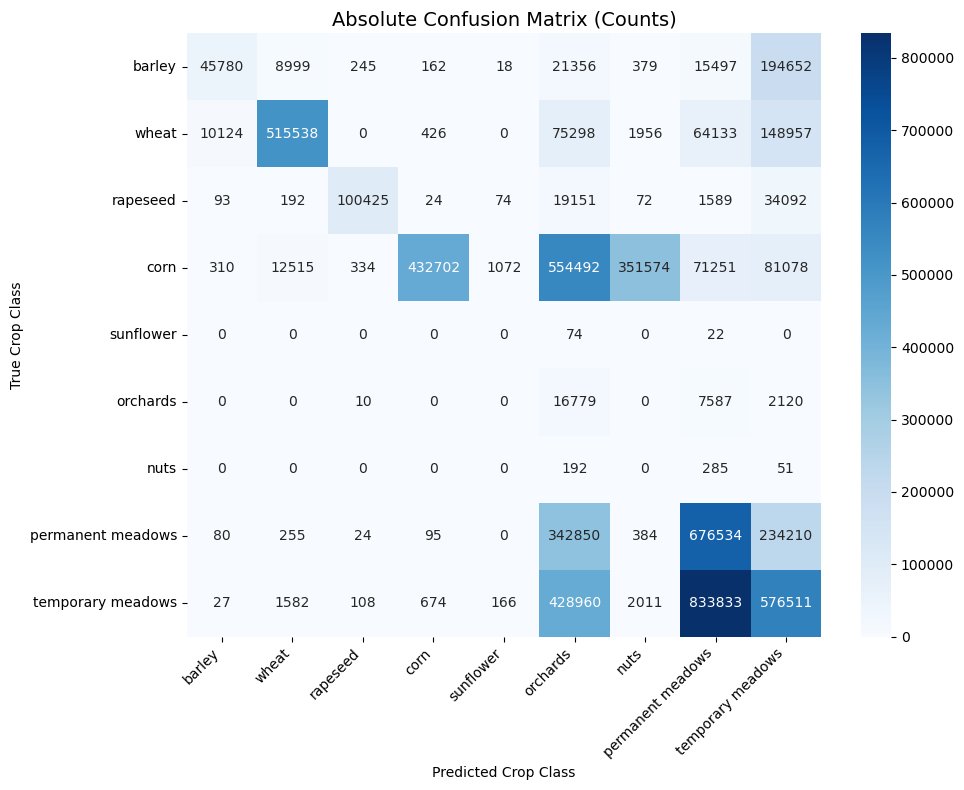

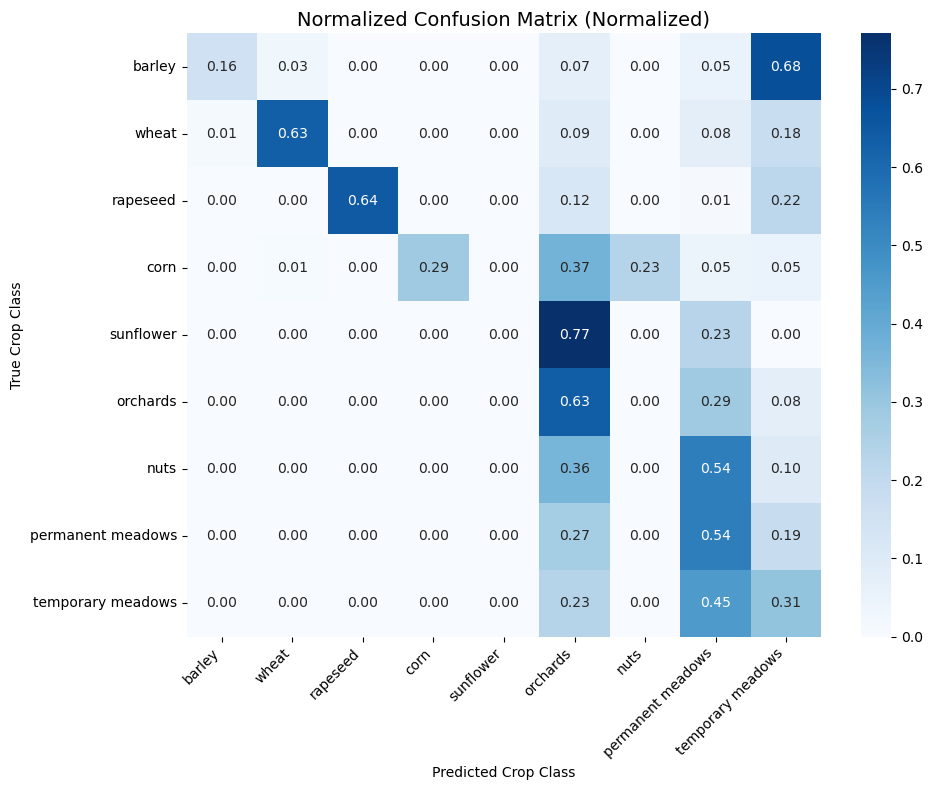


--- Detailed Confusion Analysis ---

**Low Performance Class: barley** (Recall: 15.9%)
 - Top misclassification is: temporary meadows (3.1%).

**High Performance Class: wheat** (Recall: 63.1%)
 - Top misclassification is: temporary meadows (1.2%).

**High Performance Class: rapeseed** (Recall: 64.5%)
 - Errors are low and/or widely dispersed.

**Moderate Class: corn** (Recall: 28.7%)
 - Errors are low and/or widely dispersed.

**Poor Class: sunflower** (Recall: 0.0%)
 - Errors are low and/or widely dispersed.

**High Performance Class: orchards** (Recall: 63.3%)
 - Errors are low and/or widely dispersed.

**Poor Class: nuts** (Recall: 0.0%)
 - Errors are low and/or widely dispersed.

**High Performance Class: permanent meadows** (Recall: 53.9%)
 - Errors are low and/or widely dispersed.

**Moderate Class: temporary meadows** (Recall: 31.3%)
 - Errors are low and/or widely dispersed.
--- Finished Confusion Matrix Analysis ---


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import os
import gc
import random
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model

GLOBAL_SEED = 42 
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

T_REGULARIZED = 48    
F_AUGMENTED = 12      
NUM_CLASSES = 9       
INITIAL_CHANNELS = 32 
U_NET_DEPTH = 4       
DROPOUT_RATE = 0.4    
L2_REG = 1e-4         

TARGET_LR = 4.6e-5
TARGET_WD = 4.0e-8

data_dir = "Data" 
WEIGHTS_LOAD_PATH = os.path.join(data_dir, "reproduced_model_weights_epoch50_MTVI2_unscaled.weights.h5") 

CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}

file_names = {
    'X_test_final': 'X_test_final_MTVI2_unscaled.npy', 
    'y_test_final': 'y_test_final_MTVI2_unscaled.npy' 
}

@tf.function
def macro_dice_loss(y_true, y_pred):
    """Computes the Macro-Dice Loss (1 - Macro-Dice Score)."""
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    
    return 1. - macro_dice_score

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x

def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)

def build_1d_aunet():
    """Builds the 1D Attention U-Net model."""
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output

            attended_features = TemporalAttentionGate(
                input_features=aligned_encoder,
                gating_signal=up_conv_output,
                name=f'{name}_attn'
            )

            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])

            x = conv_block_1d(x, current_filters, name=name)

    output_tensor = layers.Conv1D(
        NUM_CLASSES, 
        kernel_size=1, padding='same',
        activation='softmax', 
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

def compile_model(model, lr=TARGET_LR, weight_decay=TARGET_WD):
    """
    Compiles the model using the AdamW optimizer and Macro-Dice Loss.
    """
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )
    
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    # Wrap metrics that expect 2D input
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'), 
        FlattenTimeWrapper(macro_f1, name='macro_f1'),      
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
    ]

    model.compile(
        optimizer=optimizer,
        loss=macro_dice_loss, 
        metrics=wrapped_metrics
    )
    return model


def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""
    cm = confusion_matrix(y_true, y_pred, normalize='true' if normalize else None)
    labels = list(class_names.values())
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
        xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} ({ "Normalized" if normalize else "Counts"})', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() 

def analyze_confusion_matrix(cm_normalized: np.ndarray, class_names: Dict[int, str]):
    """Performs a detailed textual analysis of the normalized confusion matrix."""
    labels = list(class_names.values())
    print("\n--- Detailed Confusion Analysis ---")
    for i in range(NUM_CLASSES):
        true_class_name = labels[i]
        cm_row = cm_normalized[i, :]
        correct_prediction = cm_row[i] * 100
        
        misclassification_row = np.delete(cm_row, i)
        top_k_indices = np.argsort(misclassification_row)[::-1]
 
        original_column_indices = [idx if idx < i else idx + 1 for idx in top_k_indices]
        
        top_errors = [(labels[j], misclassification_row[k] * 100) 
                      for k, j in enumerate(original_column_indices) if k < 3 and misclassification_row[k] > 0.01]
        
        status = ""
        if correct_prediction > 50: status = "High Performance Class"
        elif correct_prediction > 25: status = "Moderate Class"
        elif correct_prediction < 10: status = "Poor Class"
        else: status = "Low Performance Class"
        
        print(f"\n**{status}: {true_class_name}** (Recall: {correct_prediction:.1f}%)")
        if len(top_errors) > 0:
            top_errors_str = ", ".join([f"{name} ({rate:.1f}%)" for name, rate in top_errors])
            print(f" - Top misclassification is: {top_errors_str}.")
        else:
            print(" - Errors are low and/or widely dispersed.")
    print("--- Finished Confusion Matrix Analysis ---")


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline 
    metrics on the Test Set.
    """
    y_pred_proba = model.predict(X_test)
    T = X_test.shape[1]
    y_true_tiled = np.tile(np.expand_dims(y_test_ohe, axis=1), (1, T, 1))
    
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)
    
    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0)
    
    macro_f1 = np.mean(f1_pc)
    avg_accuracy = np.mean(recall_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0)
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES), 'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support, 'Precision': precision_pc.round(4), 'Recall': recall_pc.round(4), 'F1-Score': f1_pc.round(4)})
    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))
    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")
    
    return macro_f1, y_true_indices, y_pred_indices

if __name__ == '__main__':
    
    print("Starting Final Evaluation: Loading 50-epoch MTVI2 (unscaled) weights.")

    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True).astype(np.float32)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True).astype(np.float32)
        print(f"Test data loaded. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file. Please check path: {e}")
        exit()

    tf.keras.backend.clear_session()
    final_model = build_1d_aunet() 
    final_compiled_model = compile_model(final_model)

    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Path: {WEIGHTS_LOAD_PATH}")
        raise RuntimeError(f"Weight loading failed. Ensure model definition matches saved weights: {e}")

    print("\nMaking predictions and calculating metrics on the Test Set...")
    macro_f1, y_true_indices, y_pred_indices = evaluate_model_metrics(
        final_compiled_model, 
        X_test_final_reloaded, 
        y_test_ohe_reloaded, 
        CROP_MAP
    )
    
    print("\n" + "="*50)
    print("CONFUSION MATRIX VISUALIZATION AND ANALYSIS")
    print("="*50)
    
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=False, title='Absolute Confusion Matrix')
    
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix')
    
    cm_normalized = confusion_matrix(y_true_indices, y_pred_indices, normalize='true')
    analyze_confusion_matrix(cm_normalized, CROP_MAP)

    del X_test_final_reloaded, y_test_ohe_reloaded
    gc.collect()

# 5. Attention Weight Extraction

### 5a. Attention Weight Extraction Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model 

T_REGULARIZED = 48
F_AUGMENTED = 12 
MTVI2_INDEX = 10 

TARGET_ATTENTION_LAYER = 'dec2_attn_alpha'

# Attention extraction function
def create_attention_extraction_model(compiled_model: tf.keras.Model, attention_layer_name: str) -> Model:
    """
    Creates a new Keras model that outputs the attention scores from the 
    specified layer, alongside the final prediction.
    """
    try:
        # Getting the layer that outputs the attention scores (alpha, 0 to 1)
        attention_output_tensor = compiled_model.get_layer(attention_layer_name).output
        
        # Creating a model with the same input, but two outputs: final softmax and attention
        attention_model = tf.keras.models.Model(
            inputs=compiled_model.input, 
            outputs=[compiled_model.output, attention_output_tensor],
            name='Attention_Extractor'
        )
        return attention_model
    except ValueError as e:
        print(f"Error: Layer name '{attention_layer_name}' not found. Check model architecture.")
        print(f"Underlying error: {e}")
        return None

# Plotting

def plot_attention_vs_vi(X_test: np.ndarray, attention_model: Model, field_index: int, vi_feature_index: int, vi_name: str):
    """
    Predicts attention and plots it against the specified Vegetation Index (VI) 
    over the time steps for a single field. 
    """
    T = X_test.shape[1]
    time_steps = np.arange(T)
    
    X_single = np.expand_dims(X_test[field_index], axis=0)

    # Extracting VI sequence
    vi_sequence = X_single[0, :, vi_feature_index]
    
    try:
        _, attention_scores = attention_model.predict(X_single, verbose=0)
    except Exception as e:
        print(f"Prediction failed for field {field_index}: {e}")
        return

    attention_scores = attention_scores.squeeze()

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot VI
    color = 'tab:blue'
    ax1.set_xlabel('Time Step Index (T)', fontsize=12)
    ax1.set_ylabel(vi_name + ' Value', color=color, fontsize=12)
    ax1.plot(time_steps, vi_sequence, color=color, linewidth=2, label=vi_name)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Plot Attention Scores 
    ax2 = ax1.twinx() 
    color = 'tab:red'
    ax2.set_ylabel(r'Temporal Attention Score ($\mathbf{\alpha}$)', color=color, fontsize=12, fontweight='bold') 
    ax2.plot(time_steps, attention_scores, color=color, linestyle='--', marker='o', markersize=4, label='Attention Score')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 1.05) 

    alpha_symbol_tex = r'$\mathbf{\alpha}$'
    fig.suptitle(f'Temporal Attention ({alpha_symbol_tex}) vs. {vi_name} for Test Field Index {field_index}', fontsize=16)
    
    fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.95))
    plt.show()

def run_attention_analysis(final_compiled_model: tf.keras.Model, X_test_data: np.ndarray):
    """Main function to run the analysis."""

    # Loading Attention Extractor Model
    attn_extractor_model = create_attention_extraction_model(final_compiled_model, TARGET_ATTENTION_LAYER)

    if attn_extractor_model:
        print(f"\nSuccessfully created Attention Extraction Model using layer: {TARGET_ATTENTION_LAYER}")
        print("Plotting Attention vs. MTVI2 for example fields...")
        
        fields_to_plot = [0, 100, 500] 
        
        for idx in fields_to_plot:
            plot_attention_vs_vi(
                X_test_data, 
                attn_extractor_model, 
                field_index=idx,
                vi_feature_index=MTVI2_INDEX,
                vi_name='MTVI2'
            )
    else:
        print("\nCould not create the Attention Extraction Model. Check the TARGET_ATTENTION_LAYER name.")

### 5b. Running Attention Weight Extraction

--- Starting Full Attention Analysis Script (Paired Diagnosis) ---
Test data loaded. X_test shape: (122708, 48, 12)


Successfully loaded model weights from: Data/reproduced_model_weights_epoch50_MTVI2_unscaled.weights.h5

--- Running Prediction to Find Paired Diagnostic Indices ---
  [FOUND] barley: Correct Index 159
  [FOUND] barley: Misclassified Index 12 (Predicted as permanent meadows)
  [FOUND] wheat: Correct Index 9
  [FOUND] wheat: Misclassified Index 2 (Predicted as temporary meadows)
  [FOUND] rapeseed: Correct Index 7
  [FOUND] rapeseed: Misclassified Index 93 (Predicted as temporary meadows)
  [FOUND] corn: Correct Index 25
  [FOUND] corn: Misclassified Index 1 (Predicted as orchards)
  [MISSING] sunflower: No Correct Index found.
  [FOUND] sunflower: Misclassified Index 14874 (Predicted as orchards)
  [FOUND] orchards: Correct Index 155
  [FOUND] orchards: Misclassified Index 427 (Predicted as temporary meadows)
  [MISSING] nuts: No Correct Index found.
  [FOUND] nuts: Misclassified Index 8051 (Predicted as permanent meadows)
  [FOUND] permanent meadows: Correct Index 0
  [FOUND] permanen

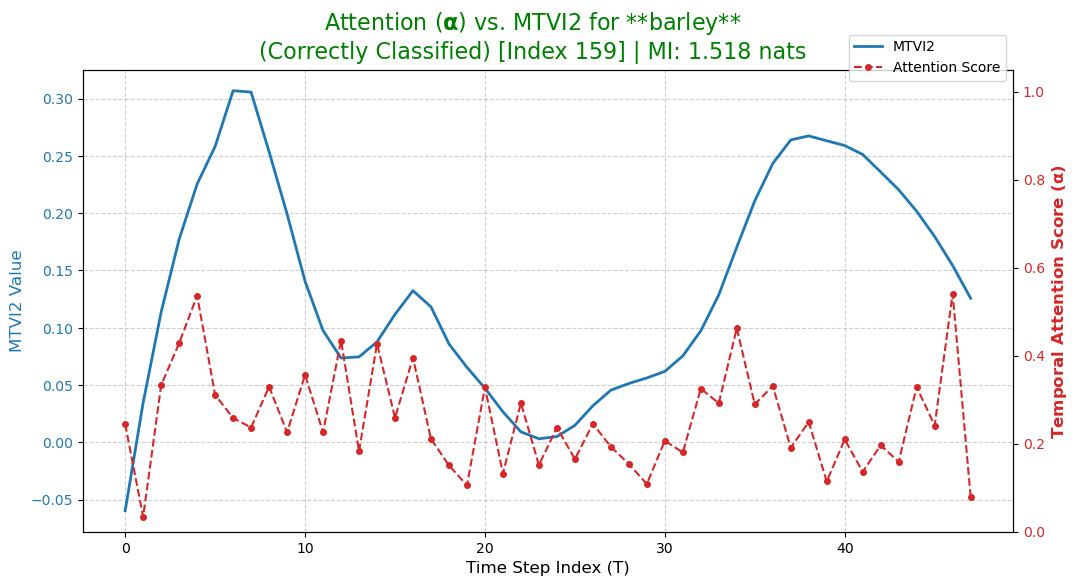


Plotting: barley (Misclassified) [Index: 12]


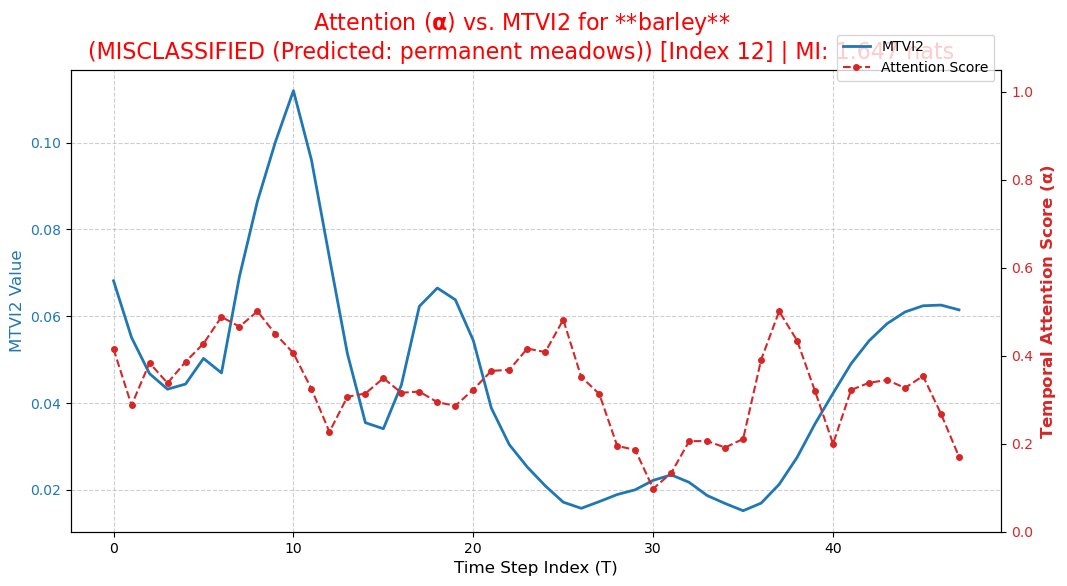


Plotting: wheat (Correct) [Index: 9]


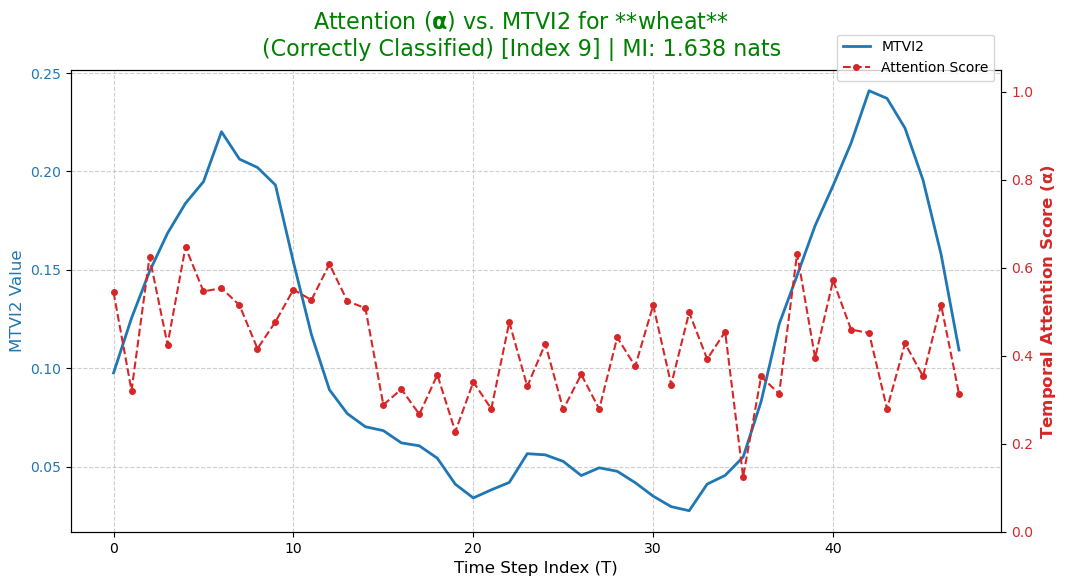


Plotting: wheat (Misclassified) [Index: 2]


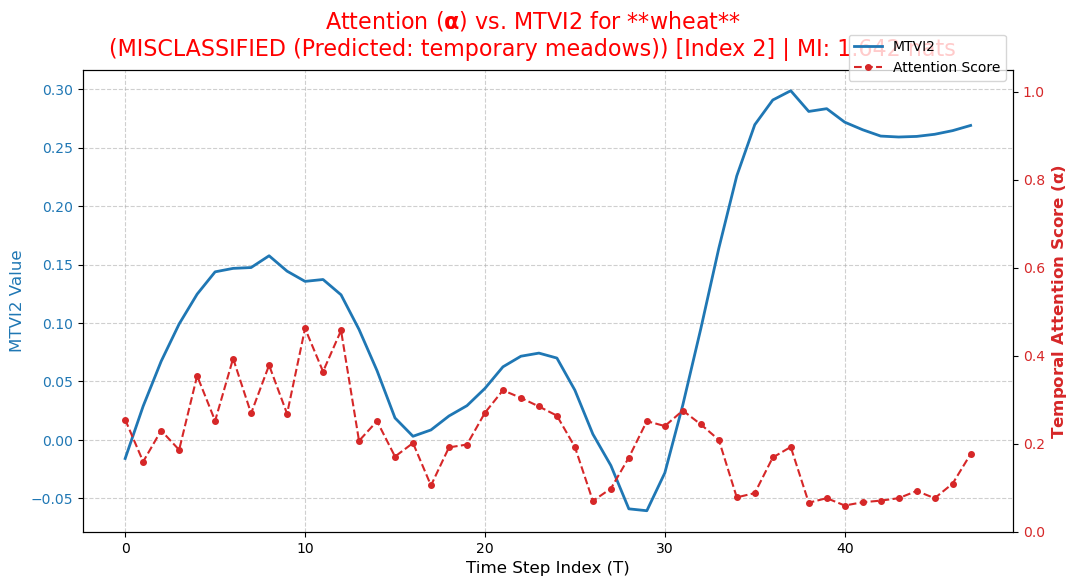


Plotting: rapeseed (Correct) [Index: 7]


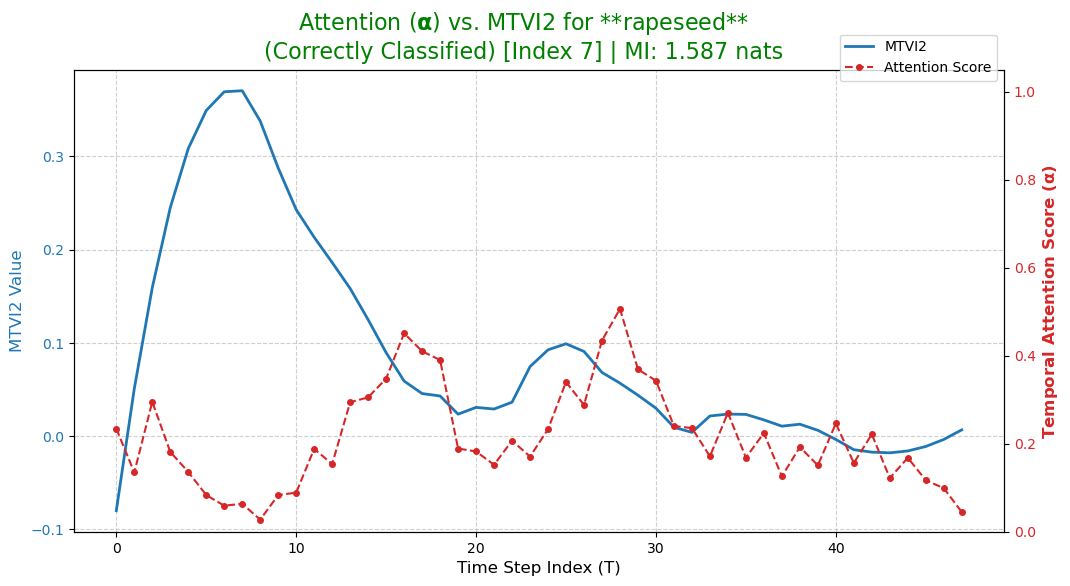


Plotting: rapeseed (Misclassified) [Index: 93]


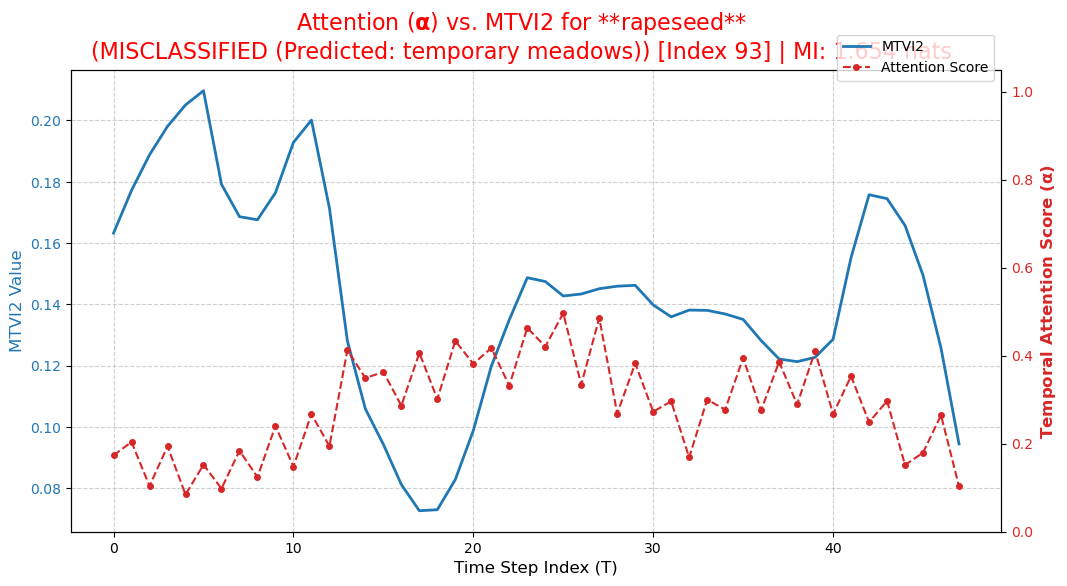


Plotting: corn (Correct) [Index: 25]


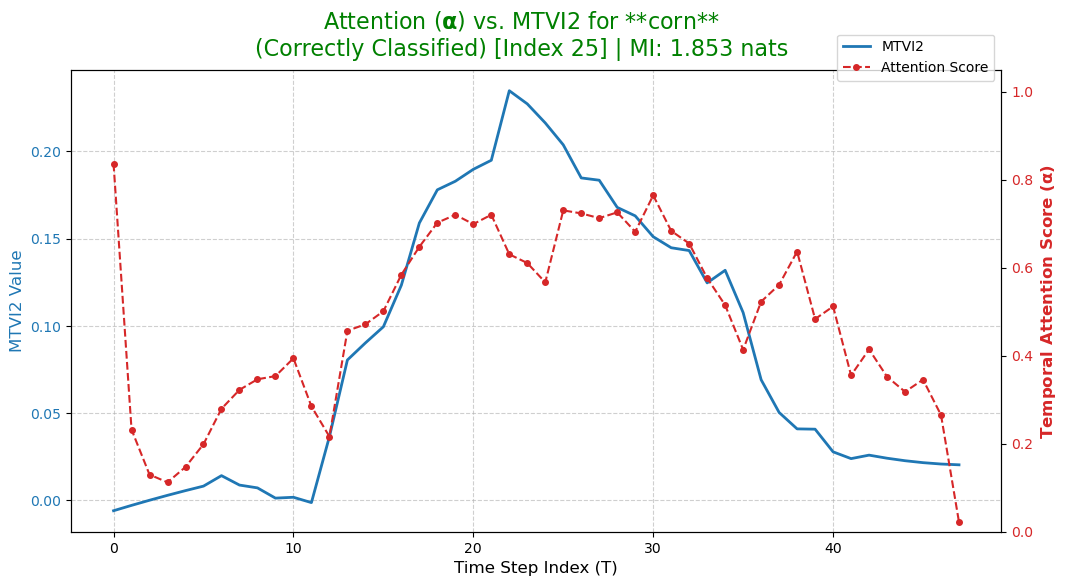


Plotting: corn (Misclassified) [Index: 1]


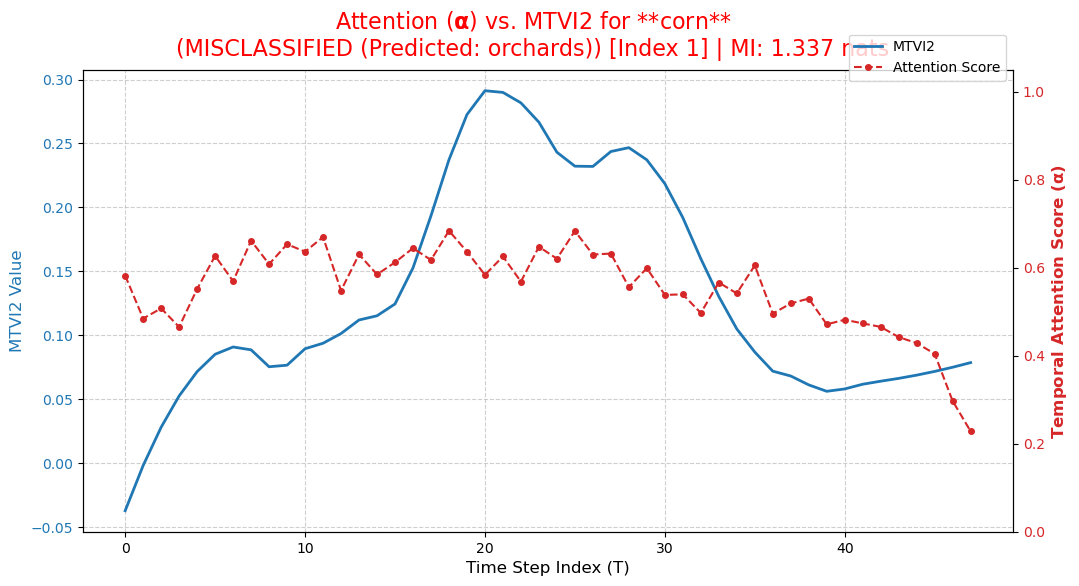


Plotting: sunflower (Misclassified) [Index: 14874]


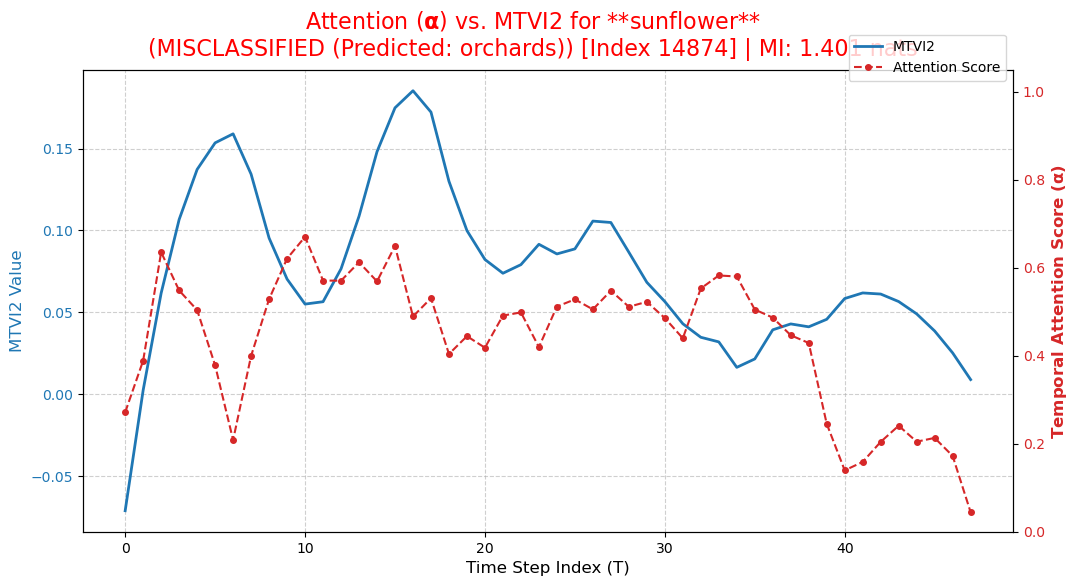


Plotting: orchards (Correct) [Index: 155]


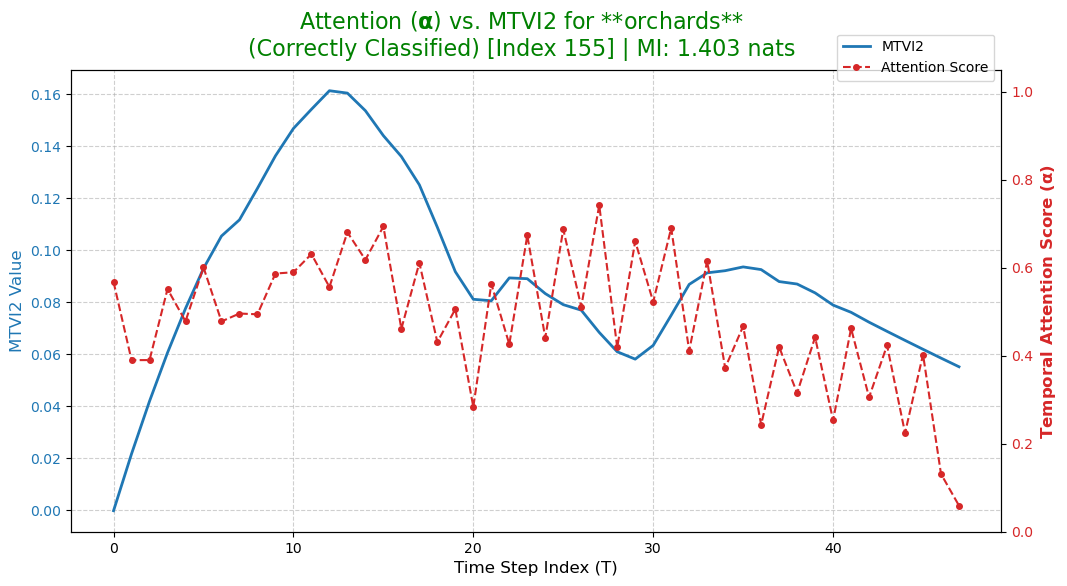


Plotting: orchards (Misclassified) [Index: 427]


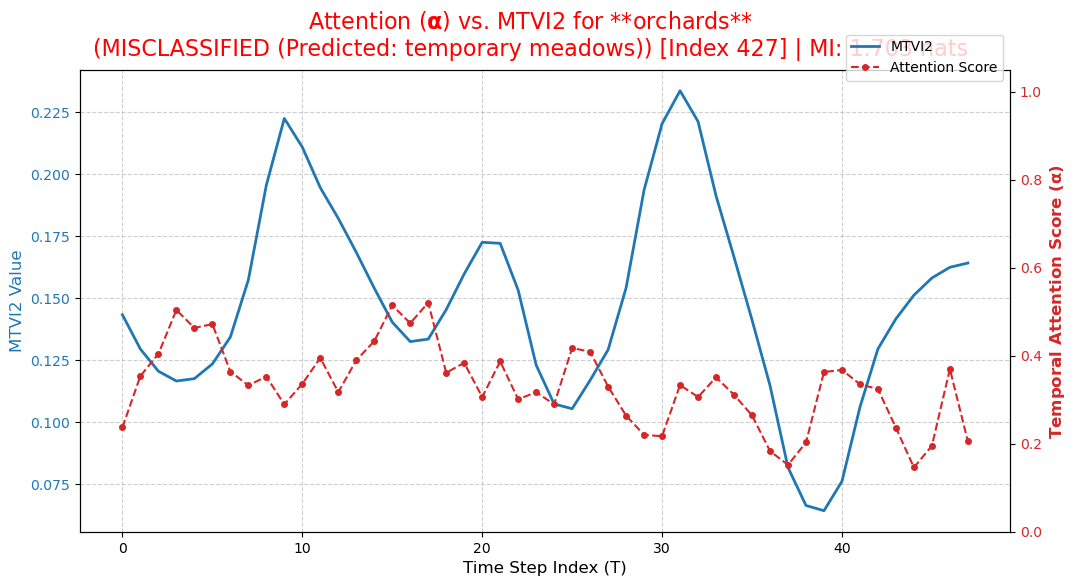


Plotting: nuts (Misclassified) [Index: 8051]


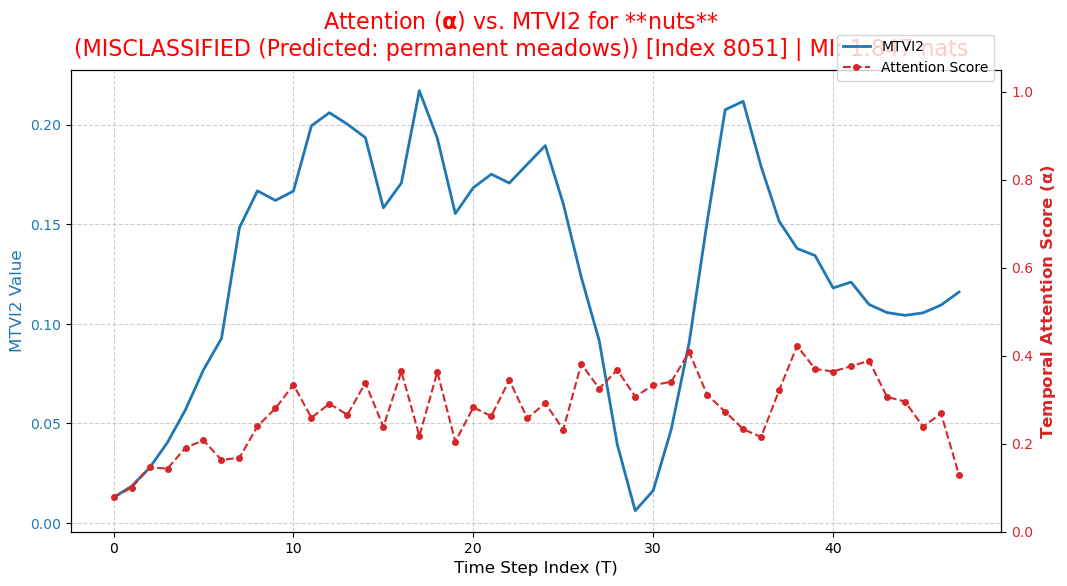


Plotting: permanent meadows (Correct) [Index: 0]


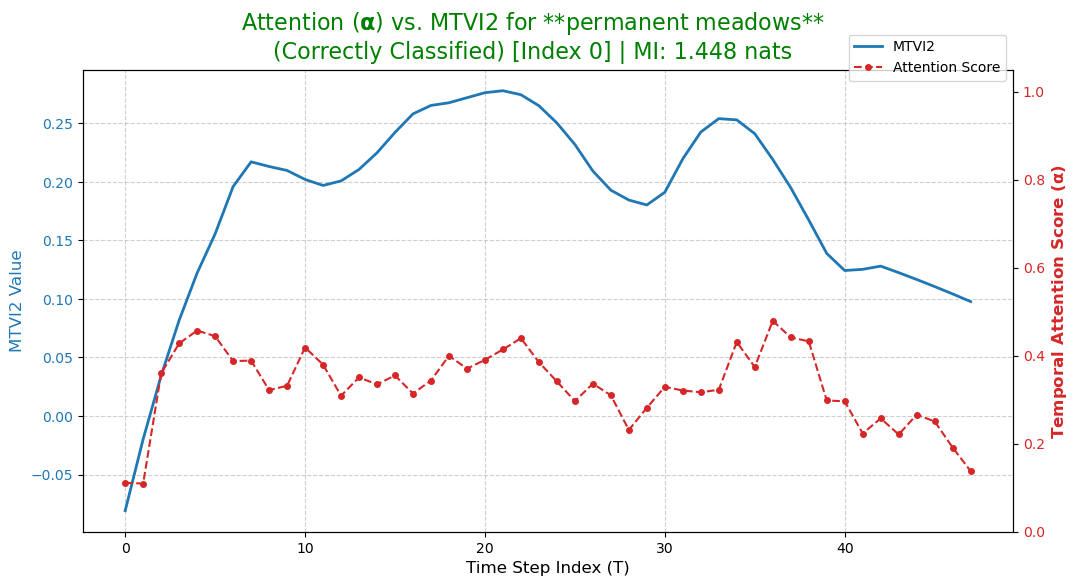


Plotting: permanent meadows (Misclassified) [Index: 3]


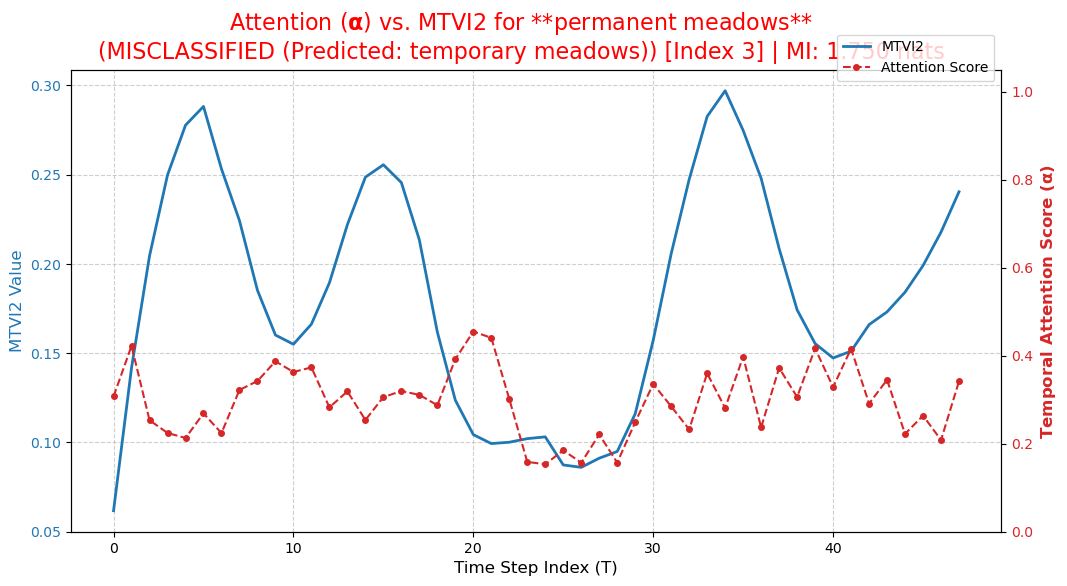


Plotting: temporary meadows (Correct) [Index: 8]


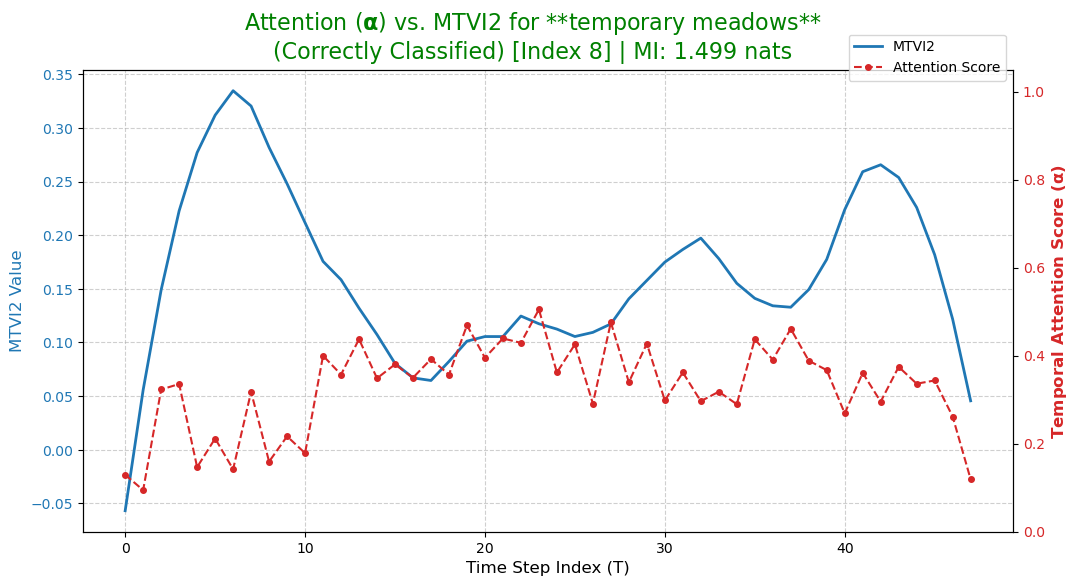


Plotting: temporary meadows (Misclassified) [Index: 5]


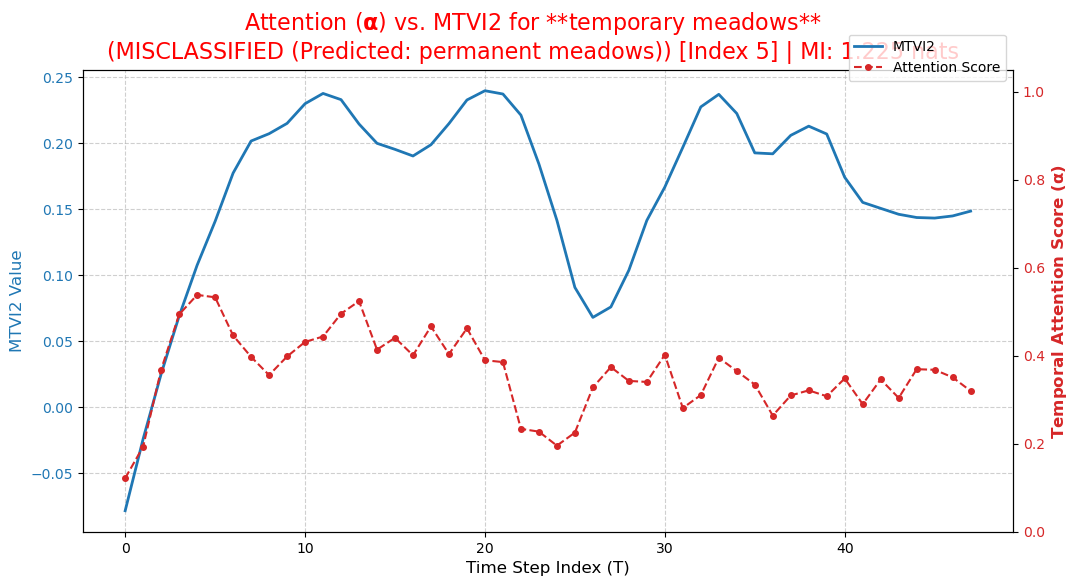

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Model 
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple
from sklearn.metrics import mutual_info_score # <-- NEW IMPORT
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import random 


GLOBAL_SEED = 42 
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

T_REGULARIZED = 48    
F_AUGMENTED = 12      
NUM_CLASSES = 9       
INITIAL_CHANNELS = 32 
U_NET_DEPTH = 4       
DROPOUT_RATE = 0.4    
L2_REG = 1e-4         
TARGET_LR = 4.6e-5
TARGET_WD = 4.0e-8

# Attention Plotting Constants
MTVI2_INDEX = 10 
TARGET_ATTENTION_LAYER = 'dec0_attn_alpha' 

data_dir = "Data" 
WEIGHTS_LOAD_PATH = os.path.join(data_dir, "reproduced_model_weights_epoch50_MTVI2_unscaled.weights.h5") 
file_names = {
    'X_test_final': 'X_test_final_MTVI2_unscaled.npy', 
    'y_test_final': 'y_test_final_MTVI2_unscaled.npy' 
}
CROP_MAP = { 
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
} 

@tf.function
def macro_dice_loss(y_true, y_pred):
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    return 1. - macro_dice_score

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        super().__init__(name=name, **kwargs)
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)
    def result(self): return self.metric_fn.result()
    def reset_state(self): self.metric_fn.reset_state()
    def get_config(self): 
        config = super().get_config()
        config.update({"metric_fn": tf.keras.metrics.serialize(self.metric_fn)})
        return config
    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)

def conv_block_1d(input_tensor, filters, name):
    x = layers.Conv1D(filters, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)
    x = layers.Conv1D(filters, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)
    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x

def TemporalAttentionGate(input_features, gating_signal, name):
    filters = input_features.shape[-1]
    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)
    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False, kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)
    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)
    attn = layers.Conv1D(1, kernel_size=1, padding='same', kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn) 
    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

def build_1d_aunet():
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs
    encoder_outputs = []
    current_filters = INITIAL_CHANNELS
    
    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    x = conv_block_1d(x, current_filters, name='bottleneck')

    for i in range(U_NET_DEPTH - 1, -1, -1): 
        name = f'dec{i}'
        if i < U_NET_DEPTH - 1: 
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            up_conv_output = layers.Conv1DTranspose(
                current_filters, kernel_size=2, strides=2, padding='same', name=f'{name}_upconv'
            )(x)
            
            attended_features = TemporalAttentionGate(
                input_features=encoder_output, gating_signal=up_conv_output, name=f'{name}_attn'
            ) 

            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, attended_features])
            x = conv_block_1d(x, current_filters, name=name)

    output_tensor = layers.Conv1D(NUM_CLASSES, kernel_size=1, padding='same', activation='softmax', name='output_softmax')(x)
    model = models.Model(inputs=inputs, outputs=output_tensor, name='1D_Attention_U_Net')
    return model

def compile_model(model, lr=TARGET_LR, weight_decay=TARGET_WD):
    optimizer = tf.keras.optimizers.AdamW(learning_rate=lr, weight_decay=weight_decay)
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'), 
        FlattenTimeWrapper(macro_f1, name='macro_f1'),      
    ]
    model.compile(optimizer=optimizer, loss=macro_dice_loss, metrics=wrapped_metrics)
    return model

def calculate_mutual_information(a: np.ndarray, b: np.ndarray, bins: int = 20) -> float:
    """
    Calculates Mutual Information (MI) between two continuous time series arrays.
    Requires discretizing the data using numpy.histogram.
    """
    # Data must be discrete for MI calculation
    c_a = np.histogram(a, bins=bins)[0]
    c_b = np.histogram(b, bins=bins)[0]
    
    return mutual_info_score(None, None, contingency=np.histogram2d(a, b, bins=bins)[0])


def find_diagnostic_indices_pair(model, X_test: np.ndarray, y_test_ohe: np.ndarray, crop_map: Dict[int, str]) -> Dict[int, Dict[str, int]]:
    """
    Finds one correctly classified index and one misclassified index for each class.
    
    Returns:
        A dictionary: {Class ID: {'Correct': index, 'Misclassified': index}}
    """
    print("\n--- Running Prediction to Find Paired Diagnostic Indices ---")
    
    y_pred_proba_3d = model.predict(X_test, verbose=0)
    y_pred_final_step = y_pred_proba_3d[:, -1, :] 
    y_pred_indices = np.argmax(y_pred_final_step, axis=1)
    y_true_indices = np.argmax(y_test_ohe, axis=1)

    diagnostic_indices: Dict[int, Dict[str, int]] = {}
    num_classes = len(crop_map)
    
    for class_id in range(num_classes):
        class_name = crop_map.get(class_id, f'Class {class_id}')
        
        diagnostic_indices[class_id] = {'Correct': -1, 'Misclassified': -1}
        
        correct_indices = np.where(
            (y_true_indices == class_id) & (y_pred_indices == class_id)
        )[0]
        
        if len(correct_indices) > 0:
            diagnostic_indices[class_id]['Correct'] = correct_indices[0]
            print(f"  [FOUND] {class_name}: Correct Index {correct_indices[0]}")
        else:
            print(f"  [MISSING] {class_name}: No Correct Index found.")

        misclassified_indices = np.where(
            (y_true_indices == class_id) & (y_pred_indices != class_id)
        )[0]
        
        if len(misclassified_indices) > 0:
            diagnostic_indices[class_id]['Misclassified'] = misclassified_indices[0]
            actual_pred_class_id = y_pred_indices[misclassified_indices[0]]
            actual_pred_class_name = crop_map.get(actual_pred_class_id, 'UNKNOWN')
            print(f"  [FOUND] {class_name}: Misclassified Index {misclassified_indices[0]} (Predicted as {actual_pred_class_name})")
        else:
             print(f"  [MISSING] {class_name}: No Misclassified Index found.")

    return diagnostic_indices


def create_attention_extraction_model(compiled_model: tf.keras.Model, attention_layer_name: str) -> Model:
    """Creates a simplified model to output the attention scores."""
    try:
        attention_output_tensor = compiled_model.get_layer(attention_layer_name).output
        attention_model = tf.keras.models.Model(
            inputs=compiled_model.input, 
            outputs=[compiled_model.output, attention_output_tensor],
            name='Attention_Extractor'
        )
        return attention_model
    except ValueError as e:
        print(f"Error: Layer name '{attention_layer_name}' not found. Underlying error: {e}")
        return None

def plot_attention_vs_vi(X_test: np.ndarray, attention_model: Model, field_index: int, vi_feature_index: int, vi_name: str, class_name: str, status: str, predicted_as: str = None):
    """Plots attention scores against the VI over time for one field."""
    T = X_test.shape[1]
    time_steps = np.arange(T)
    
    X_single = np.expand_dims(X_test[field_index], axis=0)
    vi_sequence = X_single[0, :, vi_feature_index]
    
    try:
    
        _, attention_scores = attention_model.predict(X_single, verbose=0)
    except Exception as e:
        print(f"Prediction failed for field {field_index}: {e}")
        return

    attention_scores = attention_scores.squeeze() 
    
    mi_score = calculate_mutual_information(vi_sequence, attention_scores)

    if status == 'Correct':
        status_text = "Correctly Classified"
        title_color = 'green'
    else: 
        status_text = f"MISCLASSIFIED (Predicted: {predicted_as})"
        title_color = 'red'

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Vegetation Index 
    color = 'tab:blue'
    ax1.set_xlabel('Time Step Index (T)', fontsize=12)
    ax1.set_ylabel(vi_name + ' Value', color=color, fontsize=12)
    ax1.plot(time_steps, vi_sequence, color=color, linewidth=2, label=vi_name)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Plot Attention Scores
    ax2 = ax1.twinx() 
    color = 'tab:red'
    ax2.set_ylabel(r'Temporal Attention Score ($\mathbf{\alpha}$)', color=color, fontsize=12, fontweight='bold') 
    ax2.plot(time_steps, attention_scores, color=color, linestyle='--', marker='o', markersize=4, label='Attention Score')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 1.05) 
#add MI to title
    alpha_symbol_tex = r'$\mathbf{\alpha}$'
    mi_text = f" | MI: {mi_score:.3f} nats"
    
    fig.suptitle(f'Attention ({alpha_symbol_tex}) vs. {vi_name} for **{class_name}**\n({status_text}) [Index {field_index}]{mi_text}', fontsize=16, color=title_color)
    fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.95))
    plt.show()

def run_attention_analysis_for_all_classes(final_compiled_model: tf.keras.Model, X_test_data: np.ndarray, y_test_ohe_data: np.ndarray, crop_map: Dict[int, str]):
    """
    Main function to run the analysis across all crop types, plotting the required 16 diagnostic plots.
    """
    
    attn_extractor_model = create_attention_extraction_model(final_compiled_model, TARGET_ATTENTION_LAYER)

    if attn_extractor_model is None:
        print("\nAnalysis cannot proceed without the Attention Extraction Model.")
        return

    diag_indices_dict = find_diagnostic_indices_pair(
        final_compiled_model, 
        X_test_data, 
        y_test_ohe_data, 
        crop_map
    )
    
    print("\n--- Generating Attention Plots for All 9 Crop Types ---")
    
    for class_id, indices in diag_indices_dict.items():
        class_name = crop_map.get(class_id, f'Class {class_id}')
        
        if indices['Correct'] != -1 and class_name not in ['sunflower', 'nuts']:
            print(f"\nPlotting: {class_name} (Correct) [Index: {indices['Correct']}]")
            plot_attention_vs_vi(
                X_test_data, attn_extractor_model, indices['Correct'], MTVI2_INDEX, 'MTVI2', 
                class_name, 'Correct'
            )
        elif indices['Correct'] != -1:
            print(f"\nSkipping Correct plot for {class_name} as requested (Misclassified plot will be generated).")


        if indices['Misclassified'] != -1:
            
            misclassified_index = indices['Misclassified']
            
            y_pred_proba_single = final_compiled_model.predict(X_test_data[misclassified_index:misclassified_index+1], verbose=0)
            predicted_class_id = np.argmax(y_pred_proba_single[0, -1, :])
            predicted_class_name = crop_map.get(predicted_class_id, 'UNKNOWN')
            
            print(f"\nPlotting: {class_name} (Misclassified) [Index: {misclassified_index}]")
            plot_attention_vs_vi(
                X_test_data, attn_extractor_model, misclassified_index, MTVI2_INDEX, 'MTVI2', 
                class_name, 'Misclassified', predicted_as=predicted_class_name
            )
        
        elif indices['Correct'] == -1:
            print(f"\nWARNING: Could not plot a representative sample for {class_name} (No Correct or Misclassified samples found in test set).")


if __name__ == '__main__':
    print("--- Starting Full Attention Analysis Script (Paired Diagnosis) ---")
    
    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True).astype(np.float32)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True).astype(np.float32)
        print(f"Test data loaded. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file. Ensure files are in the '{data_dir}' folder. {e}")
        exit()

    tf.keras.backend.clear_session()
    final_model = build_1d_aunet() 
    final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH)
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Check path and file integrity. {e}")
        raise RuntimeError("Weight loading failed.")

    run_attention_analysis_for_all_classes(final_compiled_model, X_test_final_reloaded, y_test_ohe_reloaded, CROP_MAP)
    
    del X_test_final_reloaded, y_test_ohe_reloaded
    gc.collect()

# 6. Comparing Attention U-Net to U-Net

### 6a. U-Net Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

T_REGULARIZED = 48    
F_AUGMENTED = 12      
NUM_CLASSES = 9       
INITIAL_CHANNELS = 32 
U_NET_DEPTH = 4      
DROPOUT_RATE = 0.4    
L2_REG = 1e-4         
INIT_LR = 4.6e-5      
ADAMW_WEIGHT_DECAY = 4.0e-8 


@tf.function
def macro_dice_loss(y_true, y_pred):
    """
    Computes the Macro-Dice Loss (1 - Macro-Dice Score).
    This treats all classes equally and is robust for imbalanced evaluation sets.
    """
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    
    return 1. - macro_dice_score


def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x


def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features


@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)


def build_1d_aunet():
    model_name = '1D_U_Net' 
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            # Skipping attention gate
            aligned_encoder = encoder_output 
            
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, aligned_encoder])

            x = conv_block_1d(x, current_filters, name=name)

    output_tensor = layers.Conv1D(
        NUM_CLASSES, 
        kernel_size=1, padding='same',
        activation='softmax', 
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name=model_name)
    return model


def compile_model(model, lr=INIT_LR, weight_decay=ADAMW_WEIGHT_DECAY):
    """
    Compiles the model using the AdamW optimizer and Macro-Dice Loss.
    """
    
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )
    
    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'), 
        FlattenTimeWrapper(macro_f1, name='macro_f1'),      
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
    ]

    model.compile(
        optimizer=optimizer,
        loss=macro_dice_loss, 
        metrics=wrapped_metrics
    )
    return model


def plot_confusion_matrix(y_true, y_pred, class_names):
    """Generates and plots a normalized confusion matrix."""
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    labels = list(class_names.values())
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm, 
        annot=True,        
        fmt=".2f",         
        cmap="Blues",      
        xticklabels=labels, 
        yticklabels=labels
    )
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title('Normalized Confusion Matrix (Test Set)', fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() 


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline 
    metrics on the Test Set, and prints the Confusion Matrix.
    """

    y_pred_proba = model.predict(X_test)

    T = X_test.shape[1]
    y_true_tiled = np.tile(y_test_ohe, (T, 1, 1)).transpose(1, 0, 2)

    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)

    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)

    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0
    )

    macro_f1 = np.mean(f1_pc)
    
    avg_accuracy = np.mean(recall_pc)
    
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0
    )
    
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES),
        'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support,
        'Precision': precision_pc.round(4),
        'Recall': recall_pc.round(4),
        'F1-Score': f1_pc.round(4),
    })

    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))

    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")
    
    print("\n--- Generating Confusion Matrix Plot ---")
    plot_confusion_matrix(y_true_indices, y_pred_indices, class_names)

    return macro_f1

### 6b. Training U-Net

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint 
import os
import gc
import random 
from typing import Dict, Tuple 


GLOBAL_SEED = 42 

os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

T_REGULARIZED = 48       
F_AUGMENTED = 12        
NUM_CLASSES = 9
FIXED_PARALLEL_CALLS = 4

CROP_MAP = { 
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
} 

def tf_tile_labels(X, y):
    """Tiles the label (N, C) to match the sequence shape (N, T, C)."""
    y_tiled = tf.tile(tf.expand_dims(y, axis=0), (T_REGULARIZED, 1))
    return X, y_tiled

def build_base_dataset(X_data: np.ndarray, y_data: np.ndarray, shuffle_buffer_size=10000):
    """Build a cached training base dataset once (with shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.shuffle(shuffle_buffer_size, reshuffle_each_iteration=True)
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_val_base_dataset(X_data: np.ndarray, y_data: np.ndarray):
    """Builds the cached validation dataset (without shuffling)."""
    dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
    dataset = dataset.map(tf_tile_labels, num_parallel_calls=FIXED_PARALLEL_CALLS)
    dataset = dataset.cache()
    return dataset

def build_tf_dataset_from_base(base_dataset, batch_size: int, is_validation=False):
    """Create a fast batched dataset from the cached base dataset."""
    dataset = base_dataset
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE) 
    return dataset

TARGET_BS = 64
TARGET_LR = 4.6e-5        
TARGET_WD = 4.0e-8         
TARGET_EPOCHS = 50         

data_dir = "Data" 

WEIGHTS_SAVE_PATH = os.path.join(data_dir, "reproduced_model_U_NET_epoch50_MTVI2_unscaled.weights.h5") 
LOCAL_SAVE_PATH = "reproduced_model_U_NET_epoch50_MTVI2_unscaled_local.weights.h5" 

print(f"Starting Targeted Training Rerun with GLOBAL_SEED={GLOBAL_SEED}.")
print(f"Target HParams: BS={TARGET_BS}, LR={TARGET_LR:.2e}, WD={TARGET_WD:.2e} for {TARGET_EPOCHS} Epochs.")

file_names = {
    'X_train_final': 'X_train_final_MTVI2_unscaled.npy', 'y_train_final': 'y_train_final_MTVI2_unscaled.npy',
    'X_val_final': 'X_val_final_MTVI2_unscaled.npy', 'y_val_final': 'y_val_final_MTVI2_unscaled.npy',
    'X_test_final': 'X_test_final_MTVI2_unscaled.npy', 'y_test_final': 'y_test_final_MTVI2_unscaled.npy' 
}

try:
    
    X_train_final = np.load(os.path.join(data_dir, file_names['X_train_final']), allow_pickle=True).astype(np.float32)
    y_train_final = np.load(os.path.join(data_dir, file_names['y_train_final']), allow_pickle=True).astype(np.float32)
    X_val_final = np.load(os.path.join(data_dir, file_names['X_val_final']), allow_pickle=True).astype(np.float32)
    y_val_final = np.load(os.path.join(data_dir, file_names['y_val_final']), allow_pickle=True).astype(np.float32)

    print(f"Data arrays loaded. X_train shape: {X_train_final.shape}")
except FileNotFoundError as e:
    print(f"FATAL ERROR: Could not find data file. Ensure files with the '_MTVI2_unscaled' suffix exist in the '{data_dir}' folder: {e}")
    exit()

base_train_dataset = build_base_dataset(X_train_final, y_train_final)
base_val_dataset = build_val_base_dataset(X_val_final, y_val_final) 

del X_train_final, y_train_final, X_val_final, y_val_final
gc.collect() 

tf.keras.backend.clear_session()
final_model = build_1d_aunet() 
final_compiled_model = compile_model(final_model, lr=TARGET_LR, weight_decay=TARGET_WD)

final_train_dataset = build_tf_dataset_from_base(base_train_dataset, TARGET_BS)
final_val_dataset = build_tf_dataset_from_base(base_val_dataset, TARGET_BS, is_validation=True)

final_callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-7), 
    ModelCheckpoint(
        filepath=os.path.join(data_dir, 'best_weights_U_NET_MTVI2_unscaled.weights.h5'), 
        monitor='val_macro_f1', 
        save_best_only=True, 
        mode='max',
        verbose=1
    )
]

print(f"\nTraining for {TARGET_EPOCHS} epochs...")
history = final_compiled_model.fit(
    final_train_dataset,
    validation_data=final_val_dataset, 
    epochs=TARGET_EPOCHS,
    callbacks=final_callbacks,
    verbose=1,
)

final_macro_f1 = history.history.get('val_macro_f1', [None])[-1]
if final_macro_f1 is not None:
    print(f"\nValidation Macro F1 after final epoch ({TARGET_EPOCHS}): {final_macro_f1:.4f}")
else:
    print("\nCould not find 'val_macro_f1' in history. Check metric configuration.")

final_compiled_model.save_weights(WEIGHTS_SAVE_PATH)
print(f"Model weights for the final epoch saved to: {WEIGHTS_SAVE_PATH}")

final_compiled_model.save_weights(LOCAL_SAVE_PATH)
print(f"Model weights for the final epoch saved locally as: {LOCAL_SAVE_PATH}")

Starting Targeted Training Rerun with GLOBAL_SEED=42.
Target HParams: BS=64, LR=4.60e-05, WD=4.00e-08 for 50 Epochs.
Data arrays loaded. X_train shape: (22260, 48, 12)

Training for 50 epochs...
Epoch 1/50
346/347 [============================>.] - ETA: 0s - loss: 1.1566 - overall_accuracy: 0.0000e+00 - macro_f1: 0.1224 - macro_precision: 0.1820 - macro_recall: 0.0293
Epoch 1: val_macro_f1 improved from -inf to 0.12538, saving model to Data/best_weights_U_NET_MTVI2_unscaled.weights.h5


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


347/347 [==============================] - 25s 28ms/step - loss: 1.1565 - overall_accuracy: 0.0000e+00 - macro_f1: 0.1226 - macro_precision: 0.1825 - macro_recall: 0.0294 - val_loss: 1.1436 - val_overall_accuracy: 0.0000e+00 - val_macro_f1: 0.1254 - val_macro_precision: 0.3948 - val_macro_recall: 0.0366 - lr: 4.6000e-05
Epoch 2/50
346/347 [============================>.] - ETA: 0s - loss: 1.0995 - overall_accuracy: 2.0907e-05 - macro_f1: 0.1781 - macro_precision: 0.2995 - macro_recall: 0.1101
Epoch 2: val_macro_f1 did not improve from 0.12538
347/347 [==============================] - 7s 21ms/step - loss: 1.0992 - overall_accuracy: 2.1159e-05 - macro_f1: 0.1783 - macro_precision: 0.3001 - macro_recall: 0.1104 - val_loss: 1.1244 - val_overall_accuracy: 0.0000e+00 - val_macro_f1: 0.1106 - val_macro_precision: 0.3848 - val_macro_recall: 0.2610 - lr: 4.6000e-05
Epoch 3/50
346/347 [============================>.] - ETA: 0s - loss: 1.0054 - overall_accuracy: 1.3067e-04 - macro_f1: 0.2704 - m

### 6c. Testing U-Net

Starting Final Evaluation: Loading 50-epoch MTVI2 (unscaled) weights.
Test data loaded. X_test shape: (122708, 48, 12)


Successfully loaded model weights from: Data/reproduced_model_U_NET_epoch50_MTVI2_unscaled.weights.h5

Making predictions and calculating metrics on the Test Set...
3835/3835 [==============================] - 15s 3ms/step

Per-Class Metrics (Required for Detailed Comparison)
 Class ID        Class Name  Support  Precision  Recall  F1-Score
        0            barley   287088     0.8169  0.4831    0.6072
        1             wheat   816432     0.9457  0.7247    0.8206
        2          rapeseed   155712     0.9848  0.7088    0.8243
        3              corn  1505328     0.9954  0.5144    0.6783
        4         sunflower       96     0.0000  0.0000    0.0000
        5          orchards    26496     0.0155  0.5274    0.0301
        6              nuts      528     0.0000  0.0000    0.0000
        7 permanent meadows  1254432     0.4320  0.5701    0.4915
        8 temporary meadows  1843872     0.5040  0.4447    0.4725

Overall Metrics
Macro F1-Score: 0.4361 (Class-Balanced Core Me

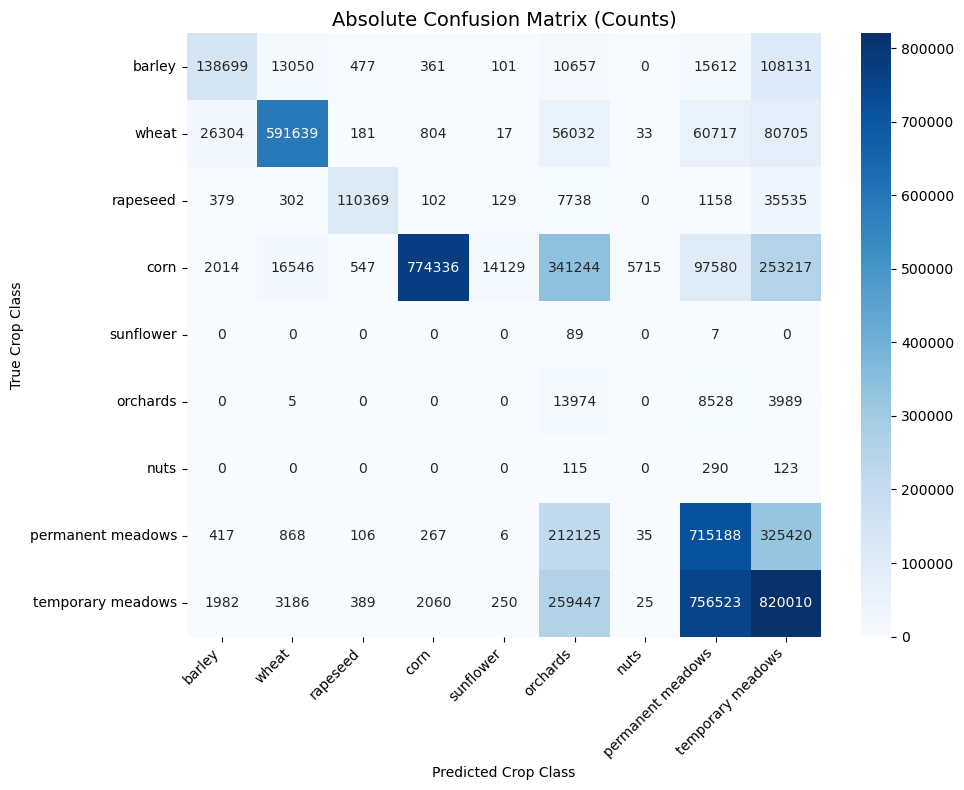

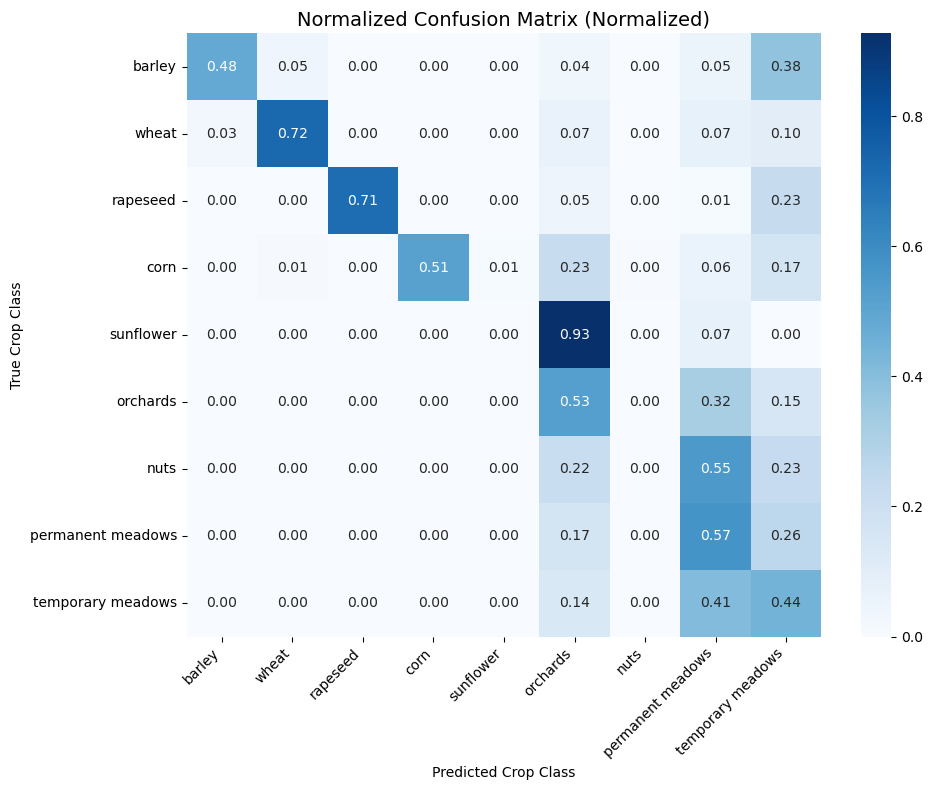


--- Detailed Confusion Analysis ---

**Moderate Class: barley** (Recall: 48.3%)
 - Top misclassification is: temporary meadows (4.5%).

**High Performance Class: wheat** (Recall: 72.5%)
 - Top misclassification is: temporary meadows (3.2%).

**High Performance Class: rapeseed** (Recall: 70.9%)
 - Errors are low and/or widely dispersed.

**High Performance Class: corn** (Recall: 51.4%)
 - Top misclassification is: temporary meadows (1.1%).

**Poor Class: sunflower** (Recall: 0.0%)
 - Errors are low and/or widely dispersed.

**High Performance Class: orchards** (Recall: 52.7%)
 - Errors are low and/or widely dispersed.

**Poor Class: nuts** (Recall: 0.0%)
 - Errors are low and/or widely dispersed.

**High Performance Class: permanent meadows** (Recall: 57.0%)
 - Errors are low and/or widely dispersed.

**Moderate Class: temporary meadows** (Recall: 44.5%)
 - Errors are low and/or widely dispersed.
--- Finished Confusion Matrix Analysis ---


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import os
import gc
import random
import pandas as pd
from typing import Dict, Tuple
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model 

GLOBAL_SEED = 42 
os.environ['PYTHONHASHSEED'] = str(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)

T_REGULARIZED = 48     
F_AUGMENTED = 12       
NUM_CLASSES = 9        
INITIAL_CHANNELS = 32 
U_NET_DEPTH = 4        
DROPOUT_RATE = 0.4     
L2_REG = 1e-4          

TARGET_LR = 4.6e-5
TARGET_WD = 4.0e-8

data_dir = "Data" 
WEIGHTS_LOAD_PATH = os.path.join(data_dir, "reproduced_model_U_NET_epoch50_MTVI2_unscaled.weights.h5") 

CROP_MAP = {
    0: 'barley', 1: 'wheat', 2: 'rapeseed', 3: 'corn', 4: 'sunflower',
    5: 'orchards', 6: 'nuts', 7: 'permanent meadows', 8: 'temporary meadows'
}

file_names = {
    'X_test_final': 'X_test_final_MTVI2_unscaled.npy', 
    'y_test_final': 'y_test_final_MTVI2_unscaled.npy' 
}

@tf.function
def macro_dice_loss(y_true, y_pred):
    """Computes the Macro-Dice Loss (1 - Macro-Dice Score)."""
    y_true_f = tf.cast(tf.reshape(y_true, [-1, NUM_CLASSES]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1, NUM_CLASSES]), tf.float32)
    
    numerator = 2. * tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denominator = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    
    dice_score_per_class = tf.where(tf.equal(denominator, 0), 1., numerator / denominator)
    
    macro_dice_score = tf.reduce_mean(dice_score_per_class)
    
    return 1. - macro_dice_score

def conv_block_1d(input_tensor, filters, name):
    """Standard 1D Convolutional Block with BN, ReLU, L2, and 40% Dropout."""
    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv1')(input_tensor)
    x = layers.BatchNormalization(name=f'{name}_bn1')(x)
    x = layers.Activation('relu', name=f'{name}_relu1')(x)

    x = layers.Conv1D(filters, kernel_size=3, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{name}_bn2')(x)
    x = layers.Activation('relu', name=f'{name}_relu2')(x)

    x = layers.Dropout(DROPOUT_RATE, name=f'{name}_dropout')(x)
    return x

def TemporalAttentionGate(input_features, gating_signal, name):
    """Temporal Attention Gate (TAG) implementation."""
    filters = input_features.shape[-1]

    g = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=True,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_g_conv')(gating_signal)
    g = layers.BatchNormalization(name=f'{name}_g_bn')(g)

    x = layers.Conv1D(filters, kernel_size=1, padding='same', use_bias=False,
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_x_conv')(input_features)
    x = layers.BatchNormalization(name=f'{name}_x_bn')(x)

    psi = layers.Add(name=f'{name}_add')([x, g])
    psi = layers.Activation('relu', name=f'{name}_relu')(psi)

    attn = layers.Conv1D(1, kernel_size=1, padding='same',
                      kernel_regularizer=regularizers.l2(L2_REG), name=f'{name}_attn_conv')(psi)
    alpha = layers.Activation('sigmoid', name=f'{name}_alpha')(attn)

    attended_features = layers.Multiply(name=f'{name}_multiply')([input_features, alpha])
    return attended_features

@tf.keras.utils.register_keras_serializable()
class FlattenTimeWrapper(tf.keras.metrics.Metric):
    def __init__(self, metric_fn, name=None, **kwargs):
        self.metric_fn = metric_fn
        if not name:
            name = metric_fn.name
        super().__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true_flat = tf.reshape(y_true, [-1, y_true.shape[-1]])
        y_pred_flat = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
        self.metric_fn.update_state(y_true_flat, y_pred_flat)

    def result(self):
        return self.metric_fn.result()

    def reset_state(self):
        self.metric_fn.reset_state()

    def get_config(self):
        config = super().get_config()
        config.update({
            "metric_fn": tf.keras.metrics.serialize(self.metric_fn)
        })
        return config

    @classmethod
    def from_config(cls, config):
        metric_fn_config = config.pop("metric_fn")
        metric_fn = tf.keras.metrics.deserialize(metric_fn_config)
        return cls(metric_fn=metric_fn, **config)

def build_1d_aunet():
    model_name = '1D_U_Net' 
    inputs = layers.Input(shape=(T_REGULARIZED, F_AUGMENTED), name='input_sequence')
    x = inputs

    encoder_outputs = []
    current_filters = INITIAL_CHANNELS

    for i in range(U_NET_DEPTH):
        name = f'enc{i}'
        x = conv_block_1d(x, current_filters, name=name)
        encoder_outputs.append(x)
        if i < U_NET_DEPTH - 1:
            x = layers.MaxPool1D(pool_size=2, strides=2, name=f'{name}_pool')(x)
        current_filters *= 2

    bottleneck = conv_block_1d(x, current_filters, name='bottleneck')
    x = bottleneck

    for i in range(U_NET_DEPTH - 1, -1, -1):
        name = f'dec{i}'

        if i < U_NET_DEPTH - 1:
            current_filters //= 2
            encoder_output = encoder_outputs[i]

            up_conv_output = layers.Conv1DTranspose(
                current_filters,
                kernel_size=2, strides=2, padding='same',
                name=f'{name}_upconv'
            )(x)

            aligned_encoder = encoder_output 
            
            x = layers.Concatenate(axis=-1, name=f'{name}_concat')([up_conv_output, aligned_encoder])

            x = conv_block_1d(x, current_filters, name=name)

    output_tensor = layers.Conv1D(
        NUM_CLASSES, 
        kernel_size=1, padding='same',
        activation='softmax', 
        name='output_softmax'
    )(x)

    model = models.Model(inputs=inputs, outputs=output_tensor, name=model_name)
    return model

def compile_model(model, lr=TARGET_LR, weight_decay=TARGET_WD):
    """
    Compiles the model using the AdamW optimizer and Macro-Dice Loss.
    """
    
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr,
        weight_decay=weight_decay
    )

    macro_f1 = tf.keras.metrics.F1Score(average='macro', name='macro_f1')
    macro_precision = tf.keras.metrics.Precision(name='macro_precision')
    macro_recall = tf.keras.metrics.Recall(name='macro_recall')

    wrapped_metrics = [
        tf.keras.metrics.Accuracy(name='overall_accuracy'), 
        FlattenTimeWrapper(macro_f1, name='macro_f1'),      
        FlattenTimeWrapper(macro_precision, name='macro_precision'),
        FlattenTimeWrapper(macro_recall, name='macro_recall'),
    ]

    model.compile(
        optimizer=optimizer,
        loss=macro_dice_loss, 
        metrics=wrapped_metrics
    )
    return model

def plot_confusion_matrix_styled(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    """Generates and plots a confusion matrix (Normalized or Count)."""
    cm = confusion_matrix(y_true, y_pred, normalize='true' if normalize else None)
    labels = list(class_names.values())
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
        xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Crop Class')
    plt.ylabel('True Crop Class')
    plt.title(f'{title} ({ "Normalized" if normalize else "Counts"})', fontsize=14)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() 

def analyze_confusion_matrix(cm_normalized: np.ndarray, class_names: Dict[int, str]):
    """Performs a detailed textual analysis of the normalized confusion matrix."""
    labels = list(class_names.values())
    print("\n--- Detailed Confusion Analysis ---")
    for i in range(NUM_CLASSES):
        true_class_name = labels[i]
        cm_row = cm_normalized[i, :]
        correct_prediction = cm_row[i] * 100
        misclassification_row = np.delete(cm_row, i)
        top_k_indices = np.argsort(misclassification_row)[::-1]
        
        original_column_indices = [idx if idx < i else idx + 1 for idx in top_k_indices]
        
        top_errors = [(labels[j], misclassification_row[k] * 100) 
                      for k, j in enumerate(original_column_indices) if k < 3 and misclassification_row[k] > 0.01]
        
        status = ""
        if correct_prediction > 50: status = "High Performance Class"
        elif correct_prediction > 25: status = "Moderate Class"
        elif correct_prediction < 10: status = "Poor Class"
        else: status = "Low Performance Class"
        
        print(f"\n**{status}: {true_class_name}** (Recall: {correct_prediction:.1f}%)")
        if len(top_errors) > 0:
            top_errors_str = ", ".join([f"{name} ({rate:.1f}%)" for name, rate in top_errors])
            print(f" - Top misclassification is: {top_errors_str}.")
        else:
            print(" - Errors are low and/or widely dispersed.")
    print("--- Finished Confusion Matrix Analysis ---")


def evaluate_model_metrics(model, X_test, y_test_ohe, class_names: dict):
    """
    Calculates the Macro F1-score, Per-Class Metrics, and BreizhCrops baseline 
    metrics on the Test Set.
    """
    y_pred_proba = model.predict(X_test)
    T = X_test.shape[1]
    y_true_tiled = np.tile(np.expand_dims(y_test_ohe, axis=1), (1, T, 1))
    
    y_pred_flat = y_pred_proba.reshape(-1, NUM_CLASSES)
    y_true_flat = y_true_tiled.reshape(-1, NUM_CLASSES)
    
    y_pred_indices = np.argmax(y_pred_flat, axis=-1)
    y_true_indices = np.argmax(y_true_flat, axis=-1)
    
    precision_pc, recall_pc, f1_pc, support = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average=None, labels=range(NUM_CLASSES), zero_division=0)
    
    macro_f1 = np.mean(f1_pc)
    avg_accuracy = np.mean(recall_pc)
    oa = np.sum(y_pred_indices == y_true_indices) / len(y_true_indices)
    _, _, weighted_f1, _ = precision_recall_fscore_support(
        y_true_indices, y_pred_indices, average='weighted', labels=range(NUM_CLASSES), zero_division=0)
    kappa = cohen_kappa_score(y_true_indices, y_pred_indices)

    results_df = pd.DataFrame({
        'Class ID': range(NUM_CLASSES), 'Class Name': [class_names.get(i, f'Class {i}') for i in range(NUM_CLASSES)],
        'Support': support, 'Precision': precision_pc.round(4), 'Recall': recall_pc.round(4), 'F1-Score': f1_pc.round(4)})
    print("\nPer-Class Metrics (Required for Detailed Comparison)")
    print(results_df.to_string(index=False))
    print("\nOverall Metrics")
    print(f"Macro F1-Score: {macro_f1:.4f} (Class-Balanced Core Metric)")
    print("Breizh Crops Baseline Metrics (Imbalance-Sensitive):")
    print(f"Overall Accuracy (OA): {oa:.4f}")
    print(f"Average Accuracy (Macro Recall): {avg_accuracy:.4f}")
    print(f"Weighted F-score: {weighted_f1:.4f}")
    print(f"Kappa Statistic: {kappa:.4f}")
    
    return macro_f1, y_true_indices, y_pred_indices

if __name__ == '__main__':
    
    print("Starting Final Evaluation: Loading 50-epoch MTVI2 (unscaled) weights.")

    try:
        X_test_final_reloaded = np.load(os.path.join(data_dir, file_names['X_test_final']), allow_pickle=True).astype(np.float32)
        y_test_ohe_reloaded = np.load(os.path.join(data_dir, file_names['y_test_final']), allow_pickle=True).astype(np.float32)
        print(f"Test data loaded. X_test shape: {X_test_final_reloaded.shape}")
    except FileNotFoundError as e:
        print(f"FATAL ERROR: Could not find test data file. Please check path: {e}")
        exit()

    tf.keras.backend.clear_session()
    final_model = build_1d_aunet() 
    final_compiled_model = compile_model(final_model)

    try:
        final_compiled_model.load_weights(WEIGHTS_LOAD_PATH) 
        print(f"Successfully loaded model weights from: {WEIGHTS_LOAD_PATH}")
    except Exception as e:
        print(f"FATAL ERROR: Could not load weights. Path: {WEIGHTS_LOAD_PATH}")
        raise RuntimeError(f"Weight loading failed. Ensure model definition matches saved weights: {e}")

    print("\nMaking predictions and calculating metrics on the Test Set...")
    macro_f1, y_true_indices, y_pred_indices = evaluate_model_metrics(
        final_compiled_model, 
        X_test_final_reloaded, 
        y_test_ohe_reloaded, 
        CROP_MAP
    )

    print("CONFUSION MATRIX VISUALIZATION AND ANALYSIS")
     
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=False, title='Absolute Confusion Matrix')
    
    plot_confusion_matrix_styled(y_true_indices, y_pred_indices, CROP_MAP, normalize=True, title='Normalized Confusion Matrix')
    
    cm_normalized = confusion_matrix(y_true_indices, y_pred_indices, normalize='true')
    analyze_confusion_matrix(cm_normalized, CROP_MAP)

    del X_test_final_reloaded, y_test_ohe_reloaded
    gc.collect()